In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')


In [54]:
prev_df = pd.read_csv("C:/Users/admin/Downloads/dseb-63-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_previous_application.csv")
prev_df

SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0           2030495     Consumer loans     1730.430          17145.0   
1           1696966     Consumer loans    68258.655        1800000.0   
2           2154916     Consumer loans    12417.390         108400.5   
3           2802425         Cash loans    25188.615         607500.0   
4           1536272         Cash loans    21709.125         450000.0   
...             ...                ...          ...              ...   
1413696     1261221     Consumer loans     6030.675         133866.0   
1413697     1563733     Consumer loans    13726.080         137250.0   
1413698     2319569     Consumer loans     4716.495          46800.0   
1413699     2829648     Consumer loans    10301.940         101745.0   
1413700     1944034         Cash loans          NaN              0.0   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0           17145.0               0.0          17145.0   
1         1754721.0          180000.0        1800000.0   
2          119848.5               0.0         108400.5   
3          679671.0               NaN         607500.0   
4          512370.0               NaN         450000.0   
...             ...               ...              ...   
1413696    133866.0               0.0         133866.0   
1413697    123525.0           13725.0         137250.0   
1413698     46800.0               0.0          46800.0   
1413699    112491.0               0.0         101745.0   
1413700         0.0               NaN              NaN   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         SATURDAY                       18   
2                           SUNDAY                       14   
3                         THURSDAY                       11   
4                        WEDNESDAY                        9   
...                            ...                      ...   
1413696                   SATURDAY                       15   
1413697                   SATURDAY                       14   
1413698                     FRIDAY                        9   
1413699                     FRIDAY                       12   
1413700                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  ...  CNT_PAYMENT  NAME_YIELD_GROUP  \
0                                 Y  ...         12.0            middle   
1                                 Y  ...         36.0        low_normal   
2                                 Y  ...         12.0            middle   
3                                 Y  ...         36.0        low_action   
4                                 Y  ...         36.0        low_normal   
...                             ...  ...          ...               ...   
1413696                           Y  ...         24.0        low_action   
1413697                           Y  ...         10.0        low_normal   
1413698                           Y  ...         12.0            middle   
1413699                           Y  ...         12.0        low_action   
1413700                           Y  ...          NaN               XNA   

                    PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0              POS mobile with interest            365243.0          -42.0   
1            POS industry with interest                 NaN            NaN   
2            POS industry with interest            365243.0         -512.0   
3                      Cash X-Sell: low            365243.0         -134.0   
4                      Cash X-Sell: low            365243.0         -485.0   
...                                 ...                 ...            ...   
1413696  POS household without interest            365243.0         -801.0   
1413697     POS household with interest            365243.0         -464.0   
1413698      POS industry with interest            365243.0         -119.0   
1413699  

- NAME_CONTRACT_TYPE: loại khoản vay
- AMT_ANNUITY: trái phiếu đồng niên/niêm kim
- AMT_APPLICATION: số tiền người đó muốn vay
- AMT_CREDIT: số tiền thực tế đã vay được
- AMT_DOWN_PAYMENT: số tiền phải trả trước
- AMT_GOODS_PRICE: giá của sản phẩm mà khách hàng yêu cầu ở lần vay trước
- WEEKDAY_APPR_PROCESS_START: ngày khách hàng đăng kí
- HOUR_APPR_PROCESS_START: giờ khách hàng đăng kí
- FLAG_LAST_APPL_PER_CONTRACT: đánh dấu nếu đây là lần đăng kí cuối cùng của hợp đồng cho vay bởi đôi khi 1 hợp đồng cho vay sẽ có nhiều lần đăng kí
- NFLAG_LAST_APPL_IN_DAY: đánh dấu nếu đây là lần đăng kí cuối cùng trong ngày bởi khách có thể đăng kí nhiều lần trong 1 ngày
- NFLAG_MICRO_CASH: đánh dấu nếu đây là khoản vay tài chính vi mô (các dịch vụ ngân hàng dành cho những người có thu nhập thấp và không thể tiếp cận các dịch vụ tài chính khác, cung cấp những khoản vay nhỏ an toàn và hợp lí với lãi suất thấp.)
- RATE_DOWN_PAYMENT: tỉ lệ tiền đặt cọc đã được normalized
- RATE_INTEREST_PRIMARY: tỉ lệ lãi suất chính đã được normalized
- NAME_CASH_LOAN_PURPOSE: mục đích vay tiền mặt
- NAME_CONTRACT_STATUS: tình trạng của hợp đồng (Cancled là tự khách hàng hủy application trong quá trình approval, Unused offer cũng giống kiểu cancled nhưng ở giai đoạn khác trong process)
- DAYS_DECISION: liên quan đến lần đăng kí hiện tại, khi nào khách hàng đưa ra quyết định về lần vay trước
- NAME_PAYMENT_TYPE: Phương án trả tiền khoản vay trước đó
- CODE_REJECT_REASON: lý do chính bị từ chối cho vay
- NAME_TYPE_SUITE: người đi cùng với khách hàng khi đăng kí vay
- NAME_CLIENT_TYPE: cho biết khách hàng là người vay cũ hay lần đầu vay
- NAME_GOODS_CATEGORY: loại sản phẩm mà khách hàng muốn vay để mua
- NAME_PORTFOLIO: khách hàng muốn vay gì : tiền mặt, điểm mua hàng,...
- NAME_PRODUCT_TYPE: x-sell: người mua đã mua 1 sp nào đó ở home credit rồi và sp đó bây giờ được bán lại, walk-in: khách hàng tự đến physical store để đăng kí vay
- CHANNEL_TYPE: thông qua kênh nào mà có được khách hàng
- SELLERPLACE_AREA: khu vực bán hàng của người bán lần apply trước
- NAME_SELLER_INDUSTRY: ngành hàng của người bán
- CNT_PAYMENT: credit term của lần vay trước (thừi gian)
- NAME_YIELD_GROUP: nhóm các loại lãi suất từ nhỏ, trung bình, cao
- PRODUCT_COMBINATION: chi tiết sản phẩm kết hợp của lần vay trước
- DAYS_FIRST_DRAWING: mối liên quan giữa ngày đăng kí hiện tại cho đến ngày giải ngân của lần vay trước
- DAYS_FIRST_DUE: ngày đáo hạn đầu tiên là khi nào ( first installment)
- DAYS_LAST_DUE_1ST_VERSION: ngày đáo hạn cuối cùng theo kế hoạch là khi nào(last installment) - thông tin từ thời điểm đăng kí
- DAYS_LAST_DUE: ngày đến hạn cuối cùng là khi nào (lần trả góp cuối cùng)-thông tin gần đây nhất (ngày đến hạn cuối cùng có thể thay đổi, ví dụ: trong trường hợp trả nợ sớm hoặc gặp khó khăn trong việc thanh toán)
- DAYS_TERMINATION: Liên quan đến ngày nộp đơn của đơn hiện tại khi nào dự kiến ​​đơn đăng ký trước đó sẽ chấm dứt
- NFLAG_INSURED_ON_APPROVAL: đánh dấu khách hàng có yêu cầu bảo hiểm trong suốt lần đăng kí trước không

In [55]:
# Table's information
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

In [56]:
# Check duplicated rows
prev_df.duplicated().sum()

0

In [57]:
# Hàm check missing data
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count() * 100 ).sort_values(ascending = False)
    df = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    df = df.loc[df['Percent'] > 0]
    return df

null_values = missing_data(prev_df)
null_values

Total    Percent
RATE_INTEREST_PRIVILEGED   1408910  99.661102
RATE_INTEREST_PRIMARY      1408910  99.661102
RATE_DOWN_PAYMENT           749540  53.019698
AMT_DOWN_PAYMENT            749540  53.019698
NAME_TYPE_SUITE             694672  49.138538
DAYS_LAST_DUE               561106  39.690571
DAYS_FIRST_DRAWING          561106  39.690571
DAYS_FIRST_DUE              561106  39.690571
DAYS_LAST_DUE_1ST_VERSION   561106  39.690571
DAYS_TERMINATION            561106  39.690571
NFLAG_INSURED_ON_APPROVAL   561106  39.690571
AMT_GOODS_PRICE             319525  22.602021
AMT_ANNUITY                 307218  21.731469
CNT_PAYMENT                 307213  21.731116
PRODUCT_COMBINATION            313   0.022140
AMT_CREDIT                       1   0.000071

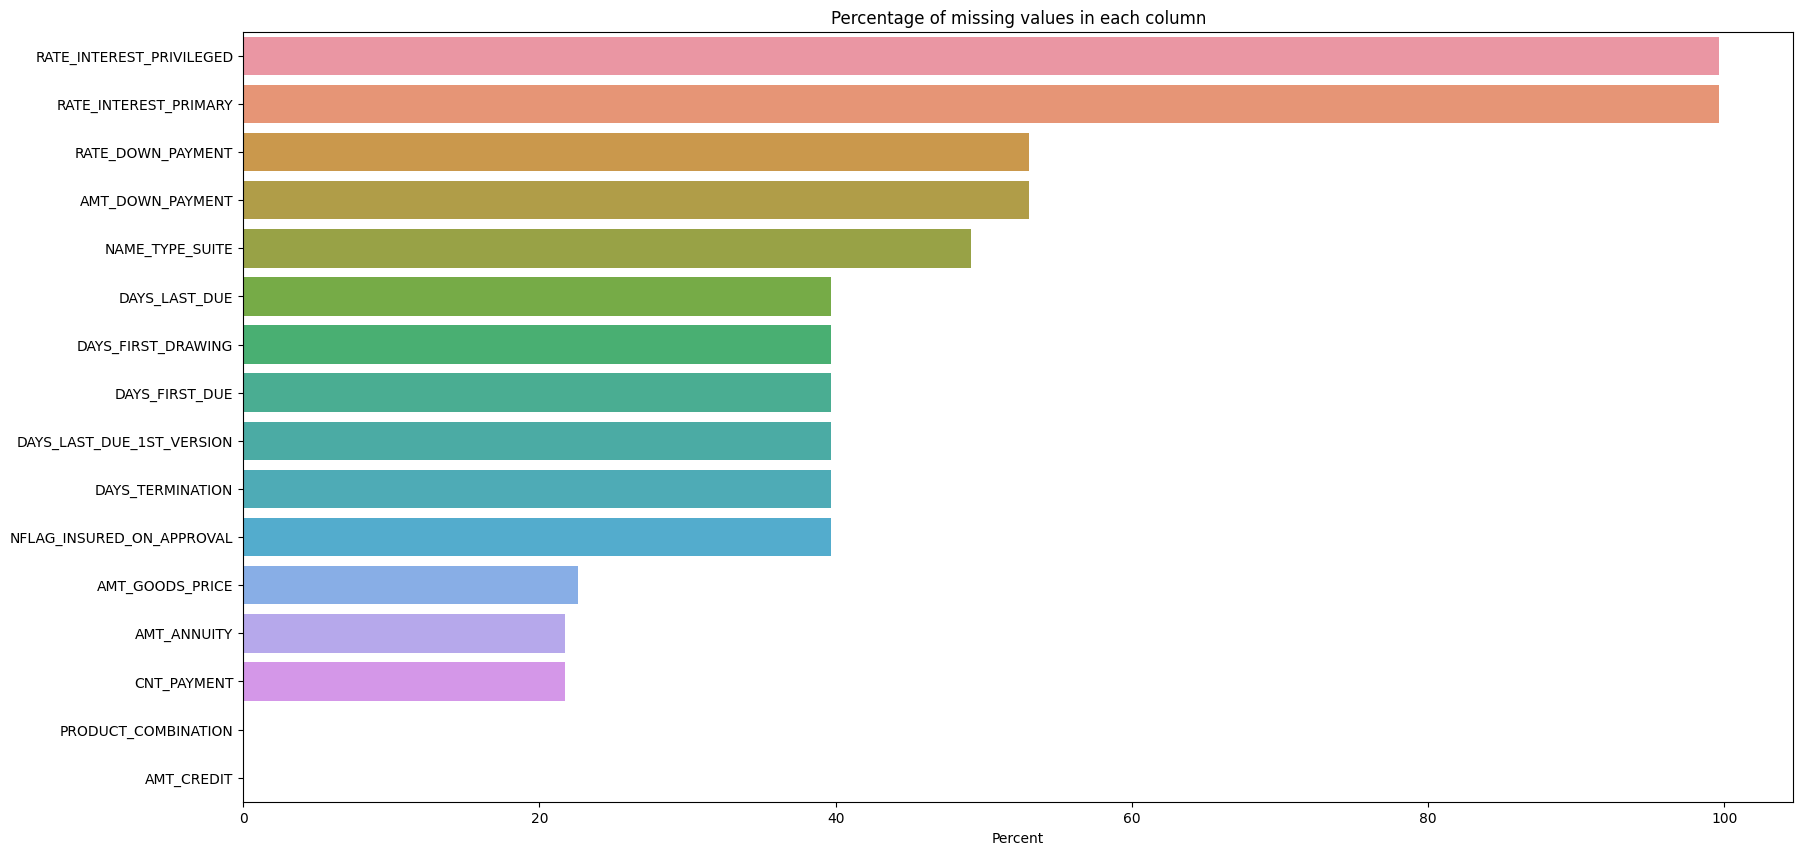

In [58]:
#Plot percentage of missing values
def plot_mising_val(df):
    plt.figure(figsize=(20,10))
    plt.title("Percentage of missing values in each column")
    sns.barplot(x=null_values['Percent'], y= df.index)

plot_mising_val(null_values)

- RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED là 2 cột thể hiện tỉ lệ lãi suất được normalize nhưng có đến 99% là null data -> DROP

In [59]:
prev_df.drop(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY'], axis = 1, inplace = True)

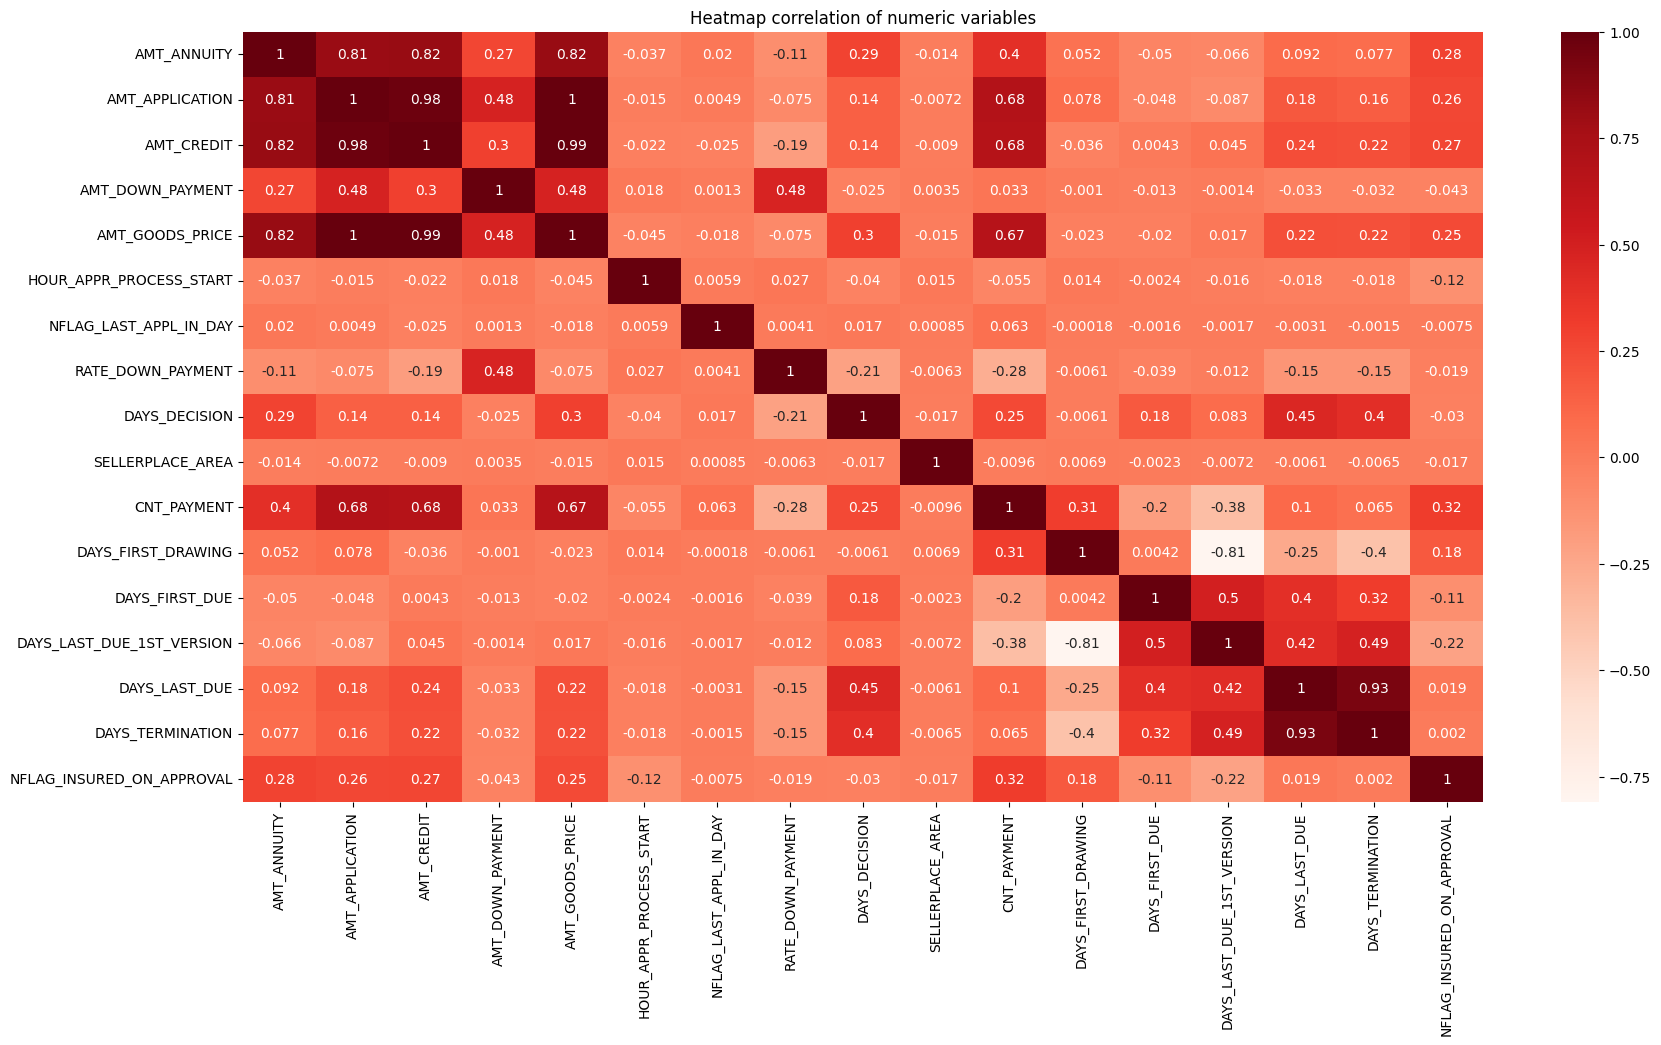

In [60]:
# vẽ heatmap correlation của các biến numeric trừ 2 biến ID
def plot_heatmap(df):
    plt.figure(figsize=(20,10))
    sns.heatmap(df[df.select_dtypes(include=['int64','float64']).columns].drop(['SK_ID_PREV', 'SK_ID_CURR'], axis = 1).corr(), annot = True, cmap=plt.cm.Reds)
    plt.title('Heatmap correlation of numeric variables')
    plt.show()
plot_heatmap(prev_df)

- "DAYS_LAST_DUE" AND "DAYS_TERMINATION" are highly correlated
- "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE" and "AMT_ANNUITY" are highly correlated
- "DAYS_TERMINATION", "DAYS_LAST_DUE_1ST_VERSION", "AMT_APPLICATION", "AMT_CREDIT" and "AMT_GOODS_PRICE" can be removed to prevent collinearity

- Do giá trị 365243 là giá trị infinite trong feature ngày nên ta sẽ thay thế bằng giá trị nan.

In [61]:
day = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
for i in day:
    prev_df[i].replace(365243, np.nan, inplace = True)

In [62]:
missing_data(prev_df)

Total    Percent
DAYS_FIRST_DRAWING         1360200  96.215536
DAYS_TERMINATION            755106  53.413416
RATE_DOWN_PAYMENT           749540  53.019698
AMT_DOWN_PAYMENT            749540  53.019698
DAYS_LAST_DUE               741898  52.479131
NAME_TYPE_SUITE             694672  49.138538
DAYS_LAST_DUE_1ST_VERSION   640205  45.285743
DAYS_FIRST_DUE              595068  42.092918
NFLAG_INSURED_ON_APPROVAL   561106  39.690571
AMT_GOODS_PRICE             319525  22.602021
AMT_ANNUITY                 307218  21.731469
CNT_PAYMENT                 307213  21.731116
PRODUCT_COMBINATION            313   0.022140
AMT_CREDIT                       1   0.000071

In [63]:
# Ham fill special categorical value
def fill_missing_special(df, nan_value):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].replace(nan_value, np.nan, inplace = True)
    return df
nan_value = ['XNA', 'XAP']
prev_df = fill_missing_special(prev_df, nan_value)

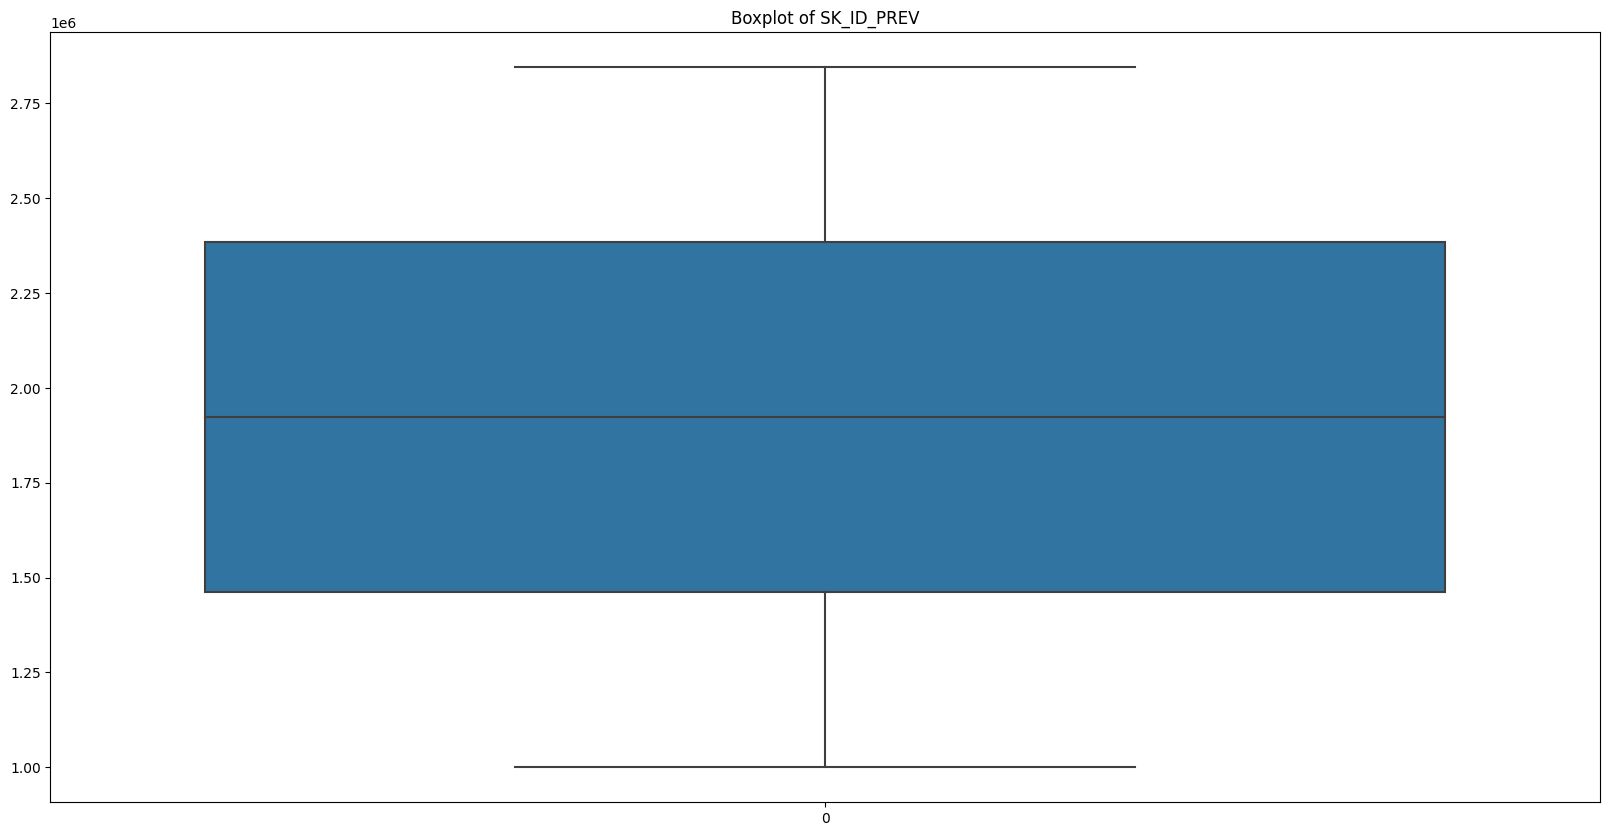

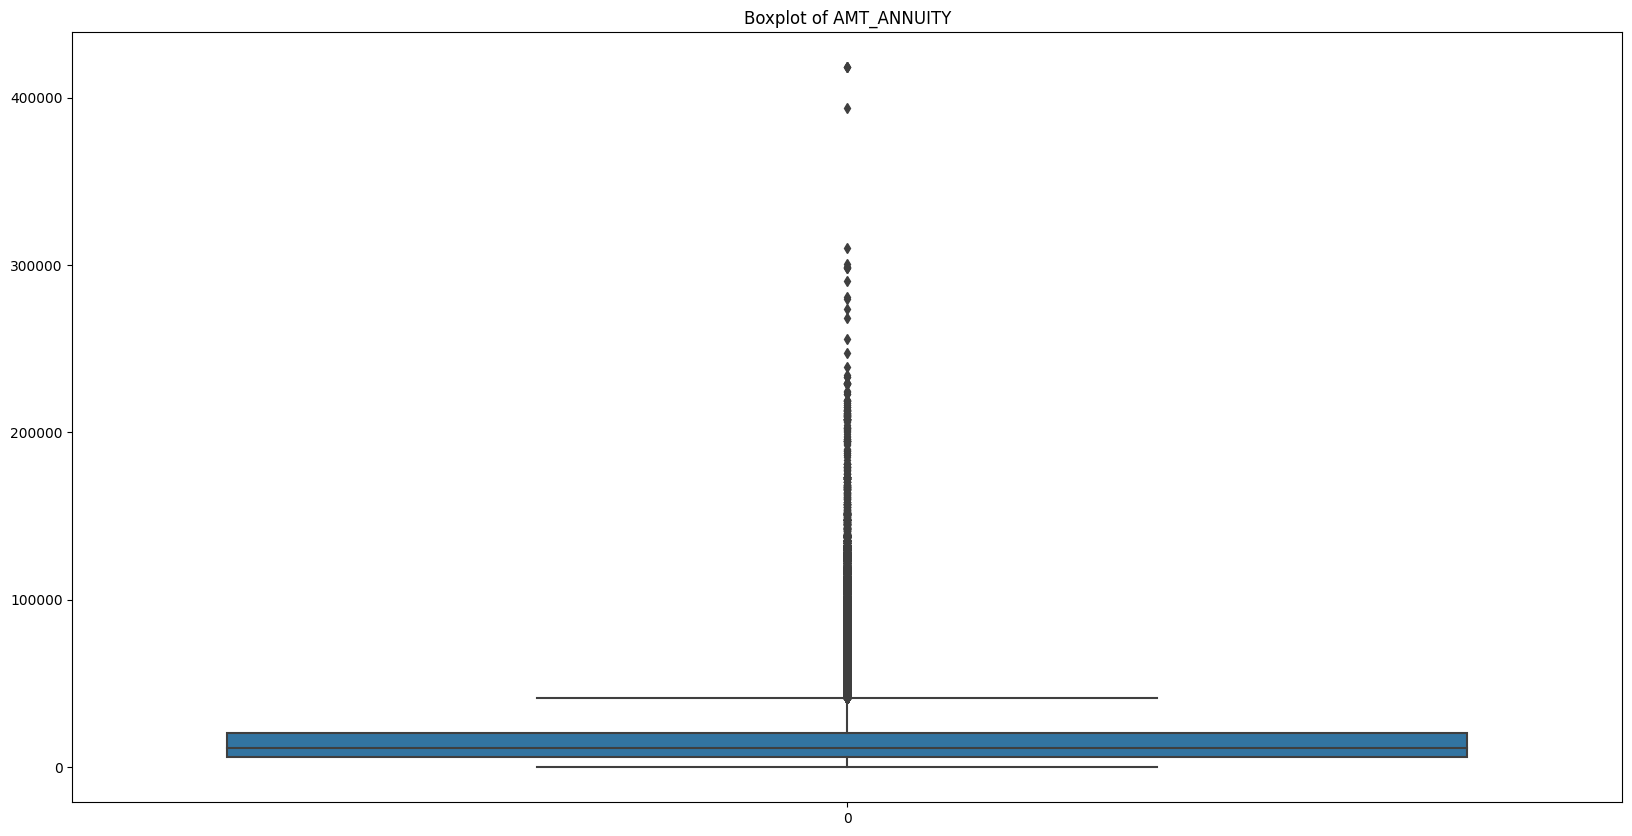

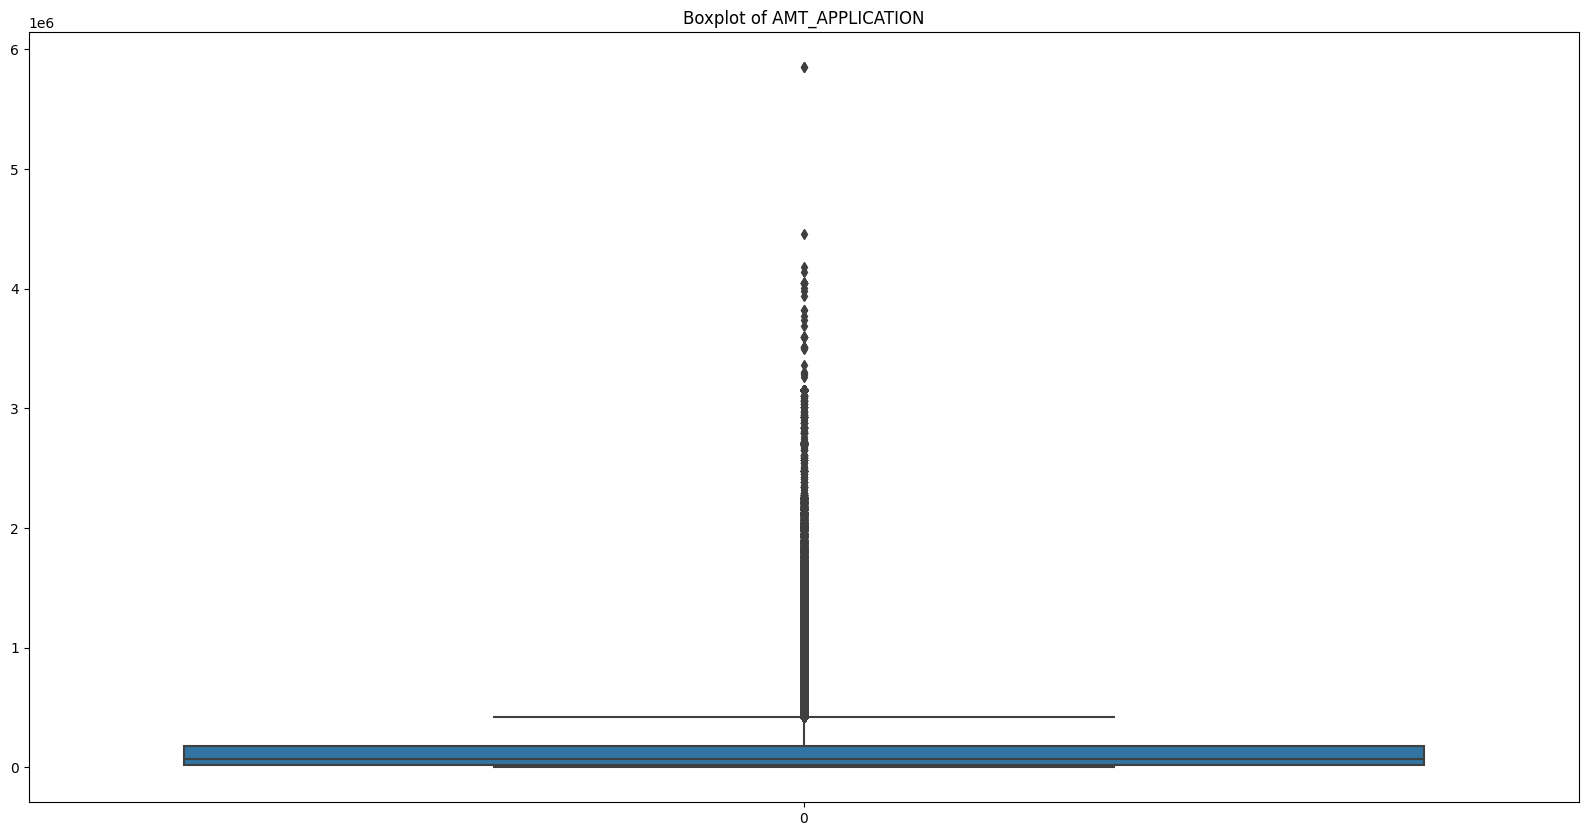

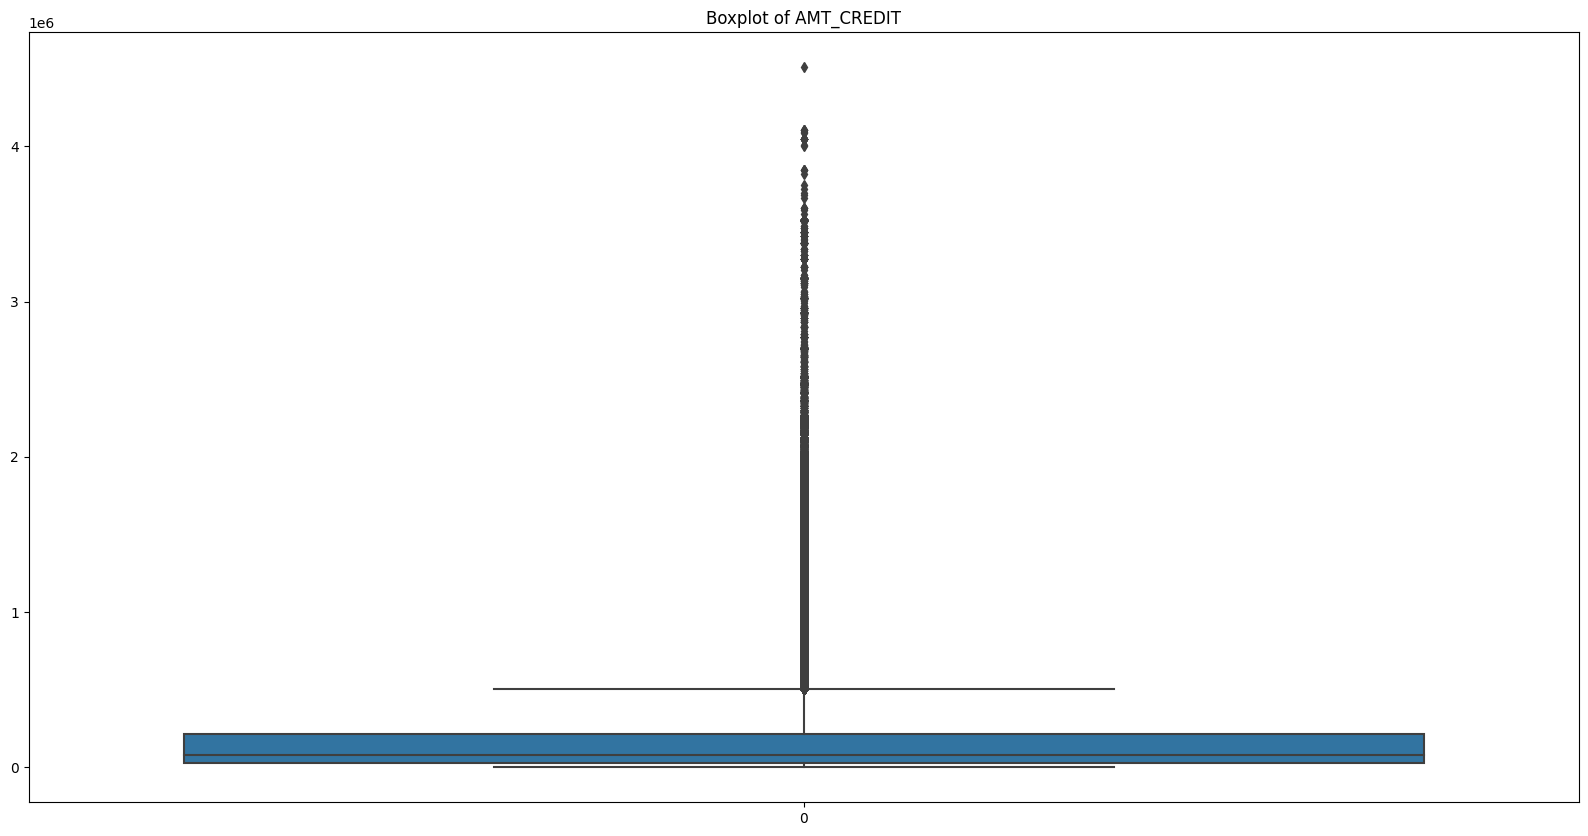

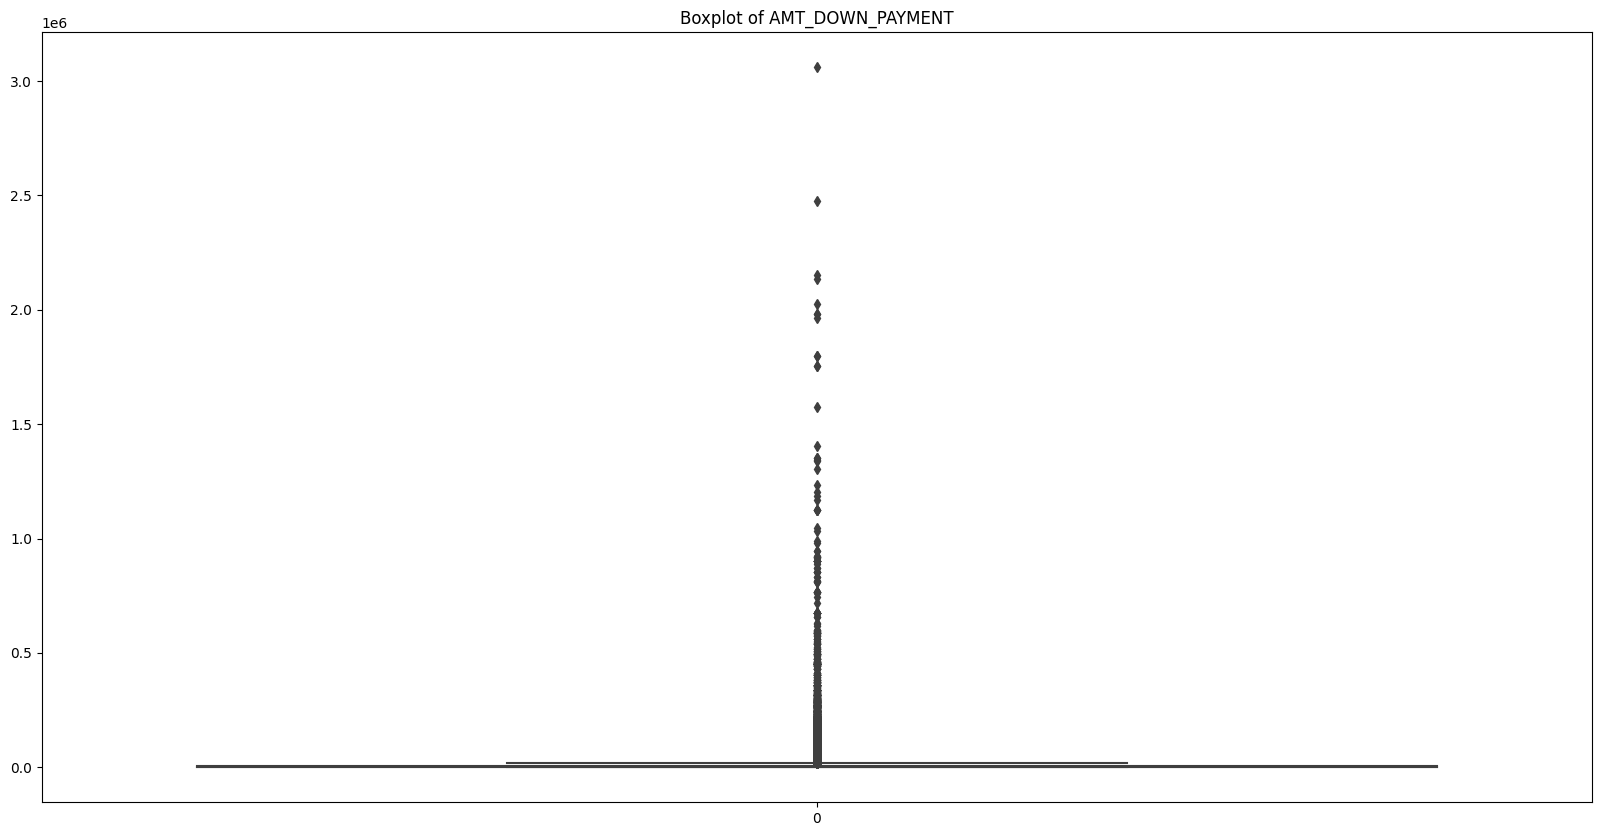

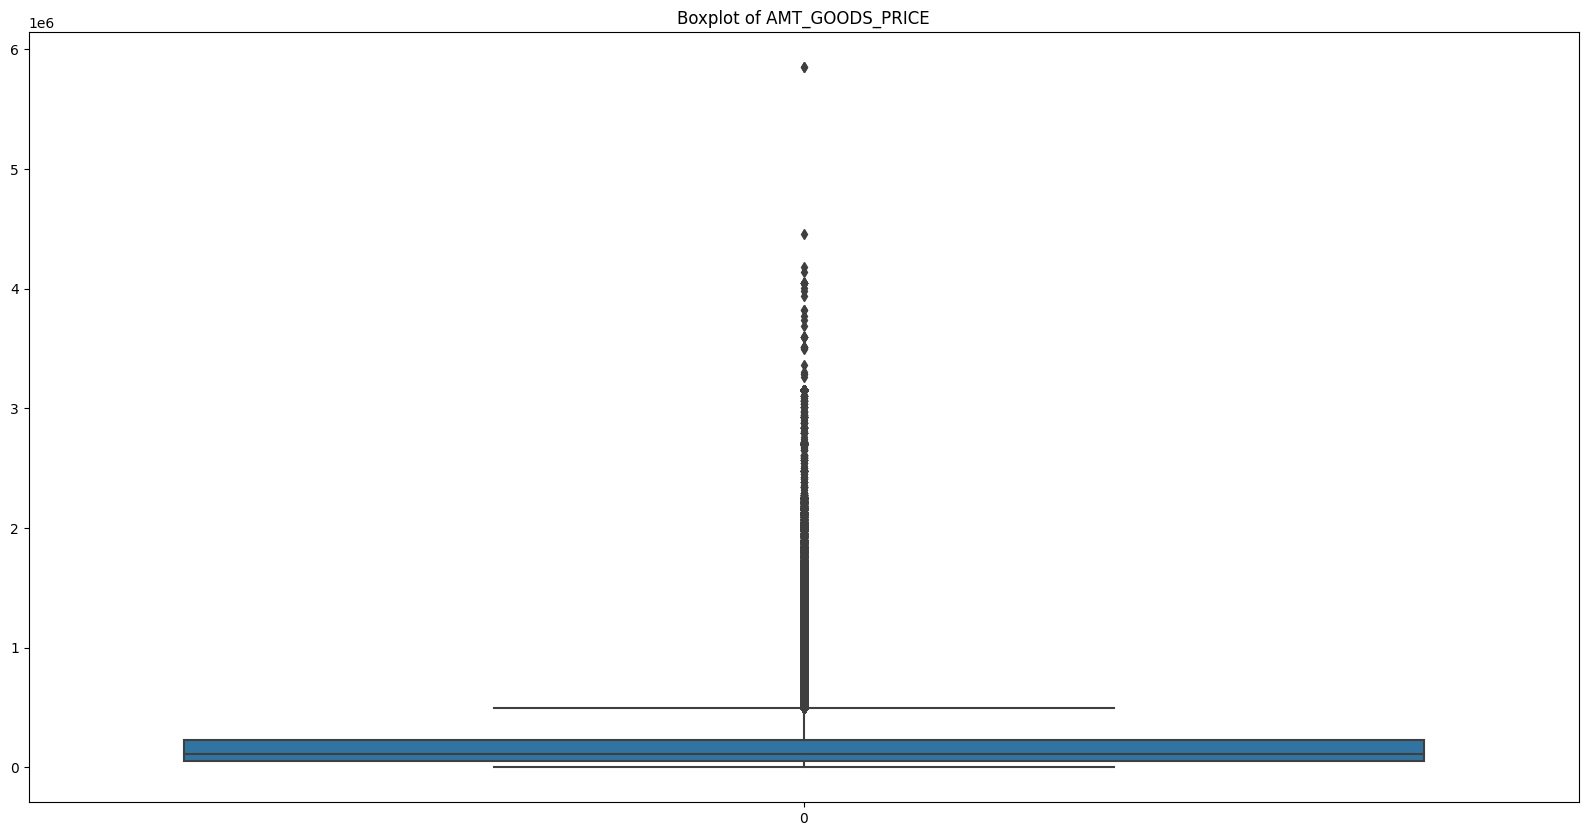

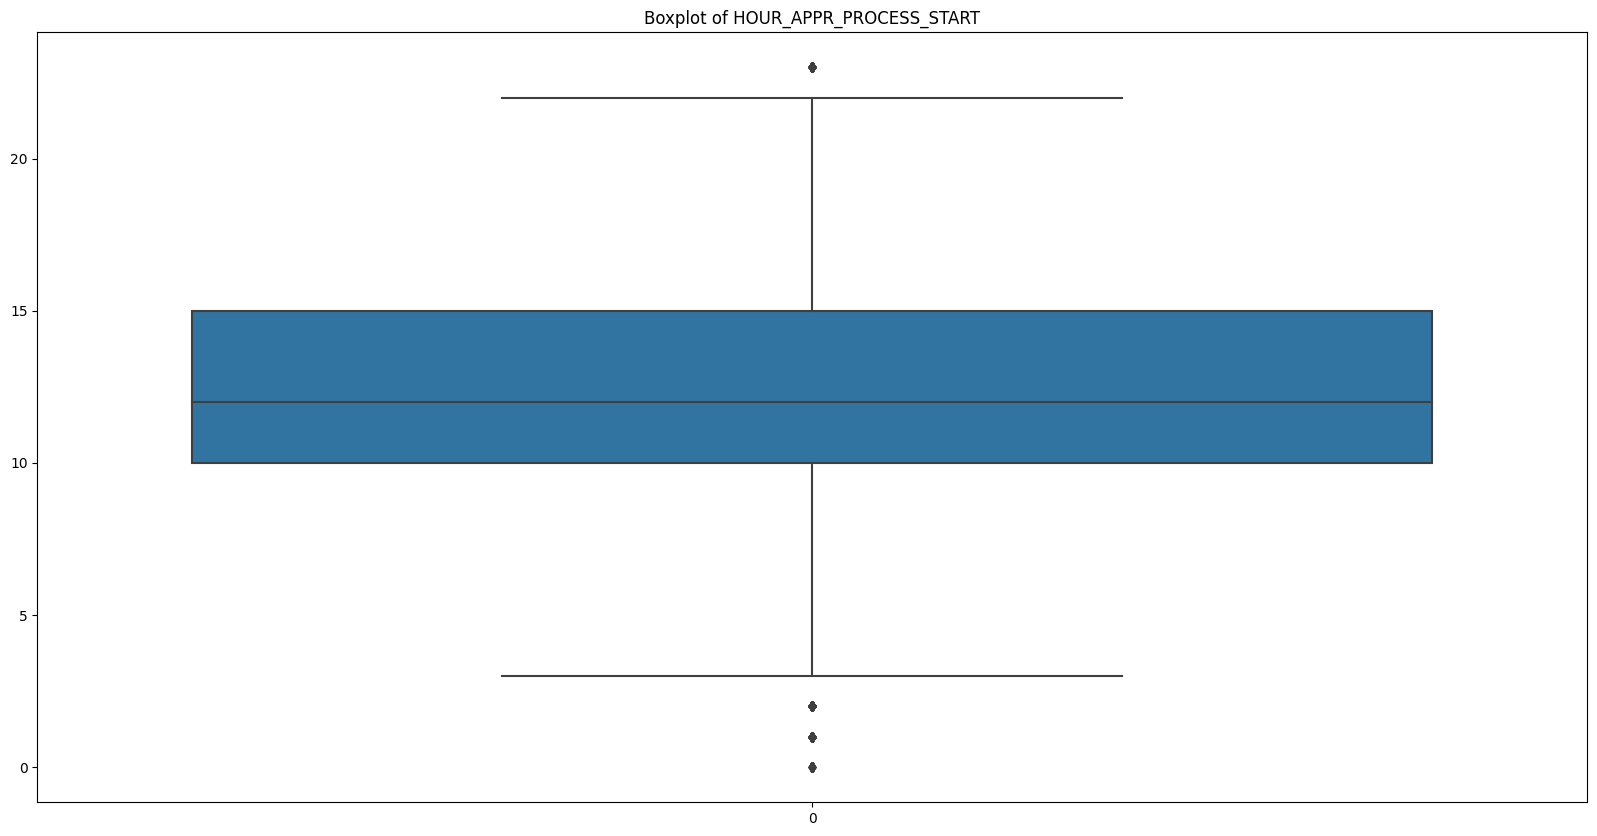

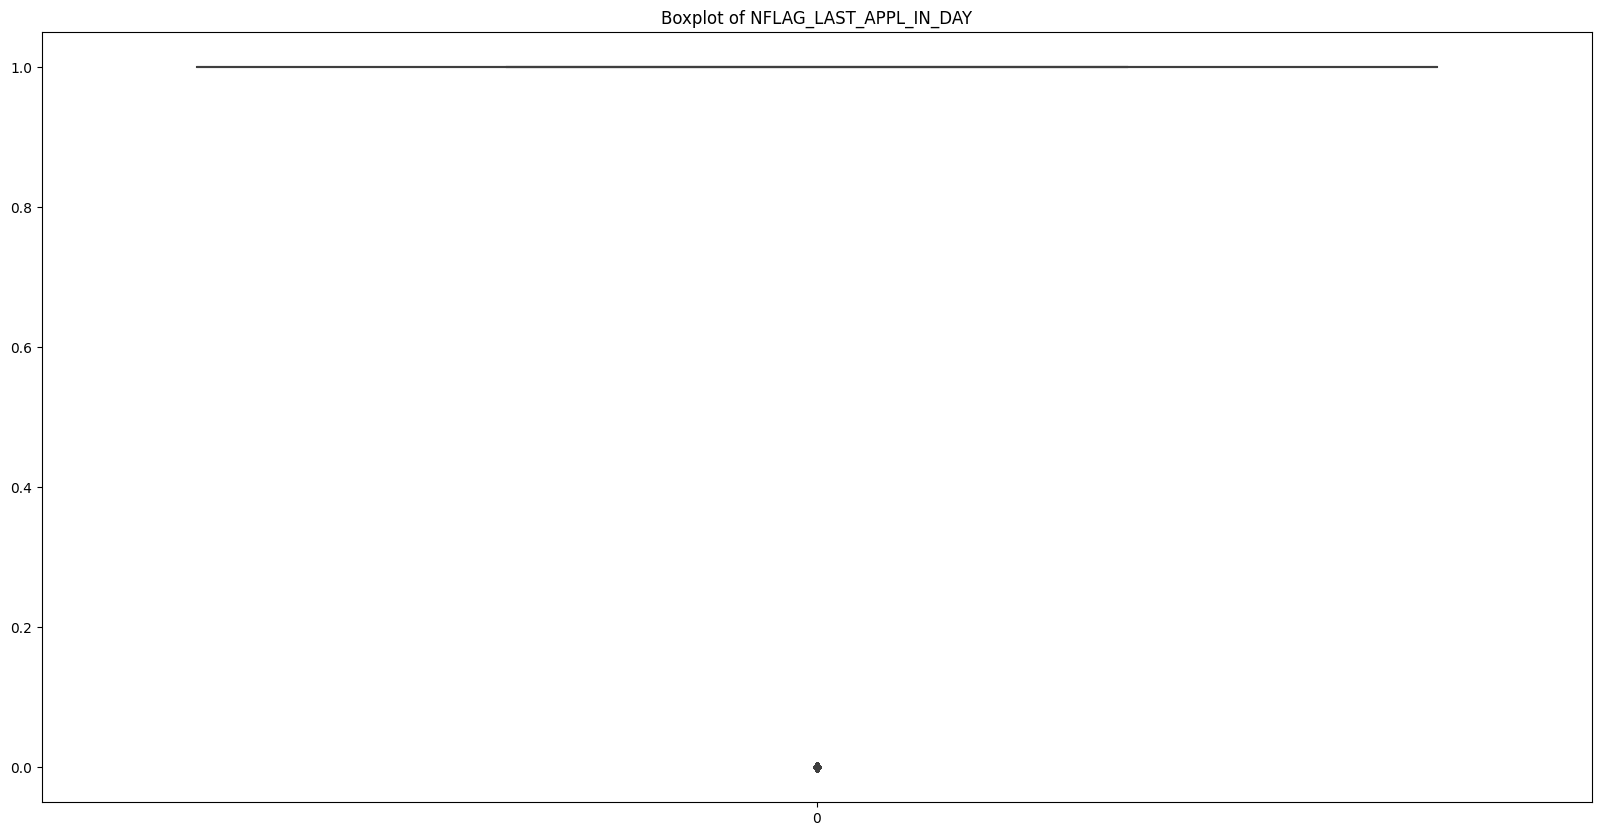

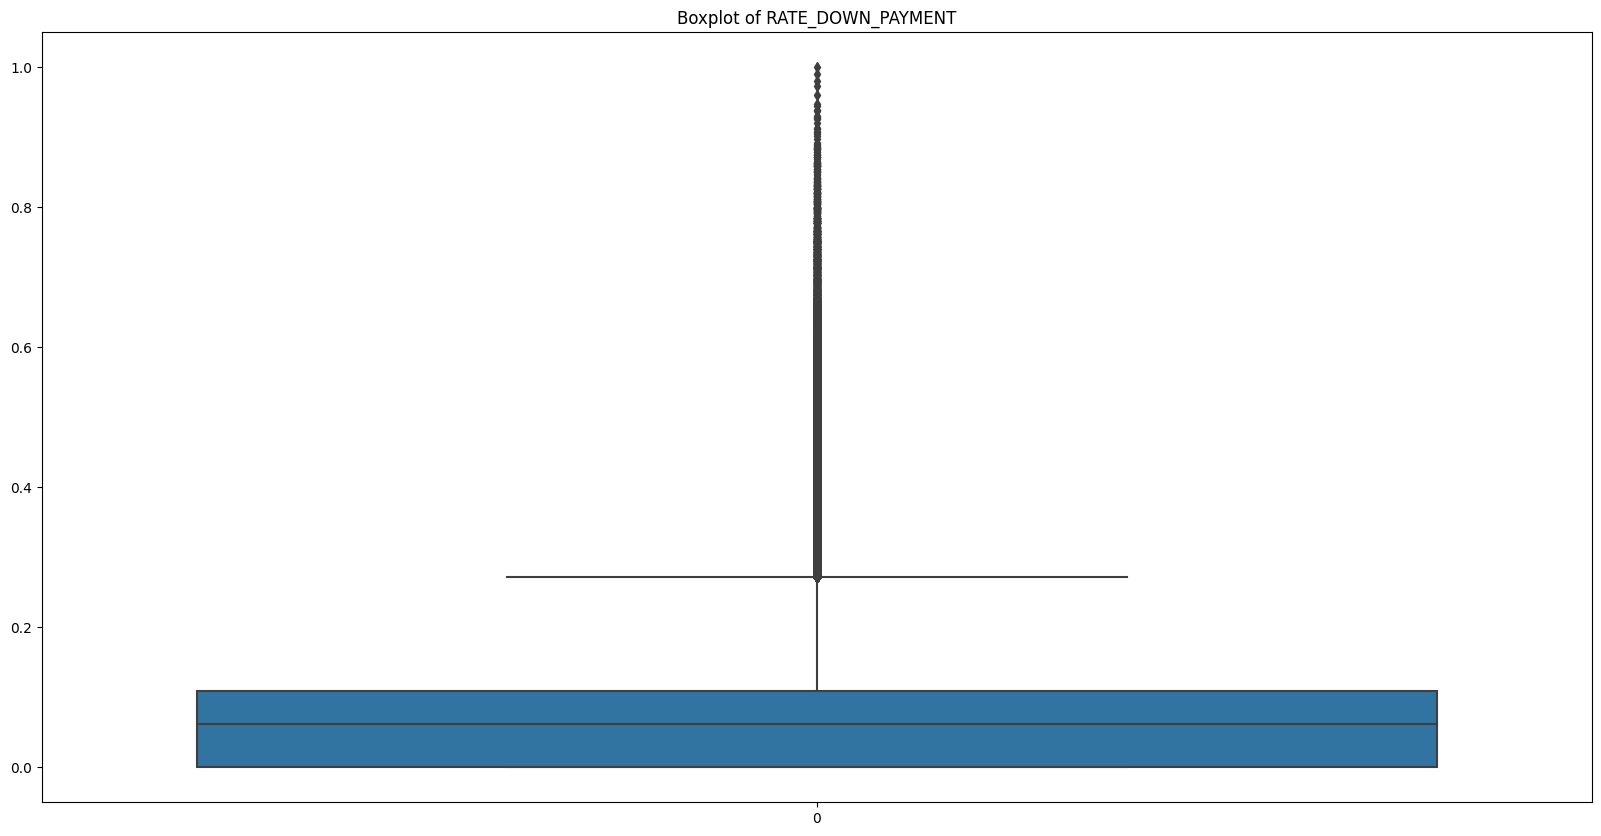

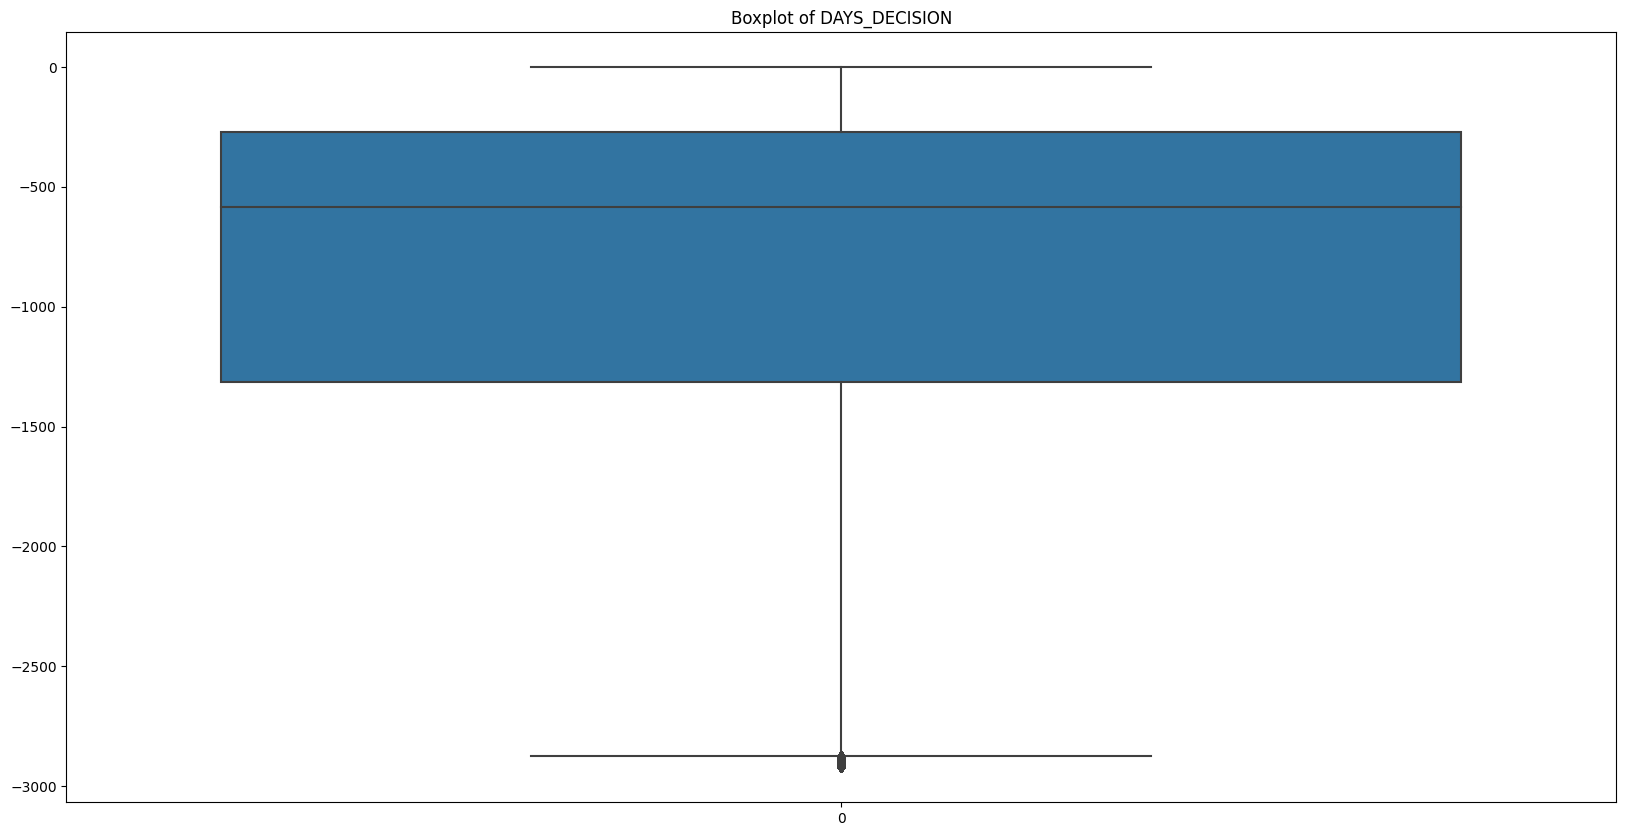

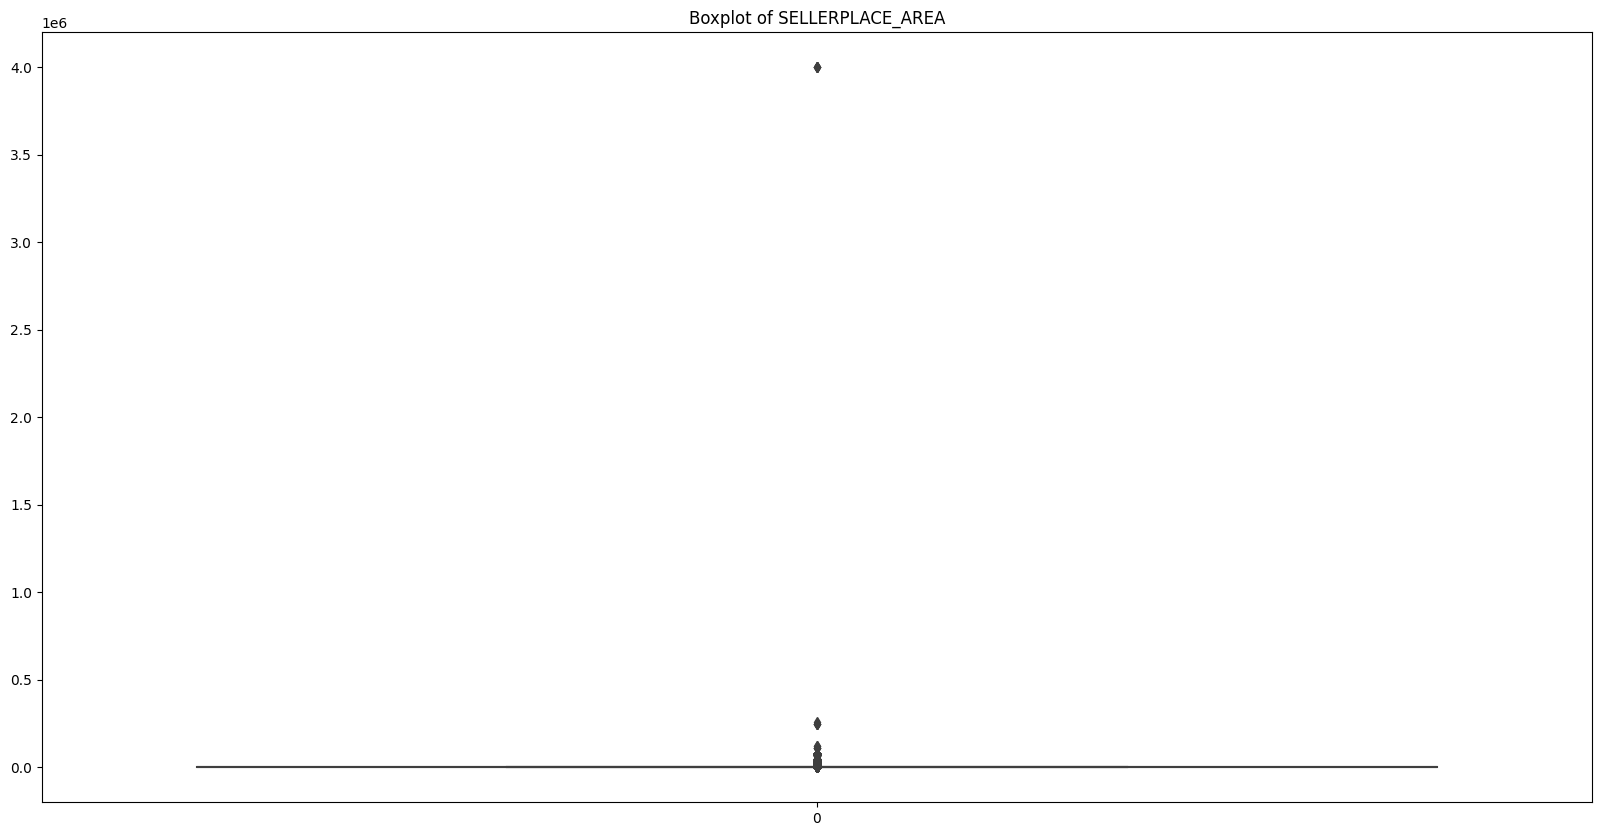

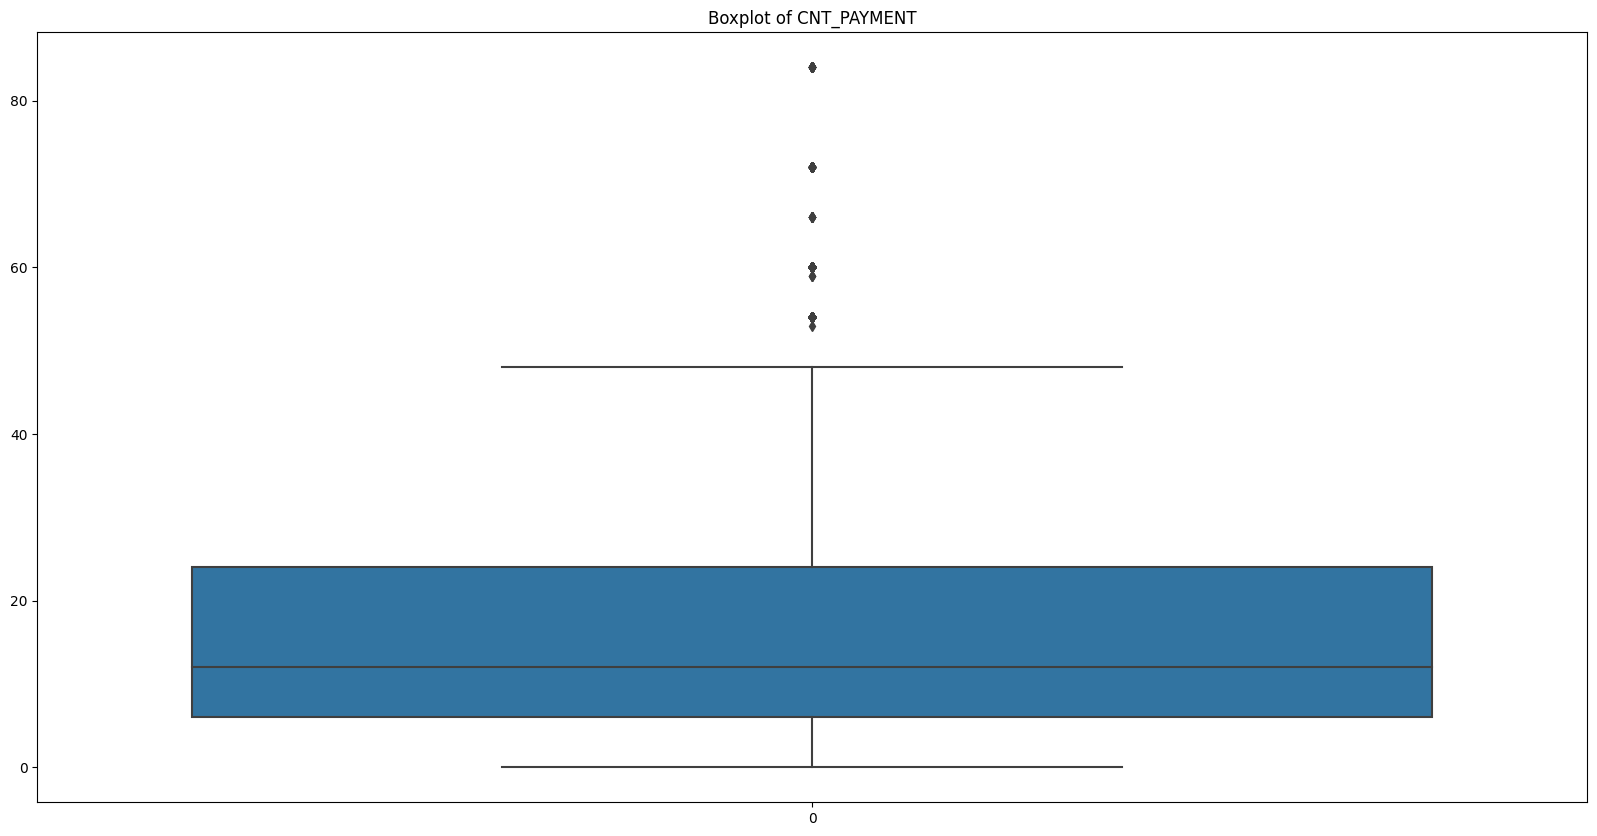

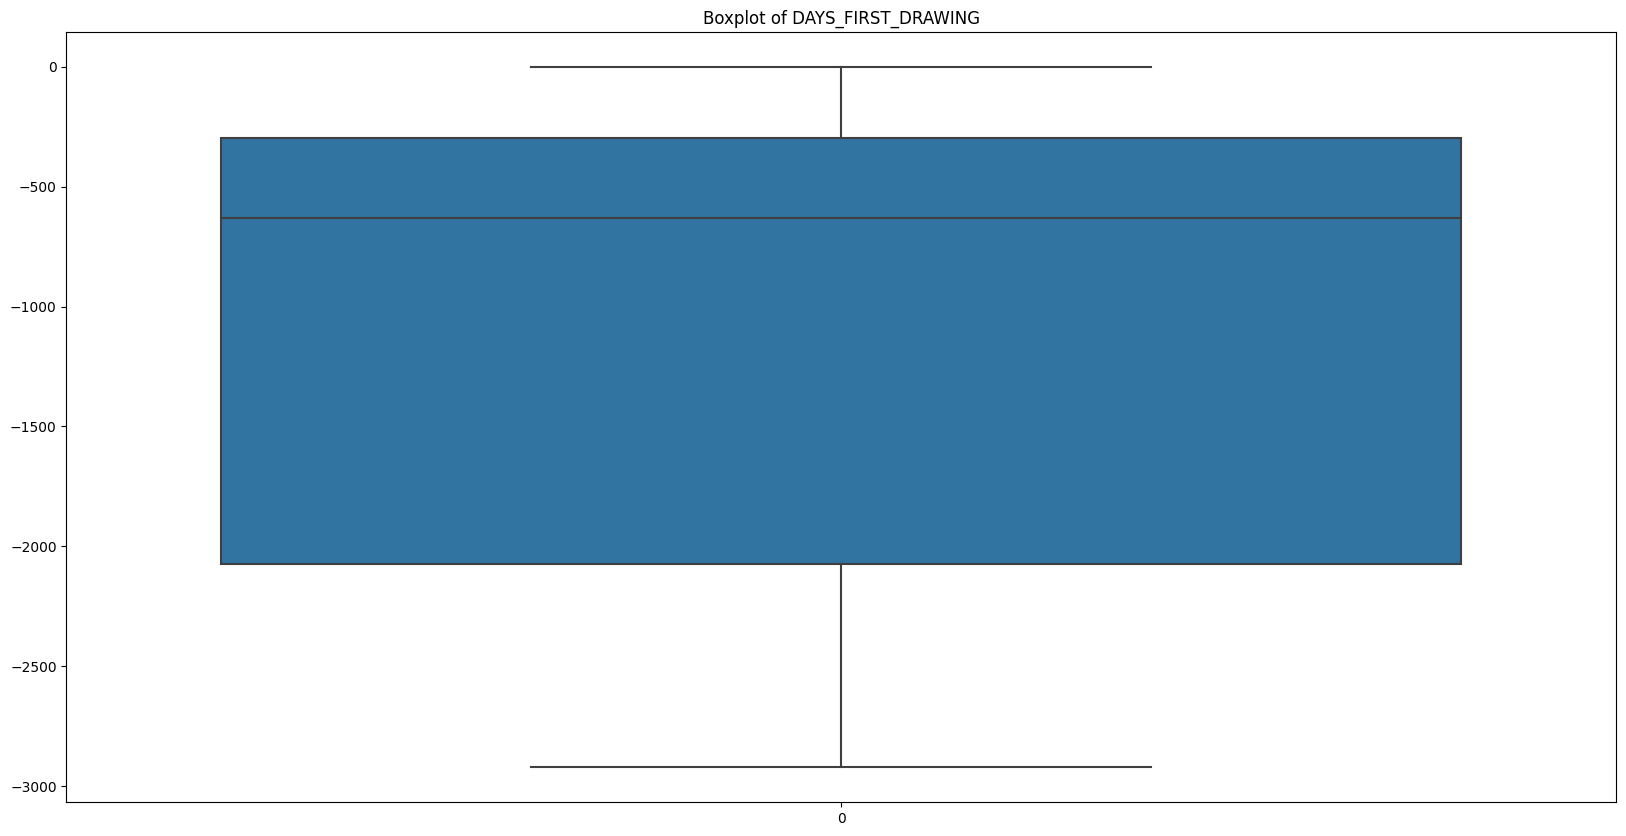

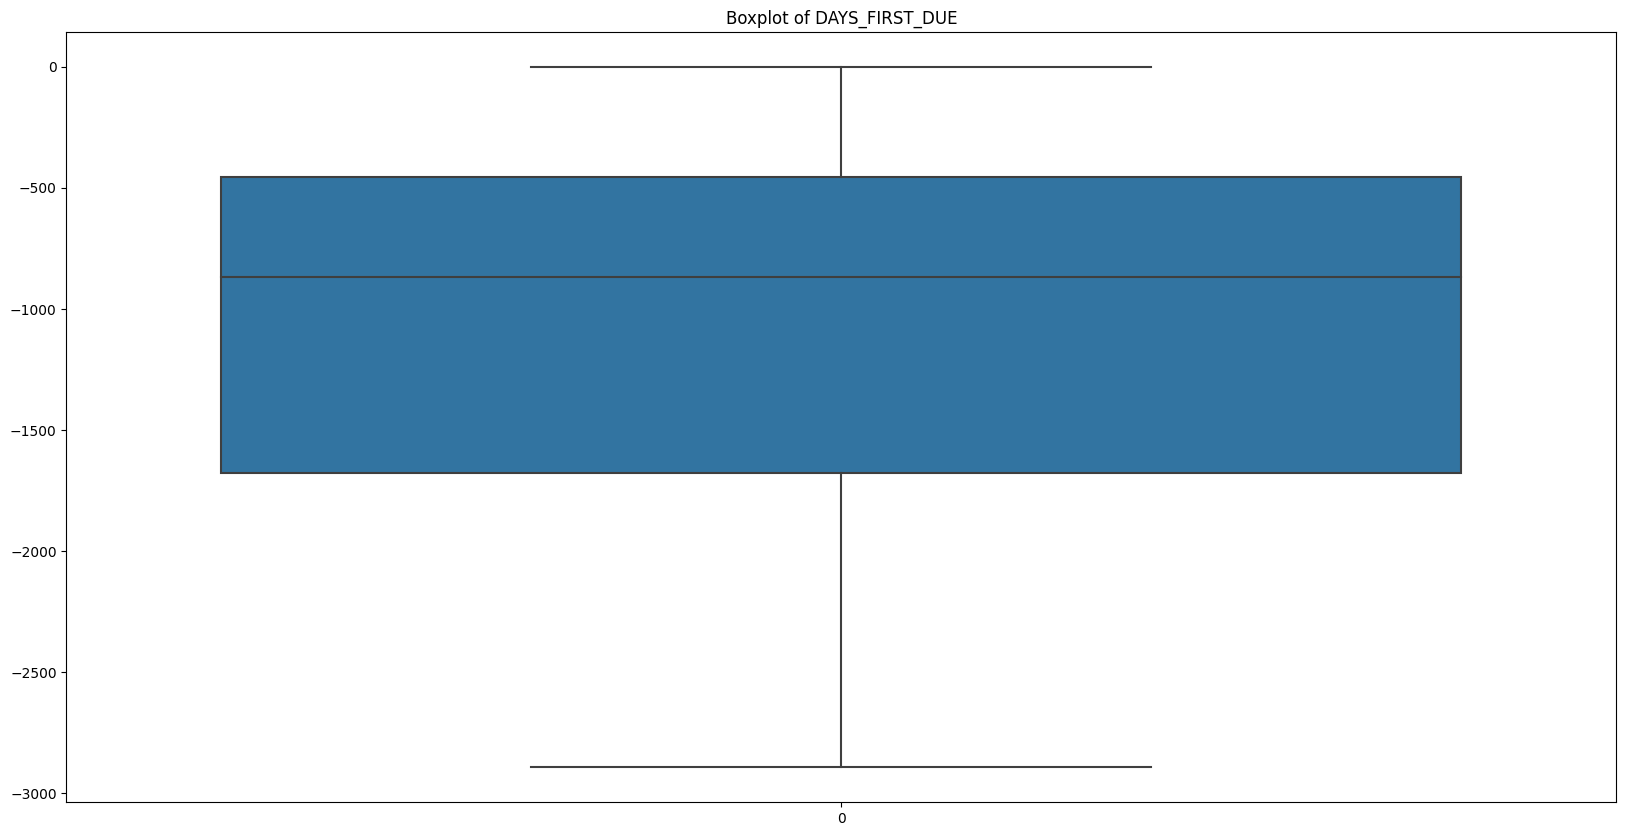

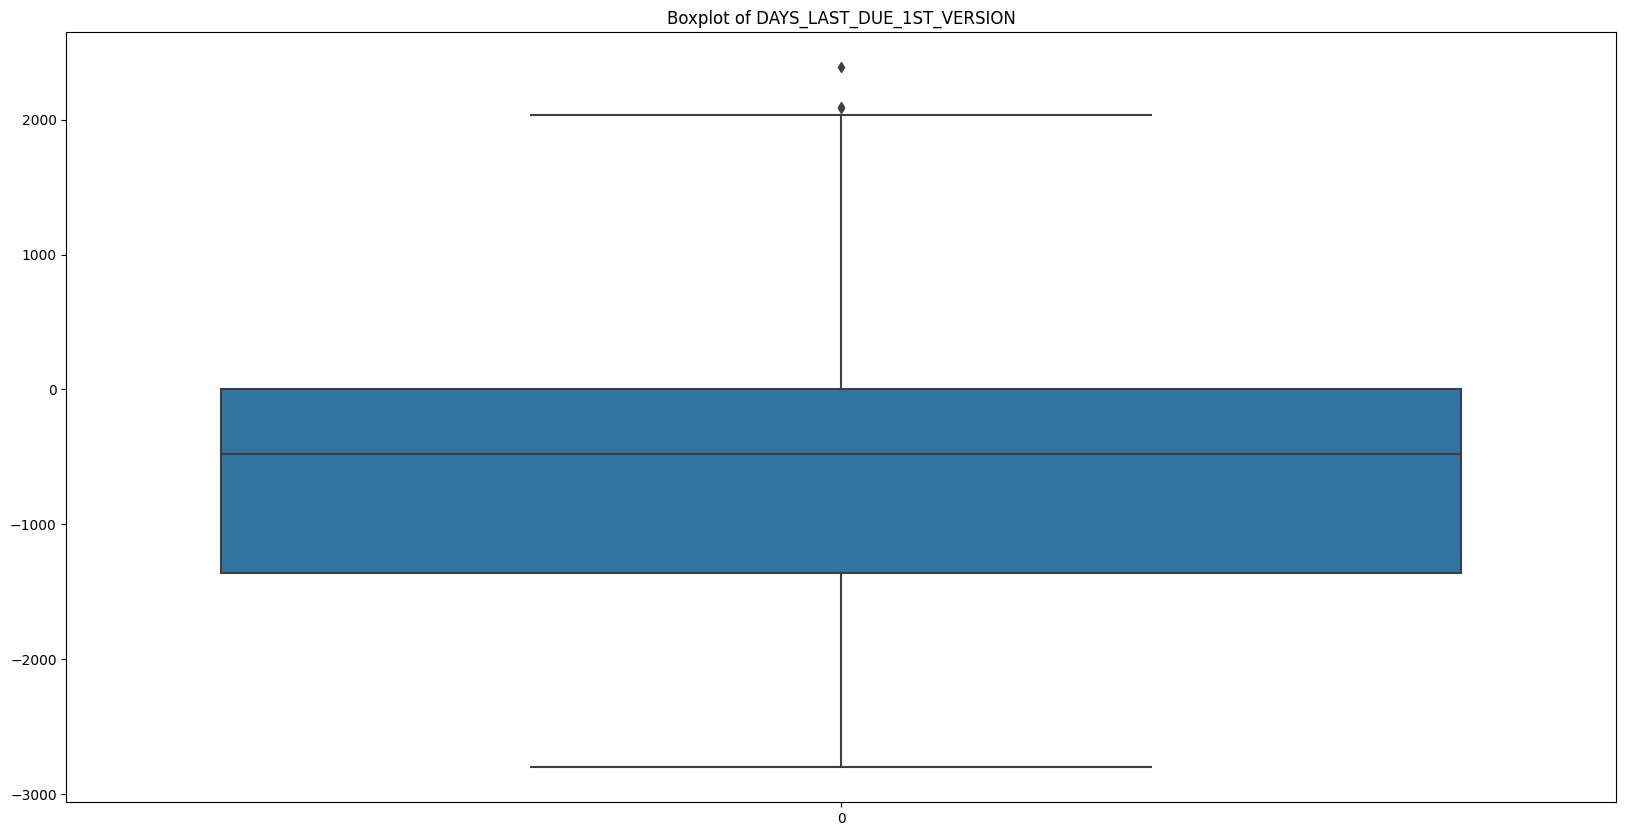

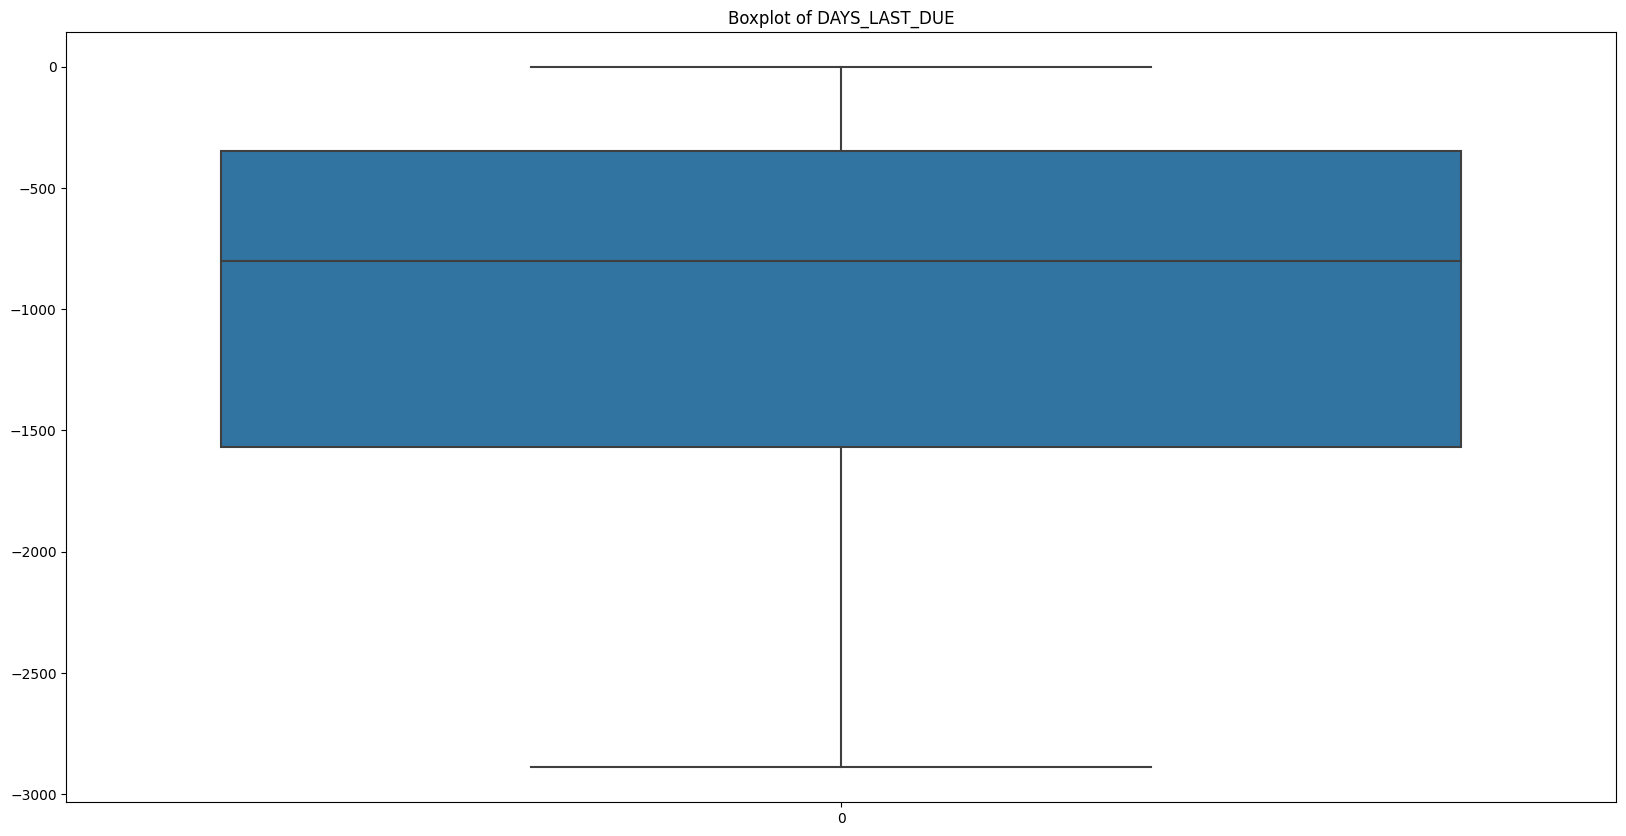

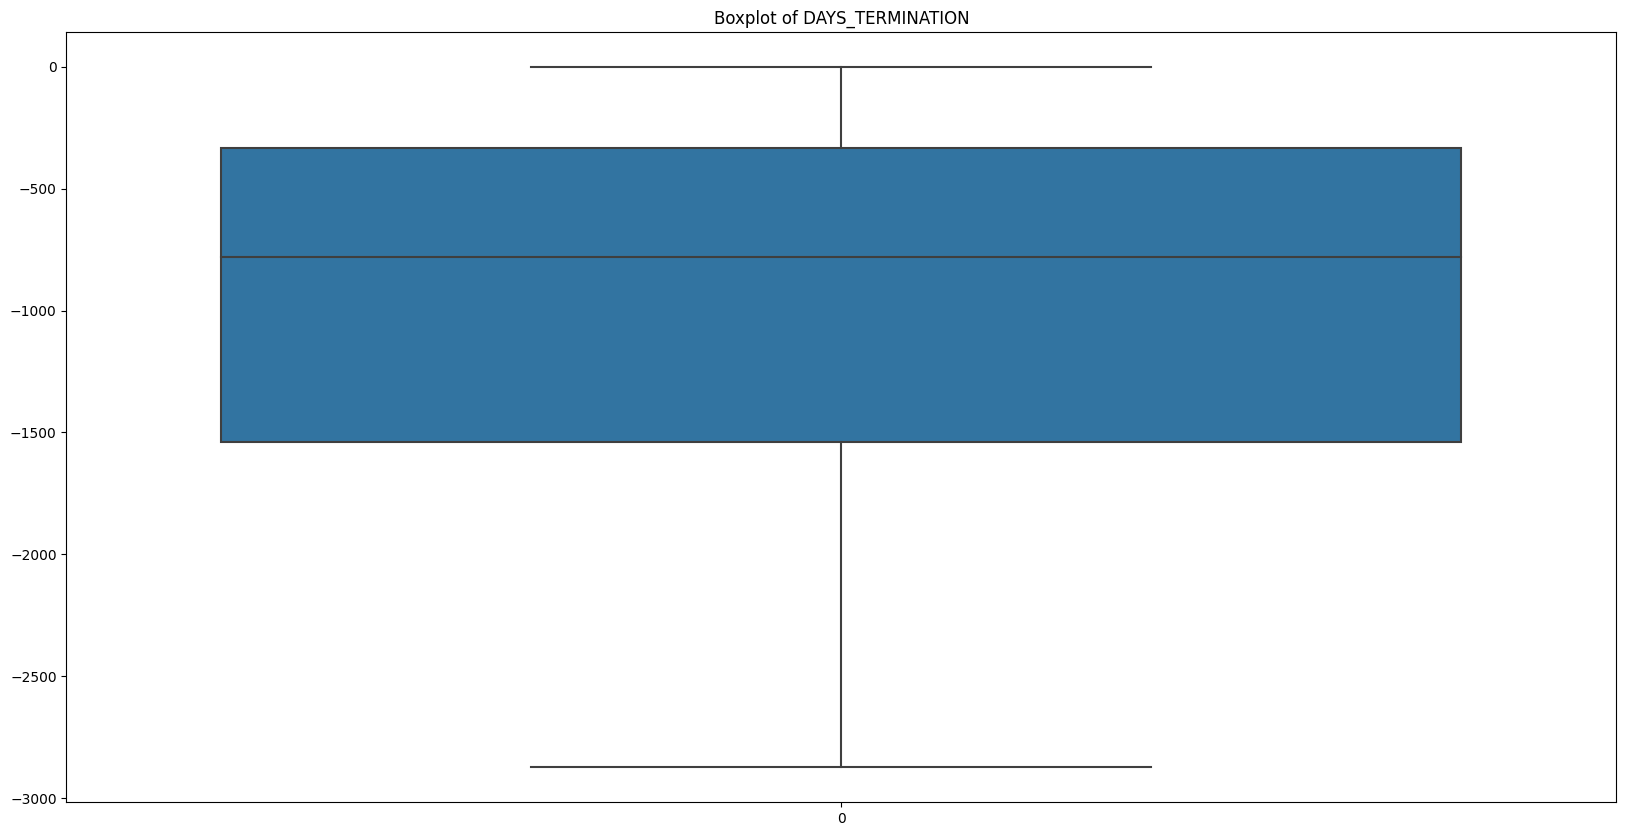

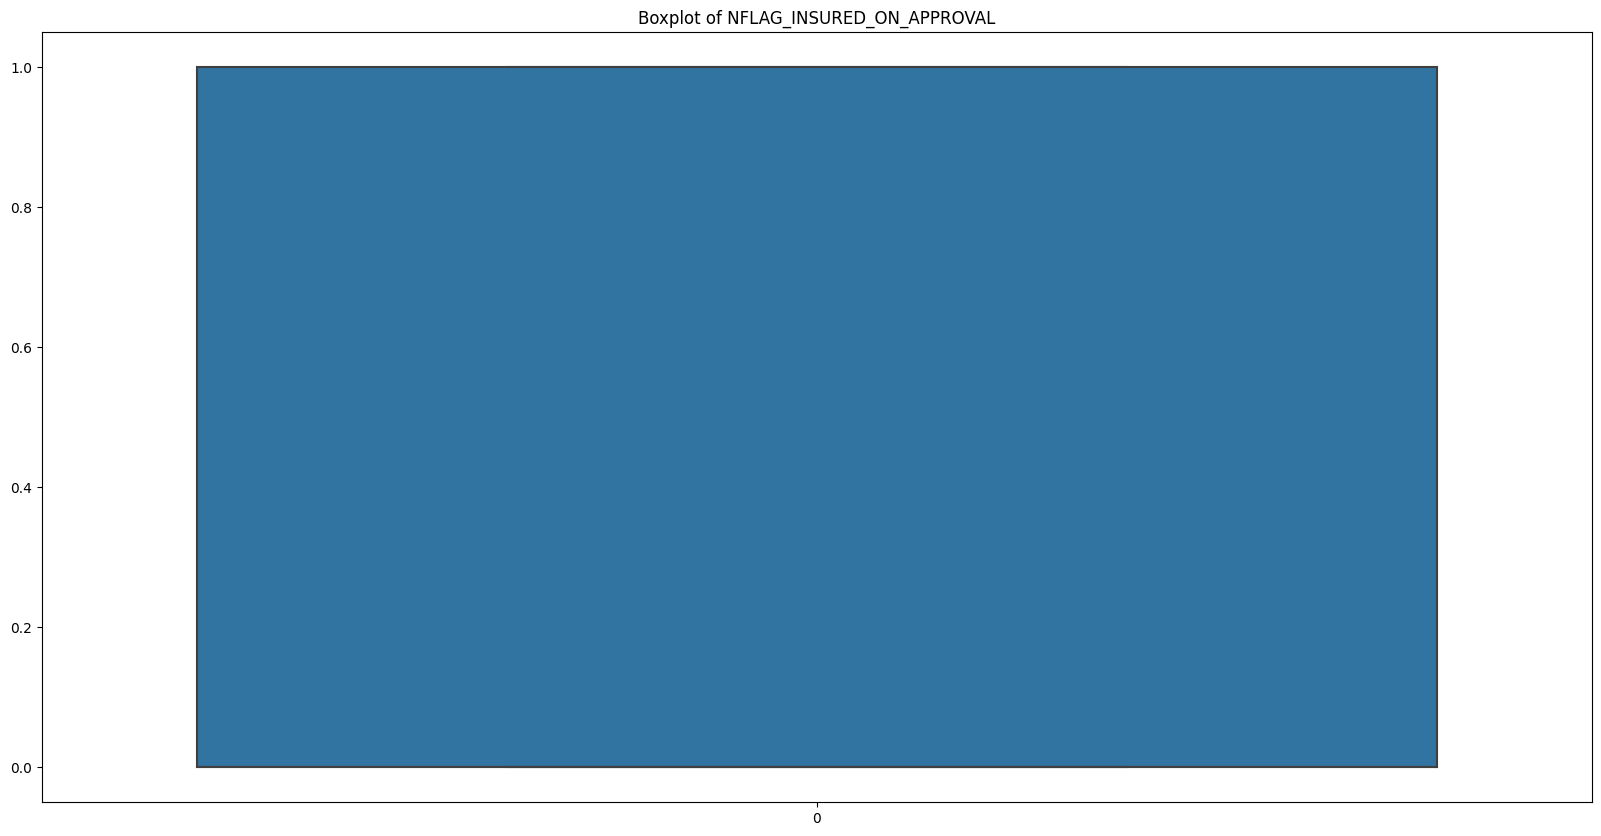

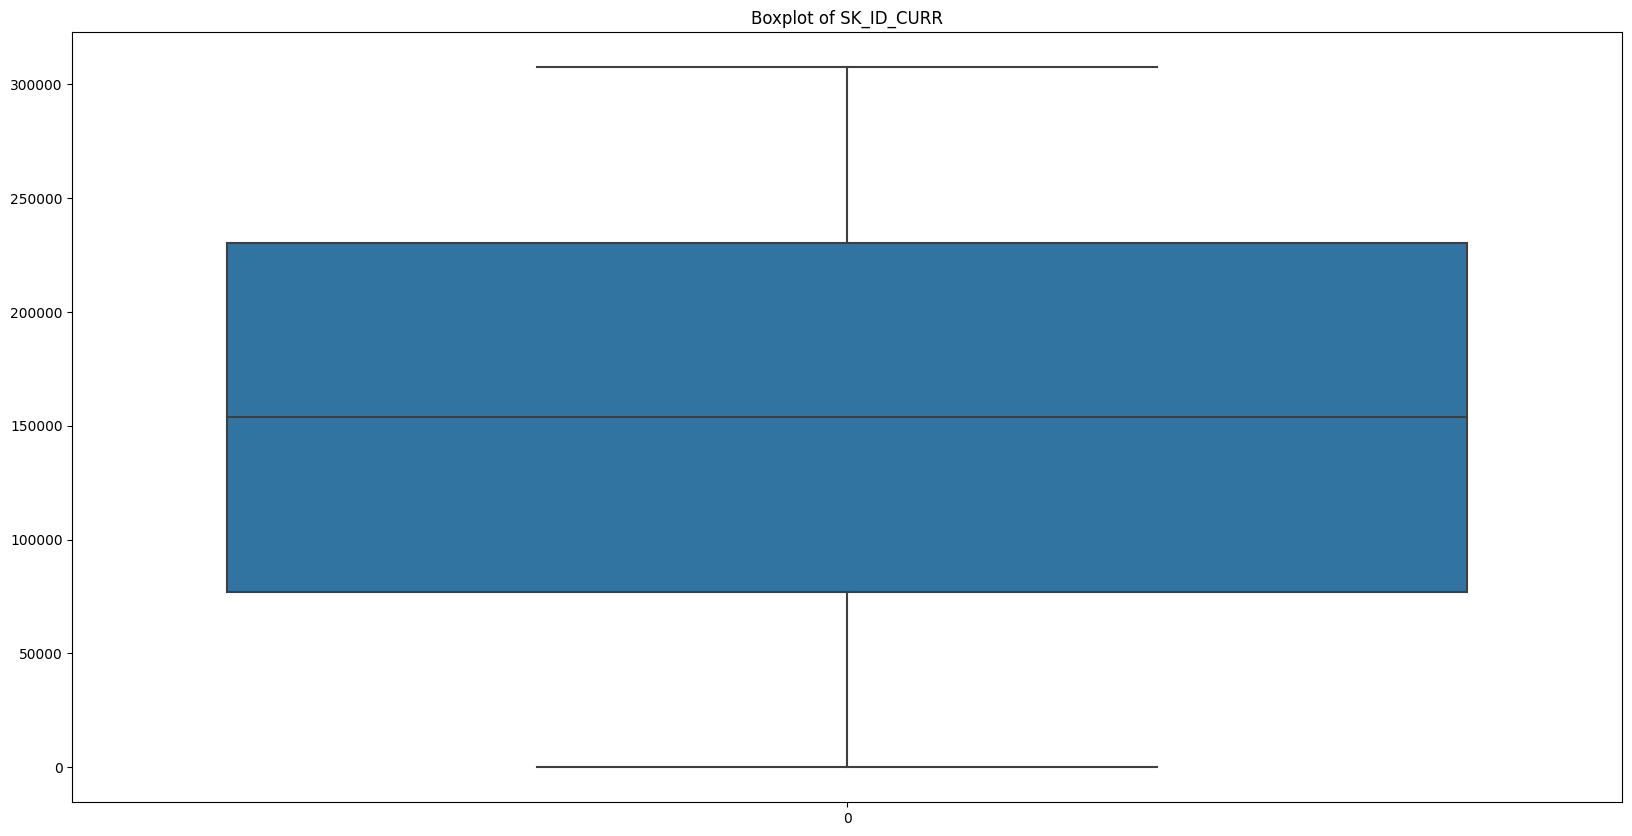

In [64]:
# Vẽ boxplot của các biến numeric
def plot_boxplot(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        plt.figure(figsize=(20,10))
        sns.boxplot(df[col], orient = 'v')
        plt.title('Boxplot of {}'.format(col))
        plt.show()
plot_boxplot(prev_df)

In [65]:
# Load data bảng application_train để lấy biến TARGET
app_df = pd.read_csv("C:/Users/admin/Downloads/dseb-63-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_train.csv")
app_df

Unnamed: 0  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0                0       0         Cash loans           F            N   
1                1       0         Cash loans           F            N   
2                2       0         Cash loans           M            N   
3                3       0         Cash loans           M            N   
4                4       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
246004      246004       0         Cash loans           M            N   
246005      246005       0         Cash loans           F            N   
246006      246006       0         Cash loans           F            N   
246007      246007       1         Cash loans           F            N   
246008      246008       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    N             0          270000.0   1293502.5   
1                    Y             0          135000.0    312682.5   
2                    Y             0          121500.0    513000.0   
3                    Y             0           99000.0    490495.5   
4                    Y             0          360000.0   1530000.0   
...                ...           ...               ...         ...   
246004               N             0          157500.0    254700.0   
246005               Y             0           72000.0    269550.0   
246006               Y             0          153000.0    677664.0   
246007               Y             0          171000.0    370107.0   
246008               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0           35698.5  ...                 0                0                0   
1           29686.5  ...                 0                0                0   
2           21865.5  ...                 0                0                0   
3           27517.5  ...                 0                0                0   
4           42075.0  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
246004      27558.0  ...                 0                0                0   
246005      12001.5  ...                 0                0                0   
246006      29979.0  ...                 0                0                0   
246007      20205.0  ...                 0                0                0   
246008      49117.5  ...                 0                0                0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                             0.0                       0.0   
1                             NaN                       NaN   
2                             0.0                       0.0   
3                             0.0                       0.0   
4                             0.0                       0.0   
...                           ...                       ...   
246004                        NaN                       NaN   
246005                        NaN                       NaN   
246006                        1.0                       0.0   
246007                        0.0                       0.0   
246008                        0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                             0.0                        0.0   
1                             NaN                        NaN   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   
...                           ...                        ...   
246004                        NaN                        NaN   
246005                        NaN               

In [ ]:
prev_df_drop = prev_df.drop(['SK_ID_PREV'], axis = 1)
prev_df_drop

In [66]:
prev_df_merge = prev_df.merge(app_df[['SK_ID_CURR', 'TARGET']], on = 'SK_ID_CURR', how = 'left')
prev_df_merge

SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0           2030495     Consumer loans     1730.430          17145.0   
1           1696966     Consumer loans    68258.655        1800000.0   
2           2154916     Consumer loans    12417.390         108400.5   
3           2802425         Cash loans    25188.615         607500.0   
4           1536272         Cash loans    21709.125         450000.0   
...             ...                ...          ...              ...   
1413696     1261221     Consumer loans     6030.675         133866.0   
1413697     1563733     Consumer loans    13726.080         137250.0   
1413698     2319569     Consumer loans     4716.495          46800.0   
1413699     2829648     Consumer loans    10301.940         101745.0   
1413700     1944034         Cash loans          NaN              0.0   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0           17145.0               0.0          17145.0   
1         1754721.0          180000.0        1800000.0   
2          119848.5               0.0         108400.5   
3          679671.0               NaN         607500.0   
4          512370.0               NaN         450000.0   
...             ...               ...              ...   
1413696    133866.0               0.0         133866.0   
1413697    123525.0           13725.0         137250.0   
1413698     46800.0               0.0          46800.0   
1413699    112491.0               0.0         101745.0   
1413700         0.0               NaN              NaN   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         SATURDAY                       18   
2                           SUNDAY                       14   
3                         THURSDAY                       11   
4                        WEDNESDAY                        9   
...                            ...                      ...   
1413696                   SATURDAY                       15   
1413697                   SATURDAY                       14   
1413698                     FRIDAY                        9   
1413699                     FRIDAY                       12   
1413700                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  ...  NAME_YIELD_GROUP  \
0                                 Y  ...            middle   
1                                 Y  ...        low_normal   
2                                 Y  ...            middle   
3                                 Y  ...        low_action   
4                                 Y  ...        low_normal   
...                             ...  ...               ...   
1413696                           Y  ...        low_action   
1413697                           Y  ...        low_normal   
1413698                           Y  ...            middle   
1413699                           Y  ...        low_action   
1413700                           Y  ...               NaN   

                    PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0              POS mobile with interest                NaN          -42.0   
1            POS industry with interest                NaN            NaN   
2            POS industry with interest                NaN         -512.0   
3                      Cash X-Sell: low                NaN         -134.0   
4                      Cash X-Sell: low                NaN         -485.0   
...                                 ...                ...            ...   
1413696  POS household without interest                NaN         -801.0   
1413697     POS household with interest                NaN         -464.0   
1413698      POS industry with interest                NaN         -119.0   
1413699  POS household without interest                NaN         -529.0   
1413700                            Cash                NaN            NaN   

         DAYS_LAST_D

In [67]:
# drop tất cả các dòng có TARGET = NaN
prev_merge.dropna(subset = ['TARGET'], inplace = True)
prev_merge

NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
3               Cash loans    25188.615         607500.0    679671.0   
4               Cash loans    21709.125         450000.0    512370.0   
5           Consumer loans     4830.930          47250.0     23688.0   
6           Consumer loans     6664.275          71352.0     71352.0   
7          Revolving loans    11250.000              0.0    225000.0   
...                    ...          ...              ...         ...   
1413696     Consumer loans     6030.675         133866.0    133866.0   
1413697     Consumer loans    13726.080         137250.0    123525.0   
1413698     Consumer loans     4716.495          46800.0     46800.0   
1413699     Consumer loans    10301.940         101745.0    112491.0   
1413700         Cash loans          NaN              0.0         0.0   

         AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
3                     NaN         607500.0                   THURSDAY   
4                     NaN         450000.0                  WEDNESDAY   
5                 24750.0          47250.0                   THURSDAY   
6                     0.0          71352.0                  WEDNESDAY   
7                     NaN              NaN                    TUESDAY   
...                   ...              ...                        ...   
1413696               0.0         133866.0                   SATURDAY   
1413697           13725.0         137250.0                   SATURDAY   
1413698               0.0          46800.0                     FRIDAY   
1413699               0.0         101745.0                     FRIDAY   
1413700               NaN              NaN                     SUNDAY   

         HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
3                             11                           Y   
4                              9                           Y   
5                             11                           Y   
6                              9                           Y   
7                             13                           Y   
...                          ...                         ...   
1413696                       15                           Y   
1413697                       14                           Y   
1413698                        9                           Y   
1413699                       12                           Y   
1413700                       10                           Y   

         NFLAG_LAST_APPL_IN_DAY  ...  NAME_YIELD_GROUP  \
3                             1  ...        low_action   
4                             1  ...        low_normal   
5                             1  ...              high   
6                             1  ...        low_normal   
7                             1  ...               NaN   
...                         ...  ...               ...   
1413696                       1  ...        low_action   
1413697                       1  ...        low_normal   
1413698                       1  ...            middle   
1413699                       1  ...        low_action   
1413700                       1  ...               NaN   

                    PRODUCT_COMBINATION DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
3                      Cash X-Sell: low                NaN          -134.0   
4                      Cash X-Sell: low                NaN          -485.0   
5           POS household with interest                NaN          -588.0   
6            POS industry with interest                NaN         -1176.0   
7                           Card X-Sell             -713.0          -673.0   
...                                 ...                ...             ...   
1413696  POS household without interest                NaN          -801.0   
1413697     POS household with interest                NaN          -464.0   
1413698      POS industry with interest                NaN          -119.0   
1413699  POS househo

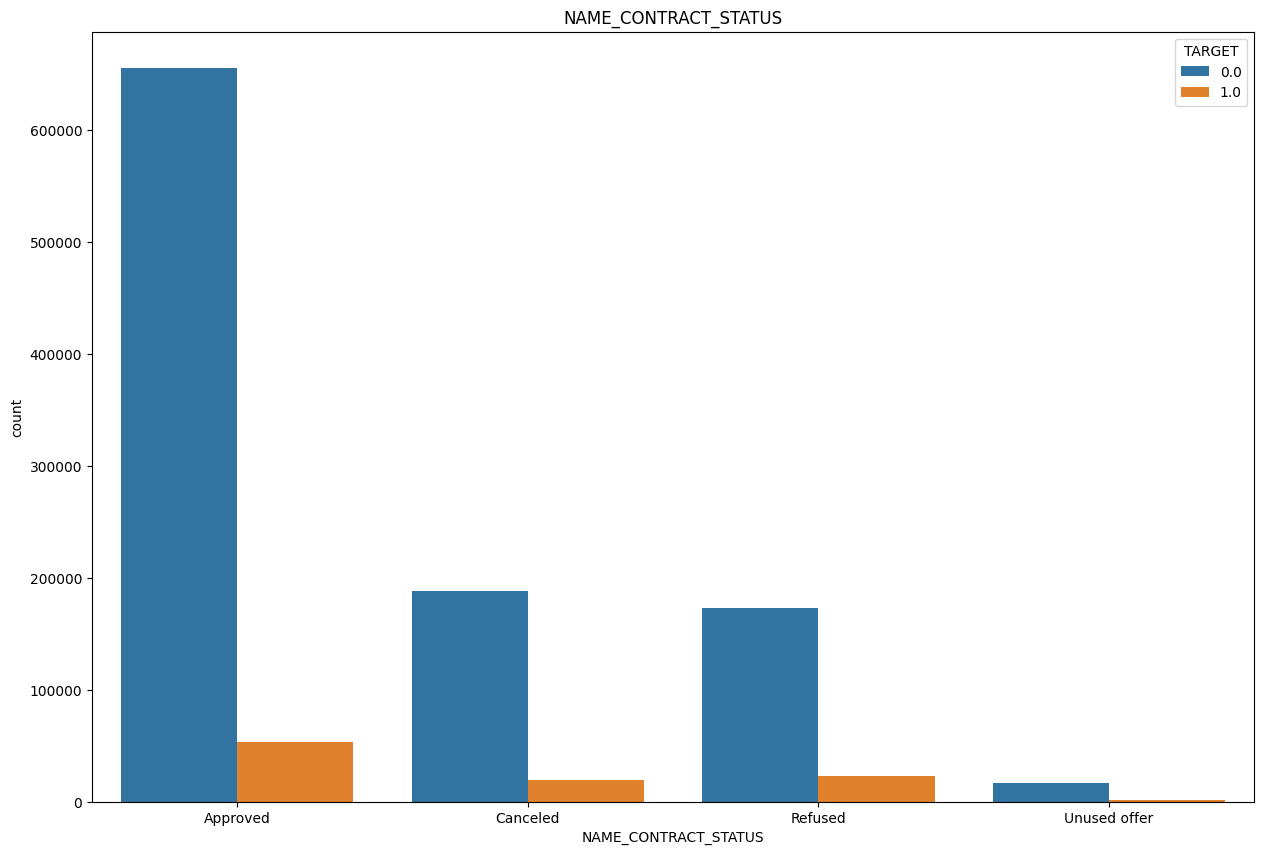

In [70]:
# 'NAME_CONTRACT_STATUS'
plt.figure(figsize=(15,10))
sns.countplot(x = prev_merge['NAME_CONTRACT_STATUS'], hue = prev_merge['TARGET'])
plt.title('NAME_CONTRACT_STATUS')
plt.show()

In [74]:
# Tỉ lệ khách hàng có TARGET = 1 theo từng trạng thái hợp đồng
total_refused = prev_merge[prev_merge['NAME_CONTRACT_STATUS'] == 'Refused'].shape[0]
total_approved = prev_merge[prev_merge['NAME_CONTRACT_STATUS'] == 'Approved'].shape[0]
nondefaulter_refused = prev_merge[(prev_merge['NAME_CONTRACT_STATUS'] == 'Refused') & (prev_merge['TARGET'] == 0)].shape[0]
defaulter_approved = prev_merge[(prev_merge['NAME_CONTRACT_STATUS'] == 'Approved') & (prev_merge['TARGET'] == 1)].shape[0]

In [73]:
# defaulter approved
print('% khách hàng bị vỡ nợ có khoản vay trước thành công là: {}'.format((defaulter_approved/total_approved)*100))


% khách hàng bị vỡ nợ có khoản vay trước thành công là: 7.583832968893278


In [75]:
# non-defaulter refused
print('% khách hàng không bị vỡ nợ có khoản vay trước bị từ chối là: {}'.format((nondefaulter_refused/total_refused)*100))

% khách hàng không bị vỡ nợ có khoản vay trước bị từ chối là: 88.08011176488584


1. AMT_ANNUITY:
- AMT_ANNUITY càng cao thì số người vỡ nợ càng giảm
2. AMT_DOWN_PAYMENT:
- AMT_DOWN_PAYMENT càng cao thì số người vỡ nợ càng giảm
3. HOUR_APPR_PROCESS_START, DAY_DECISION, SELLERPLACE_AREA, DAYS_LAST_DUE:
- HOUR_APPR_PROCESS_START, DAY_DECISION, SELLERPLACE_AREA có phân bố tương đối giống nhau, không có tính quyết định nên cỏ thể BỎ.
4. DAY_FIRST_DRAWING, DAY_FIRST_DUE:
- Cũng tương tự nhưng do tỉ lệ null của 2 features này rất cao (>95%)
5. RATE_DOWN_PAYMENT:
- Những khách hàng có RATE_DOWN_PAYMENT thấp hơn khoảng 0.9 thì có khả năng vỡ nợ cao hơn


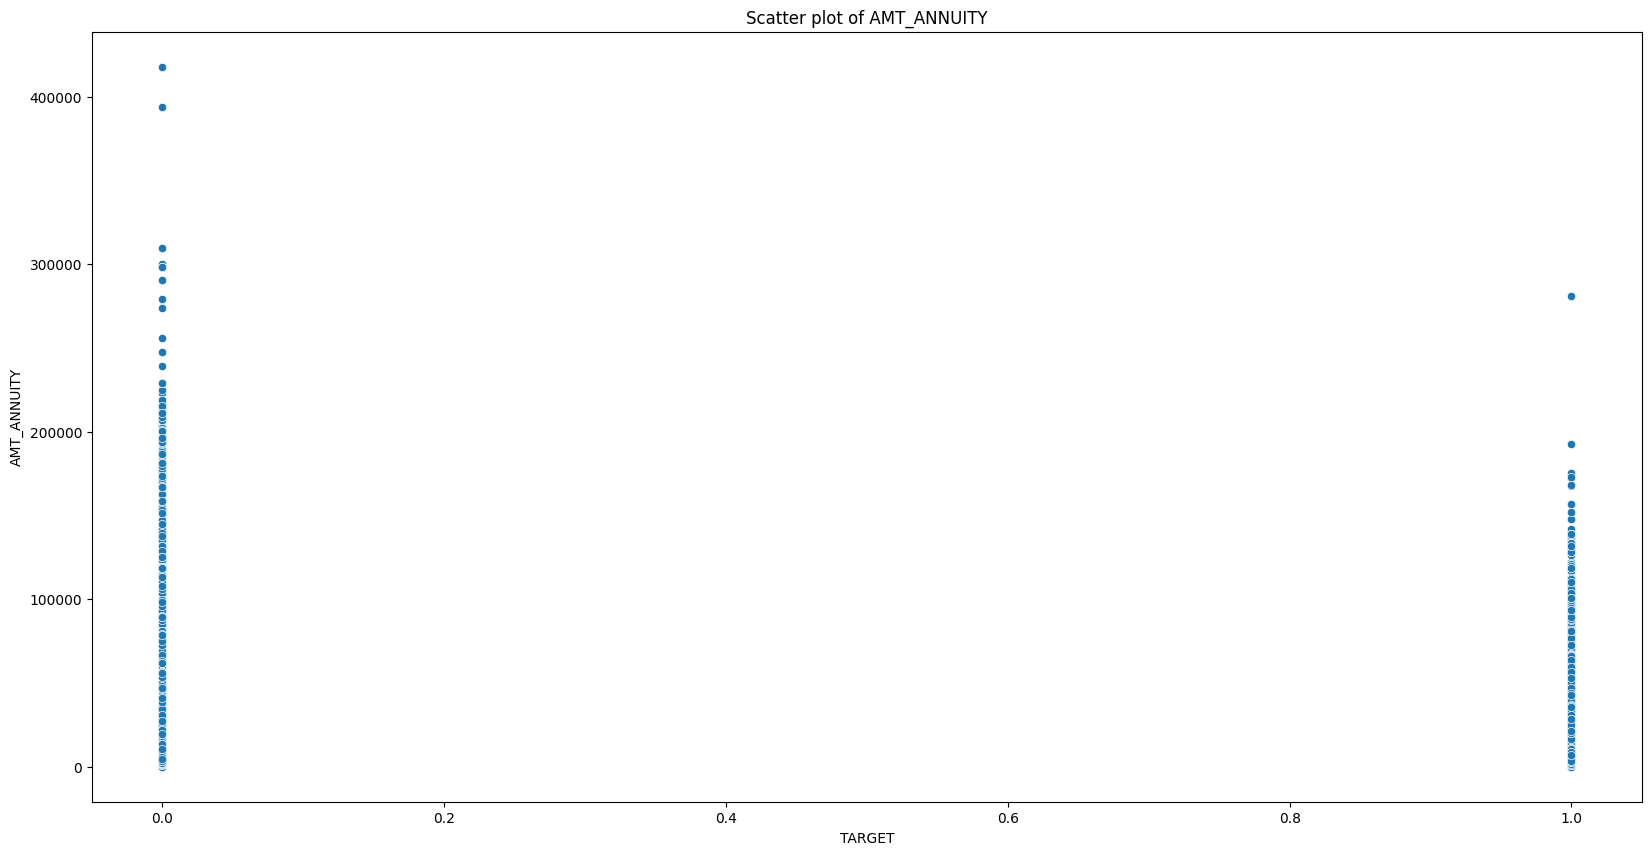

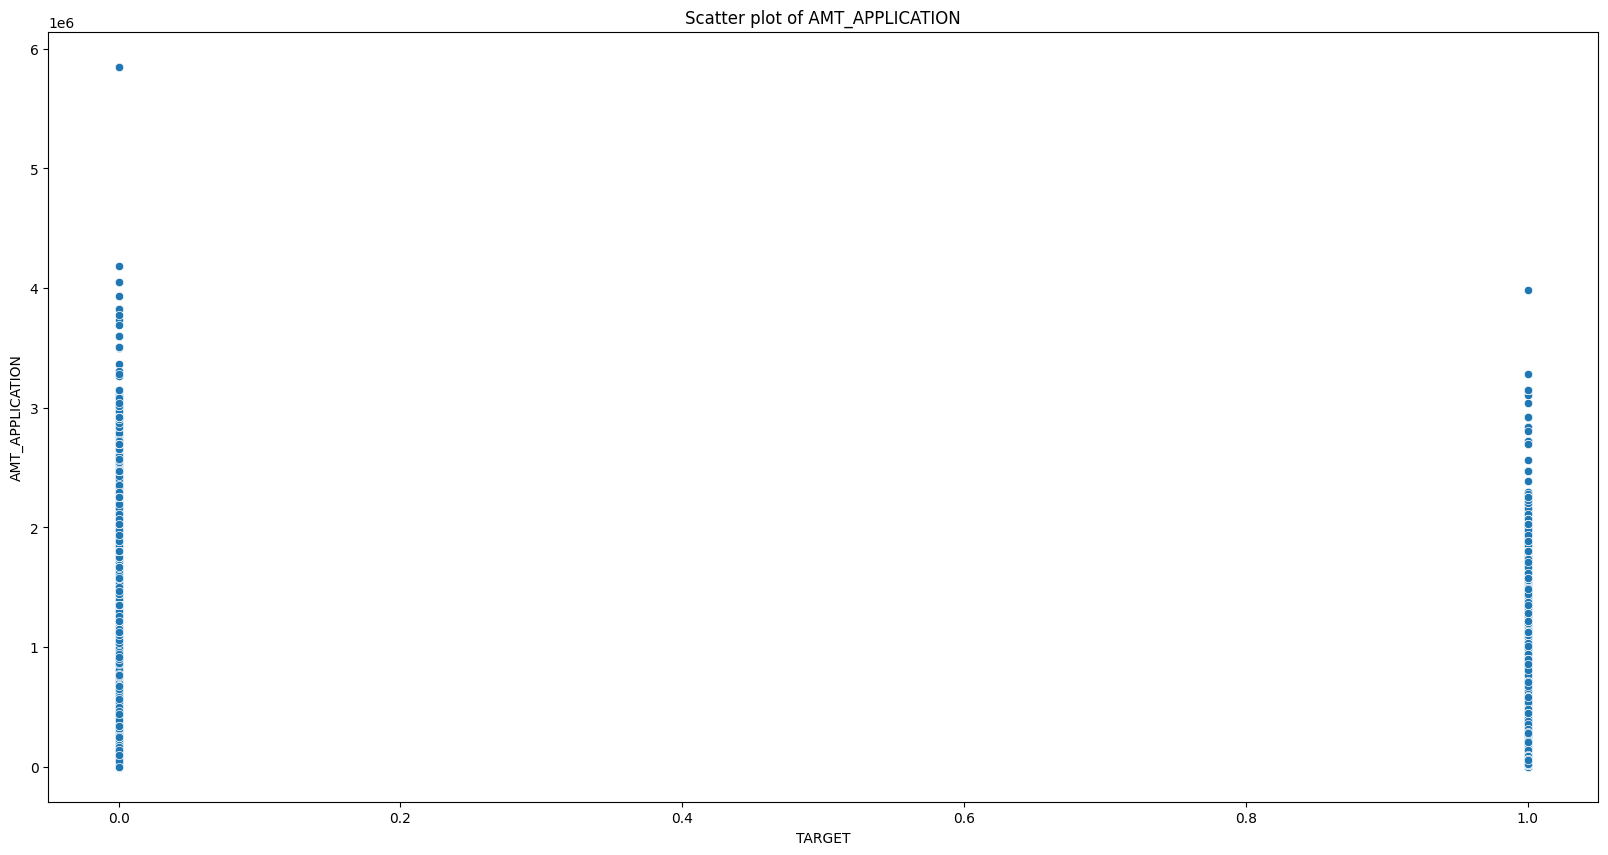

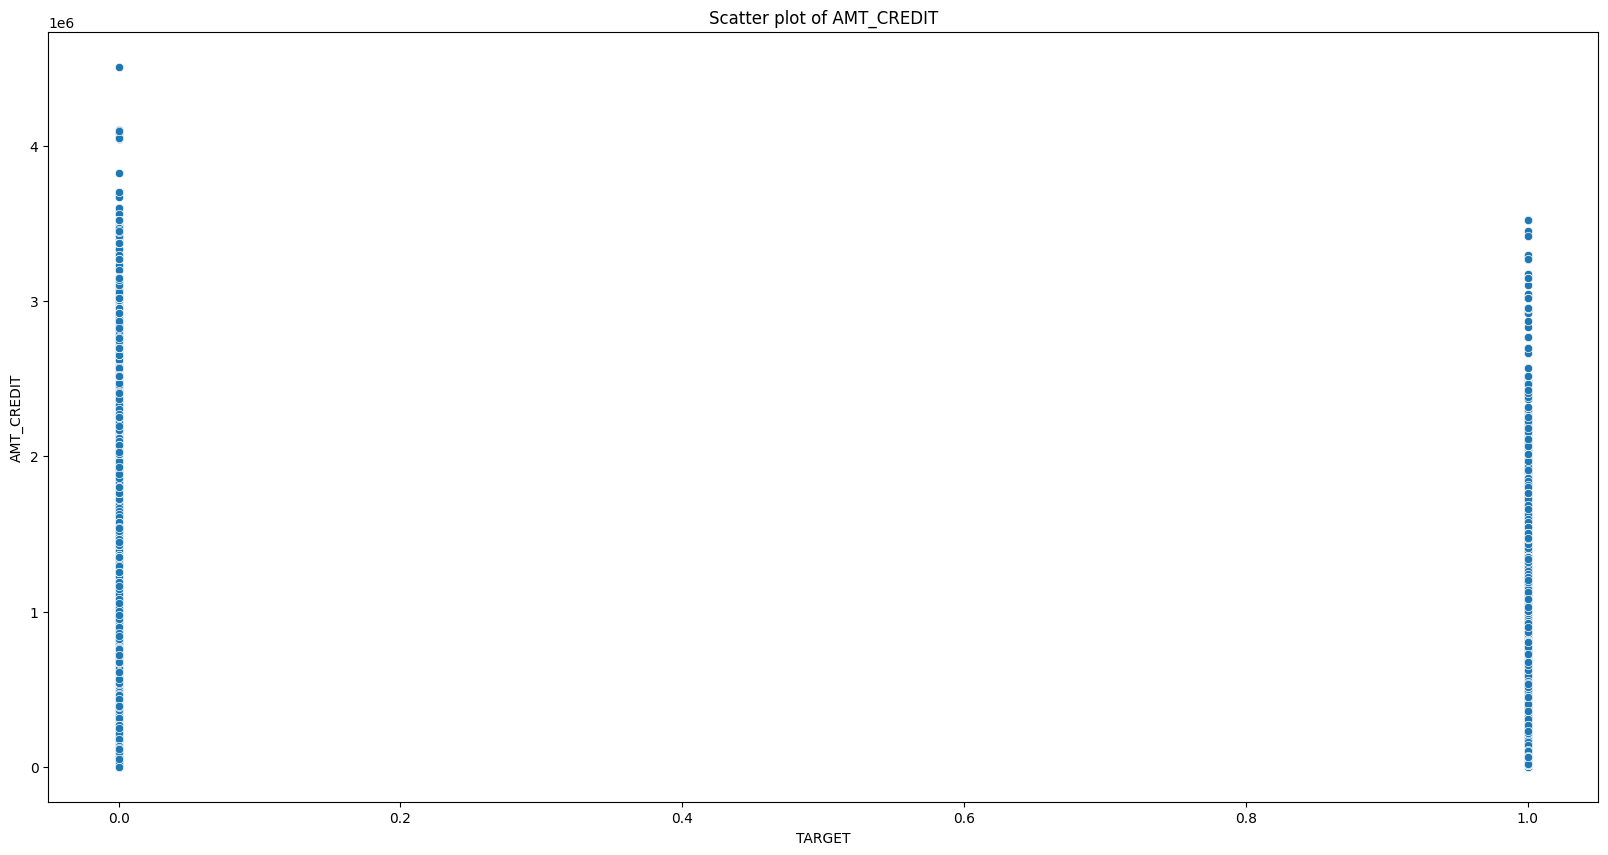

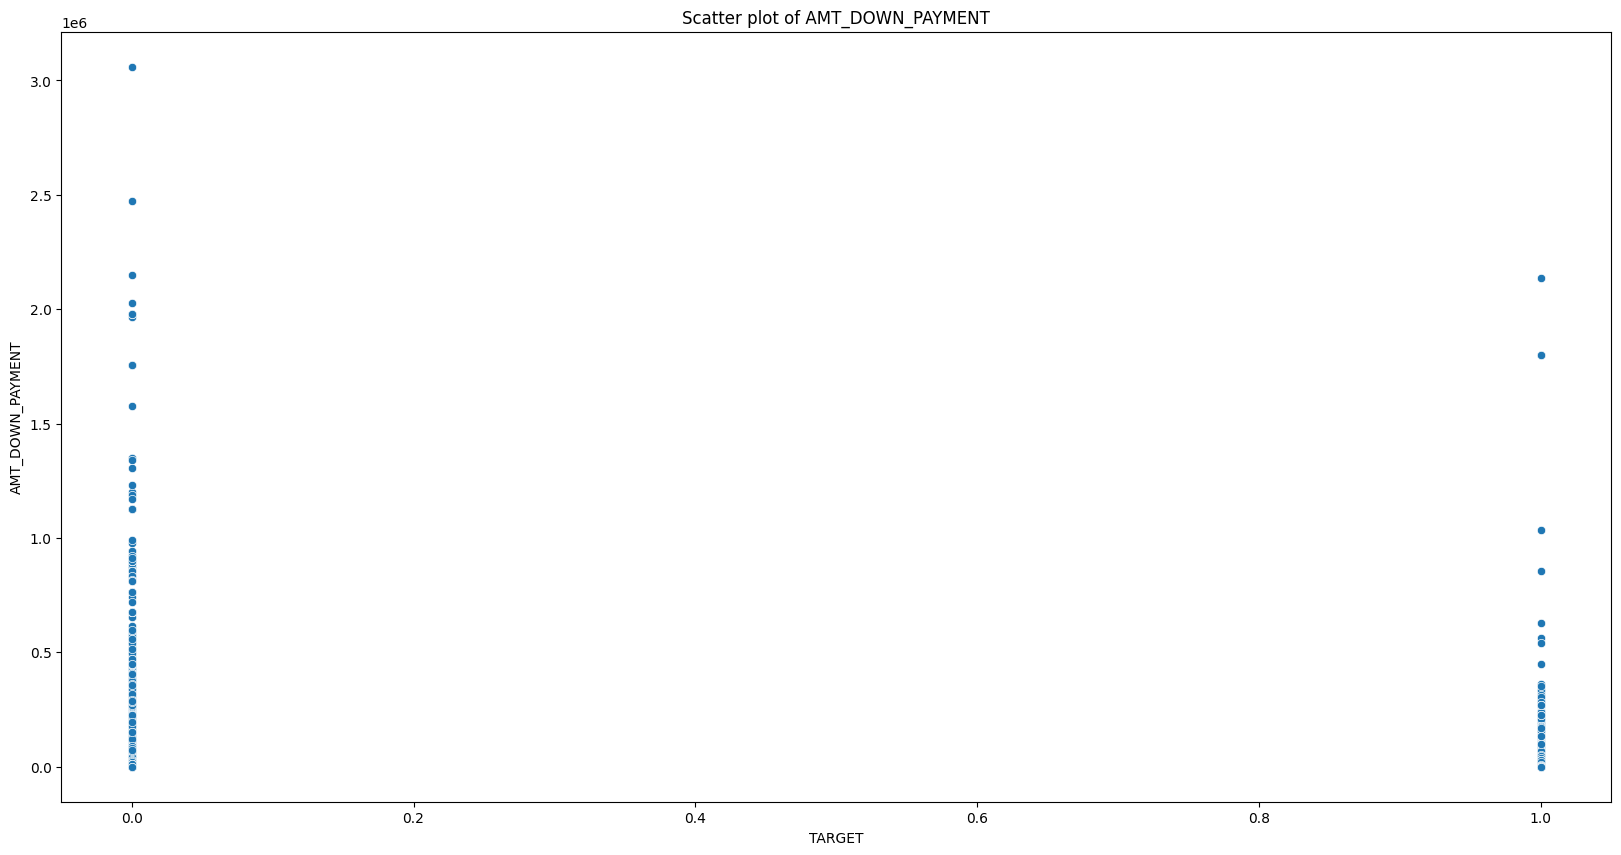

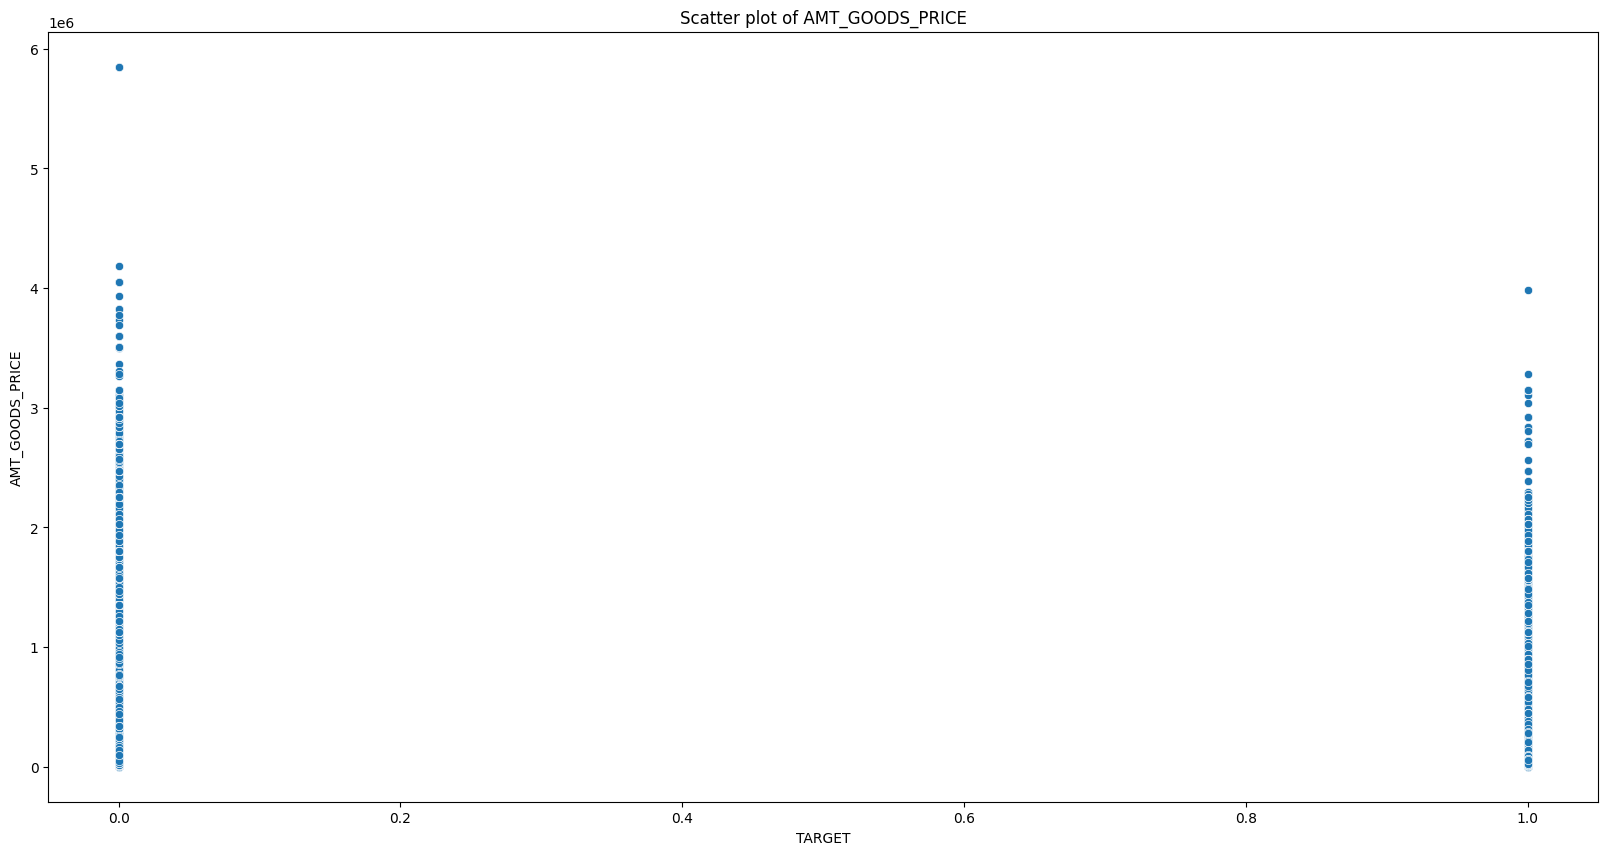

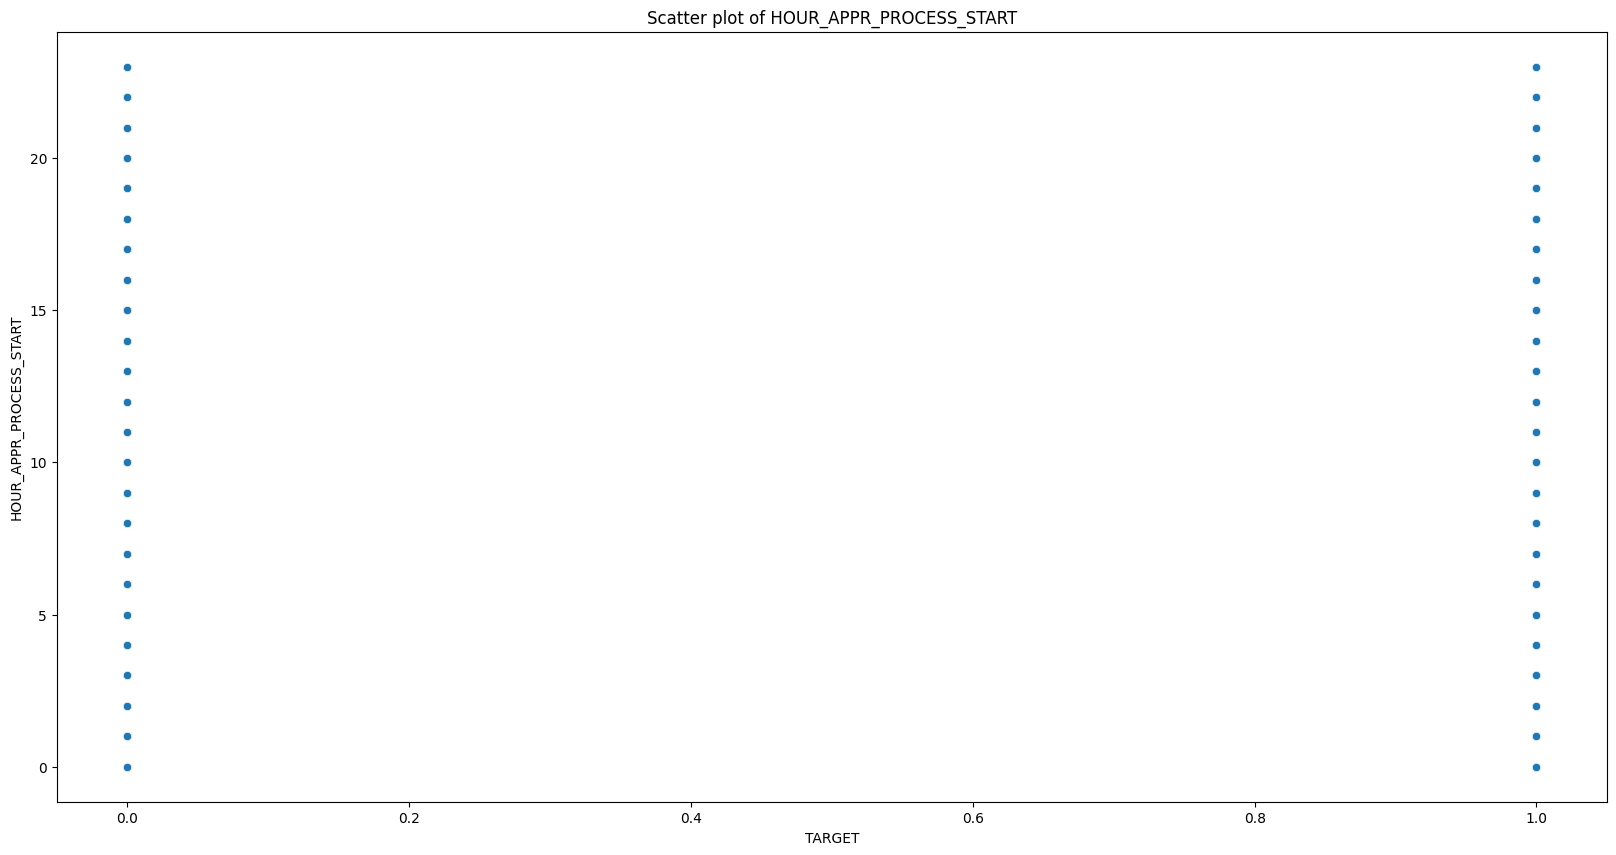

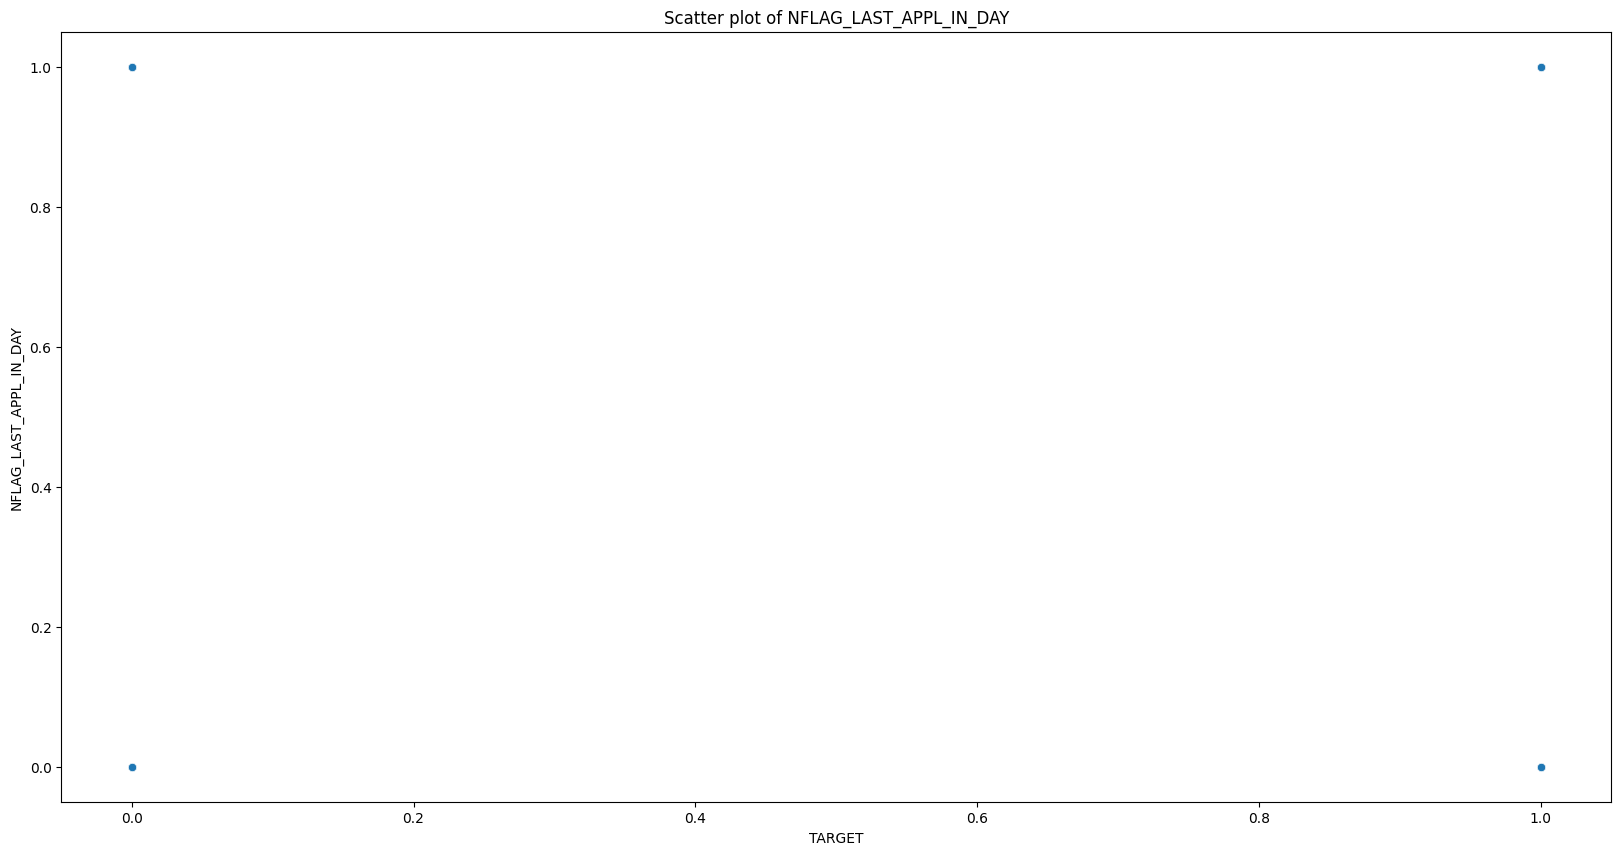

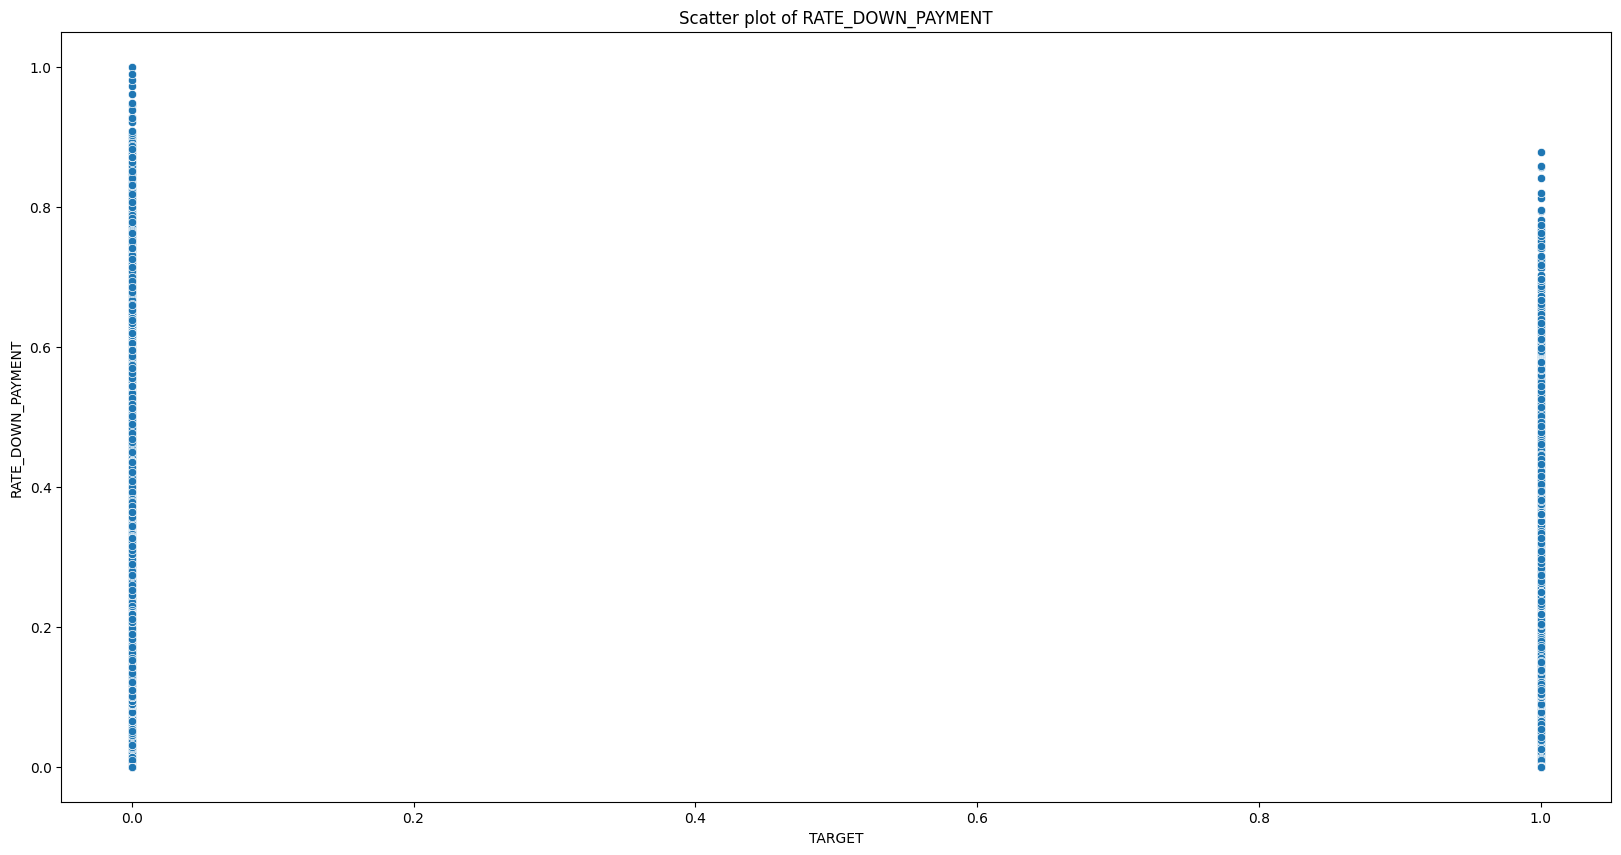

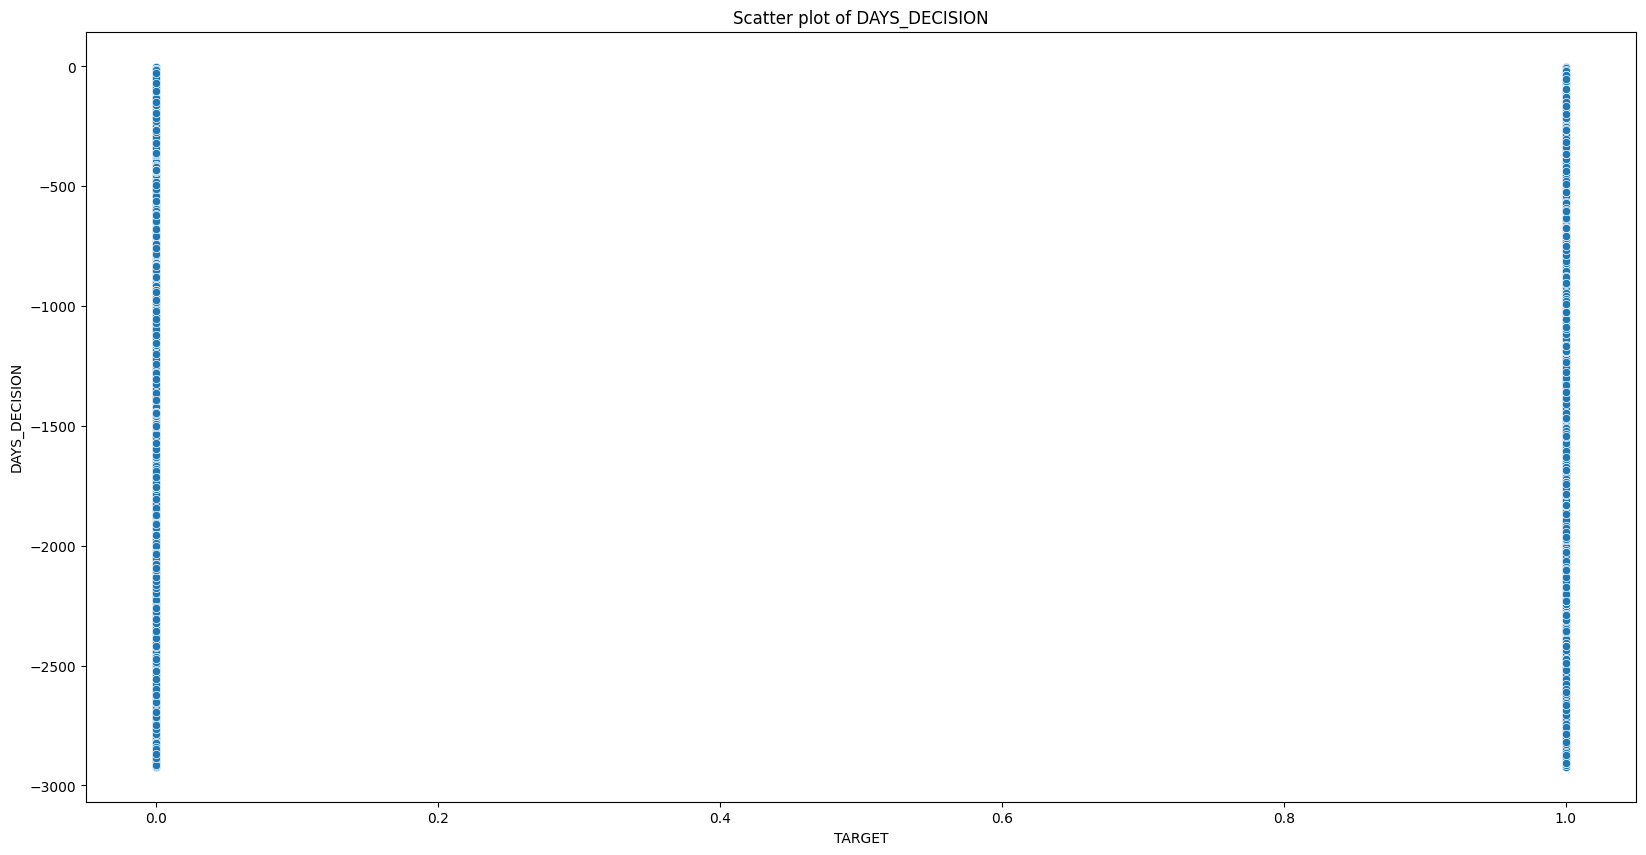

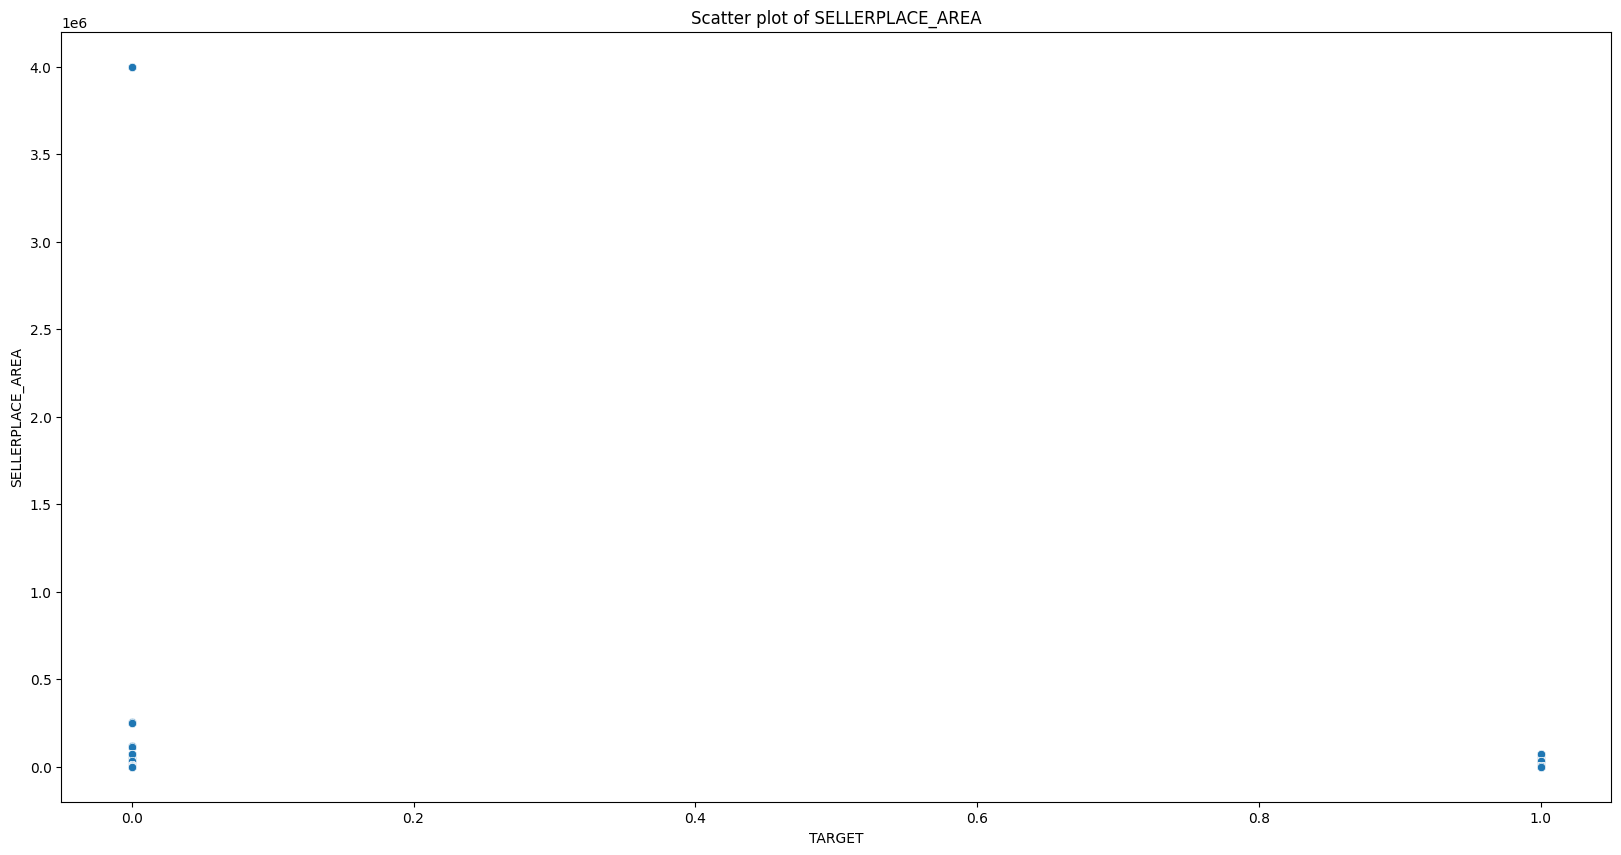

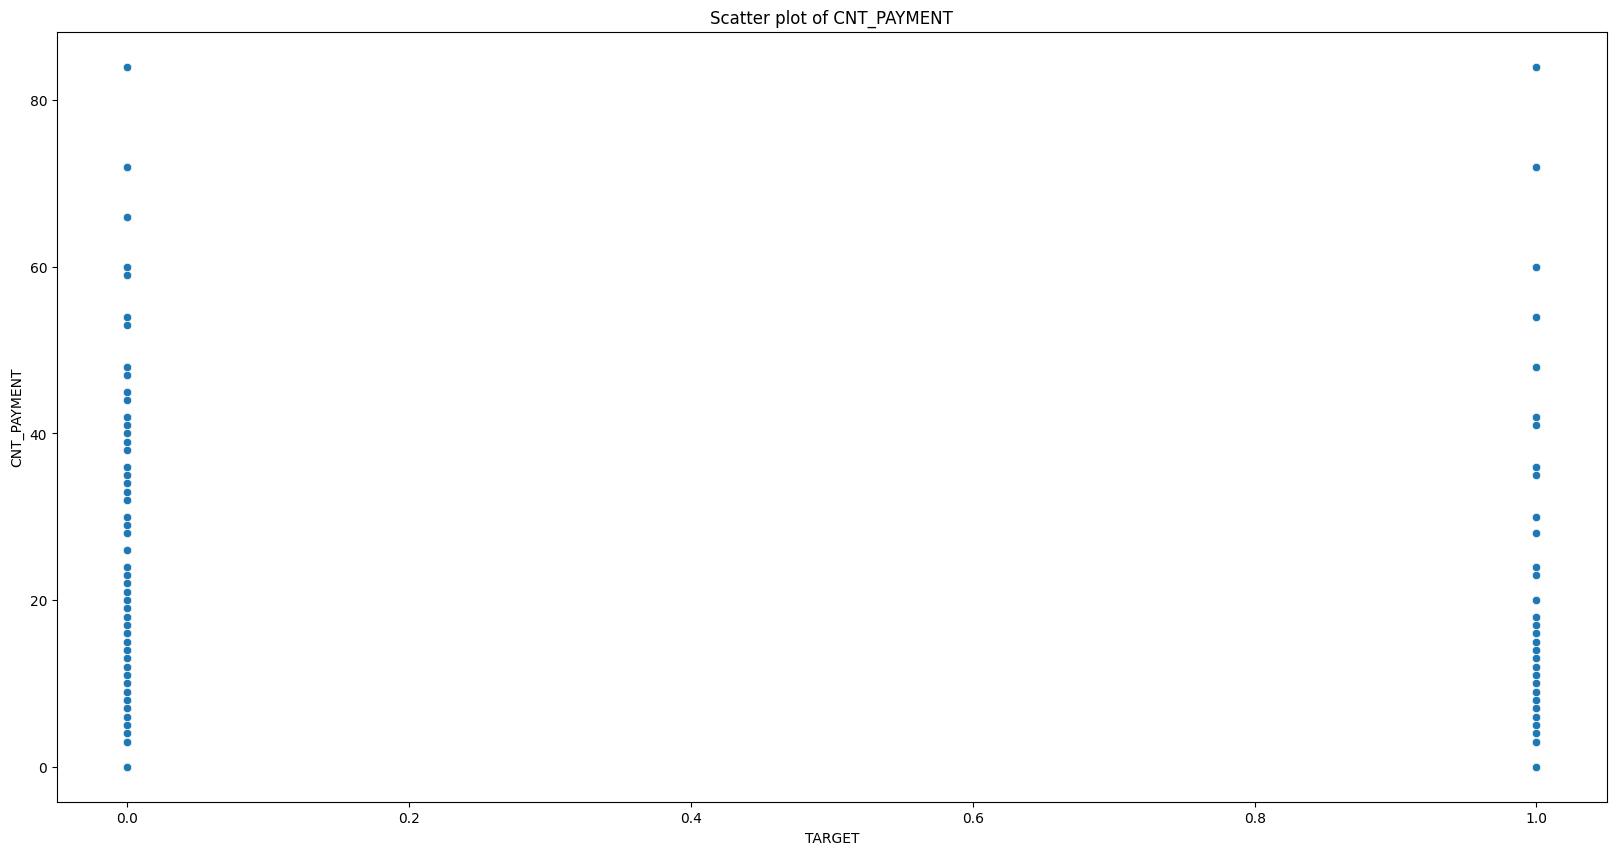

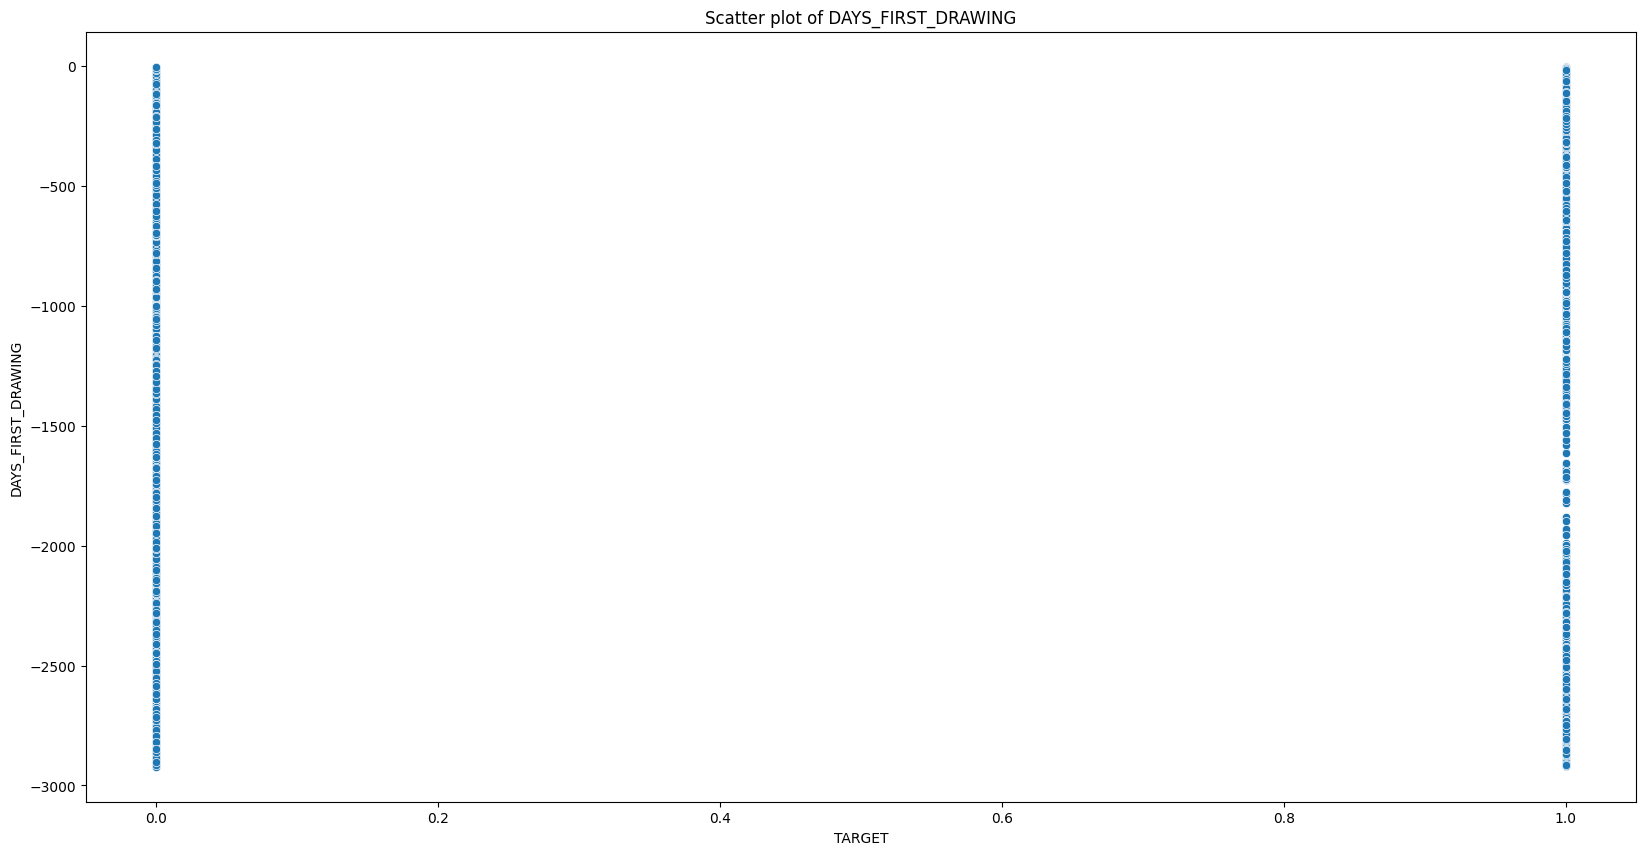

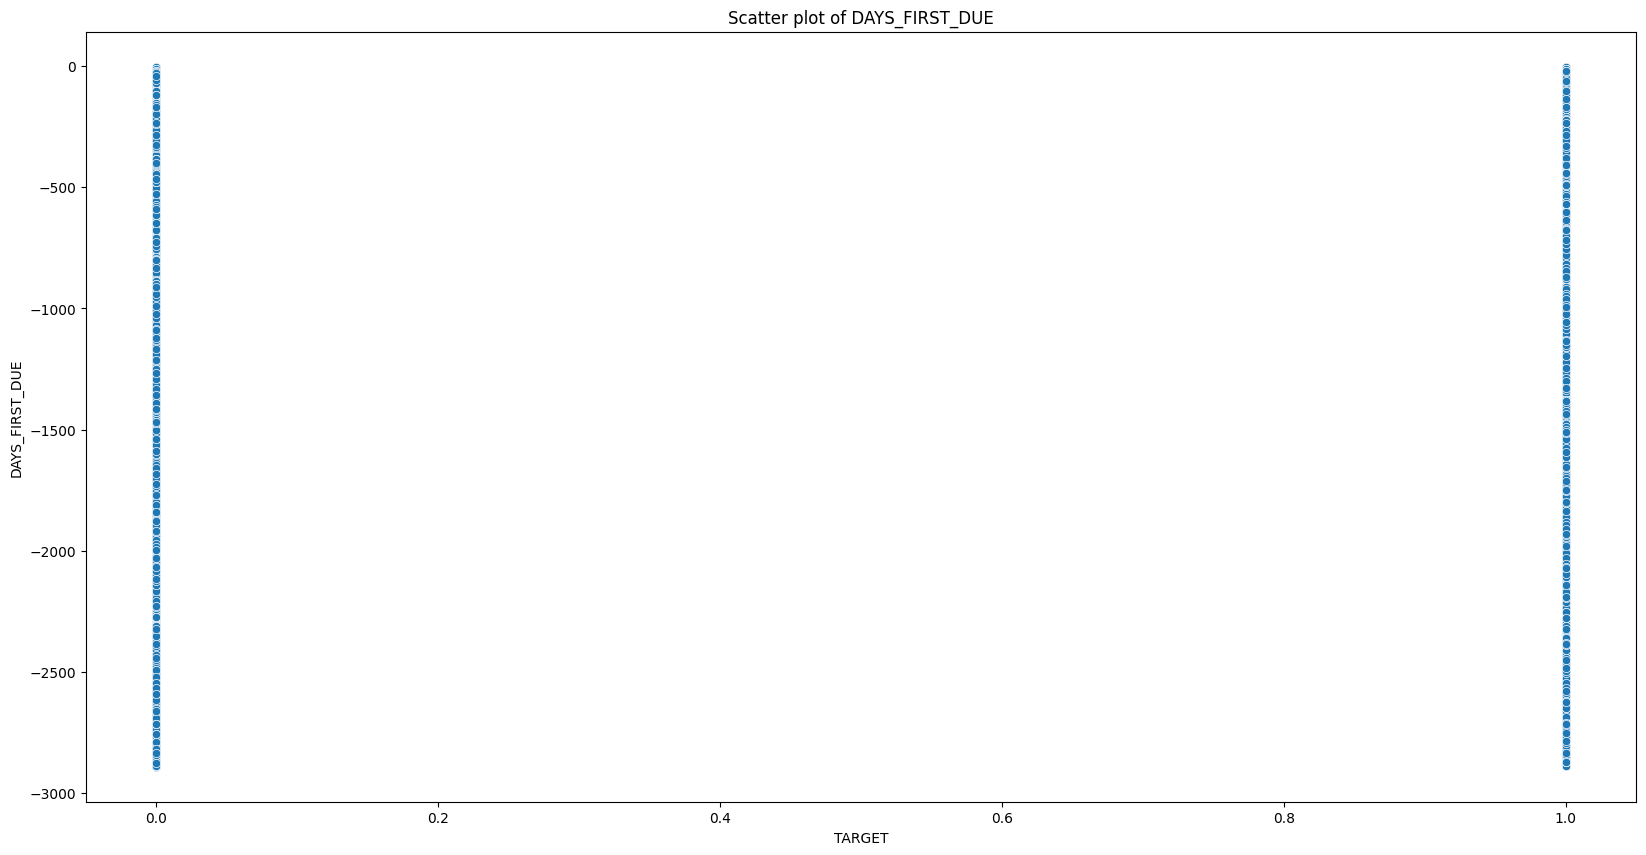

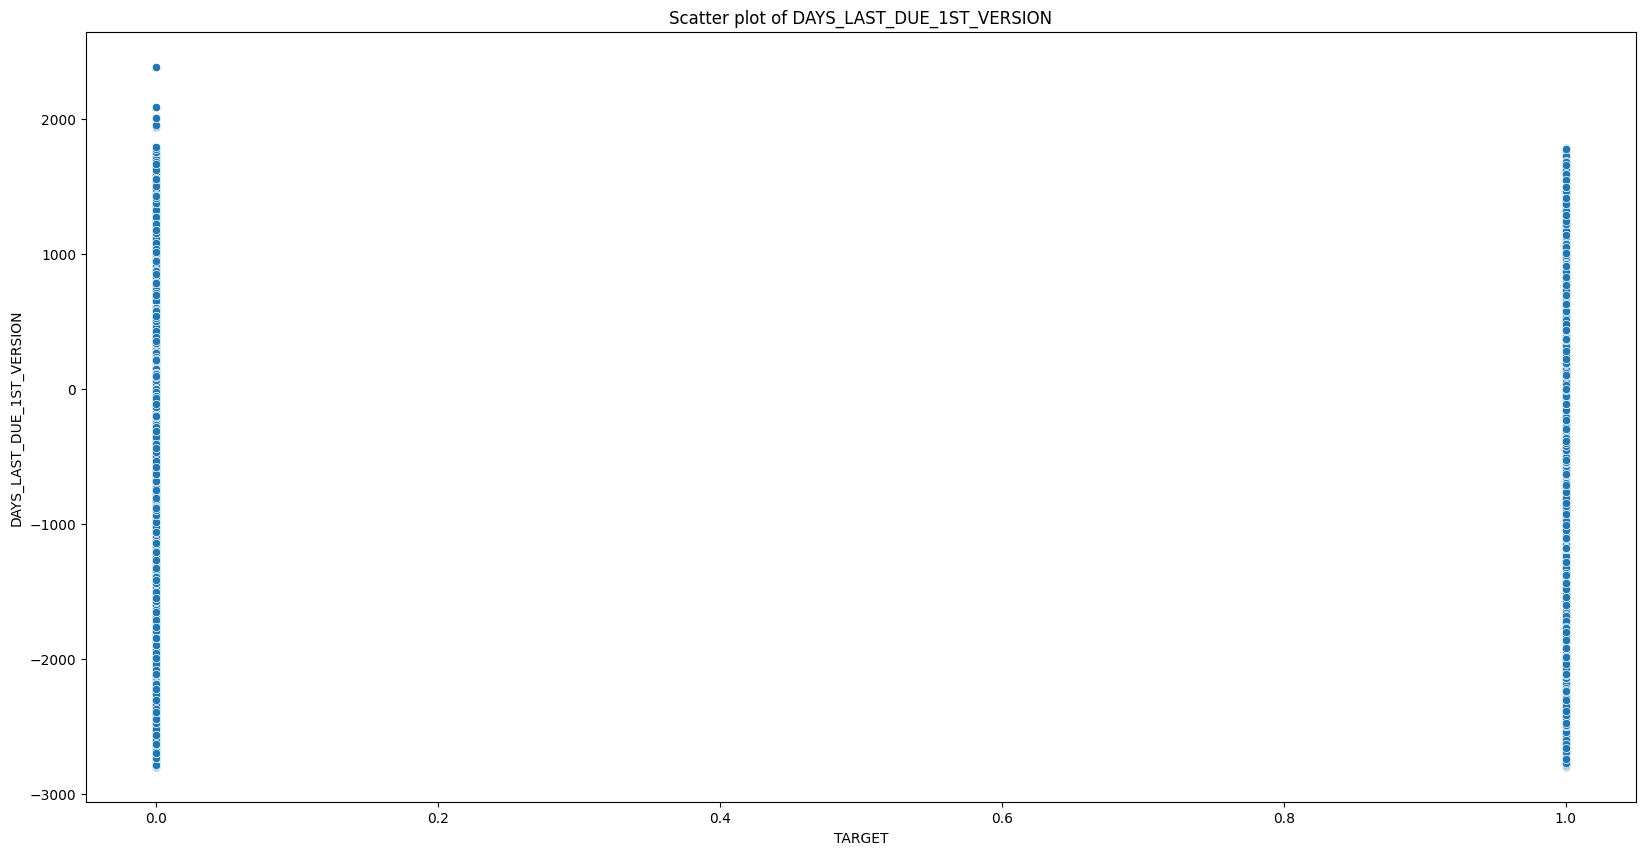

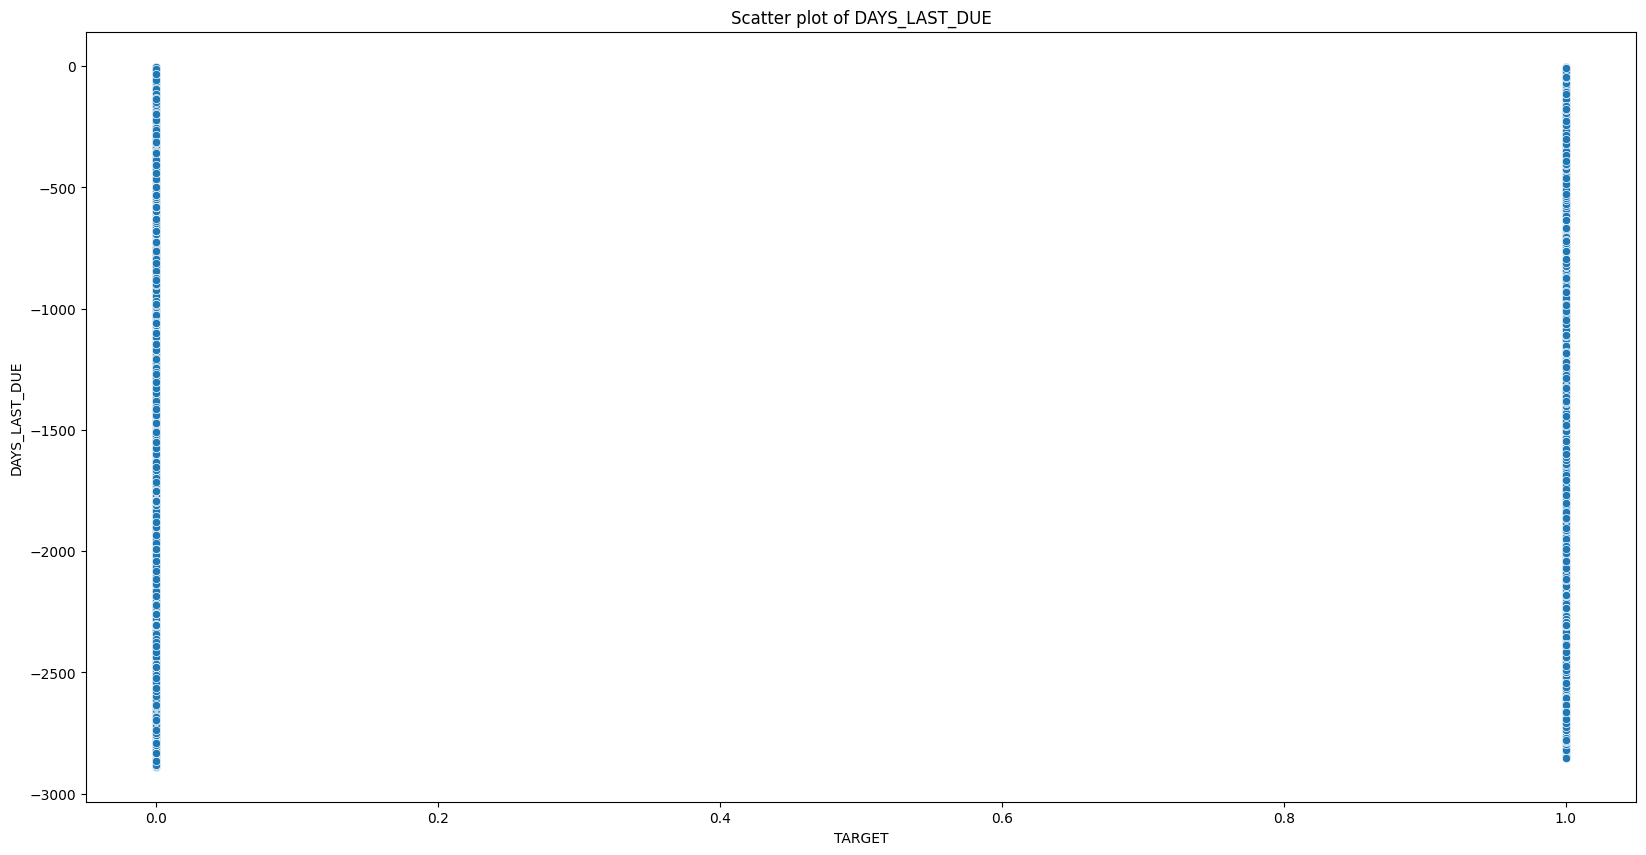

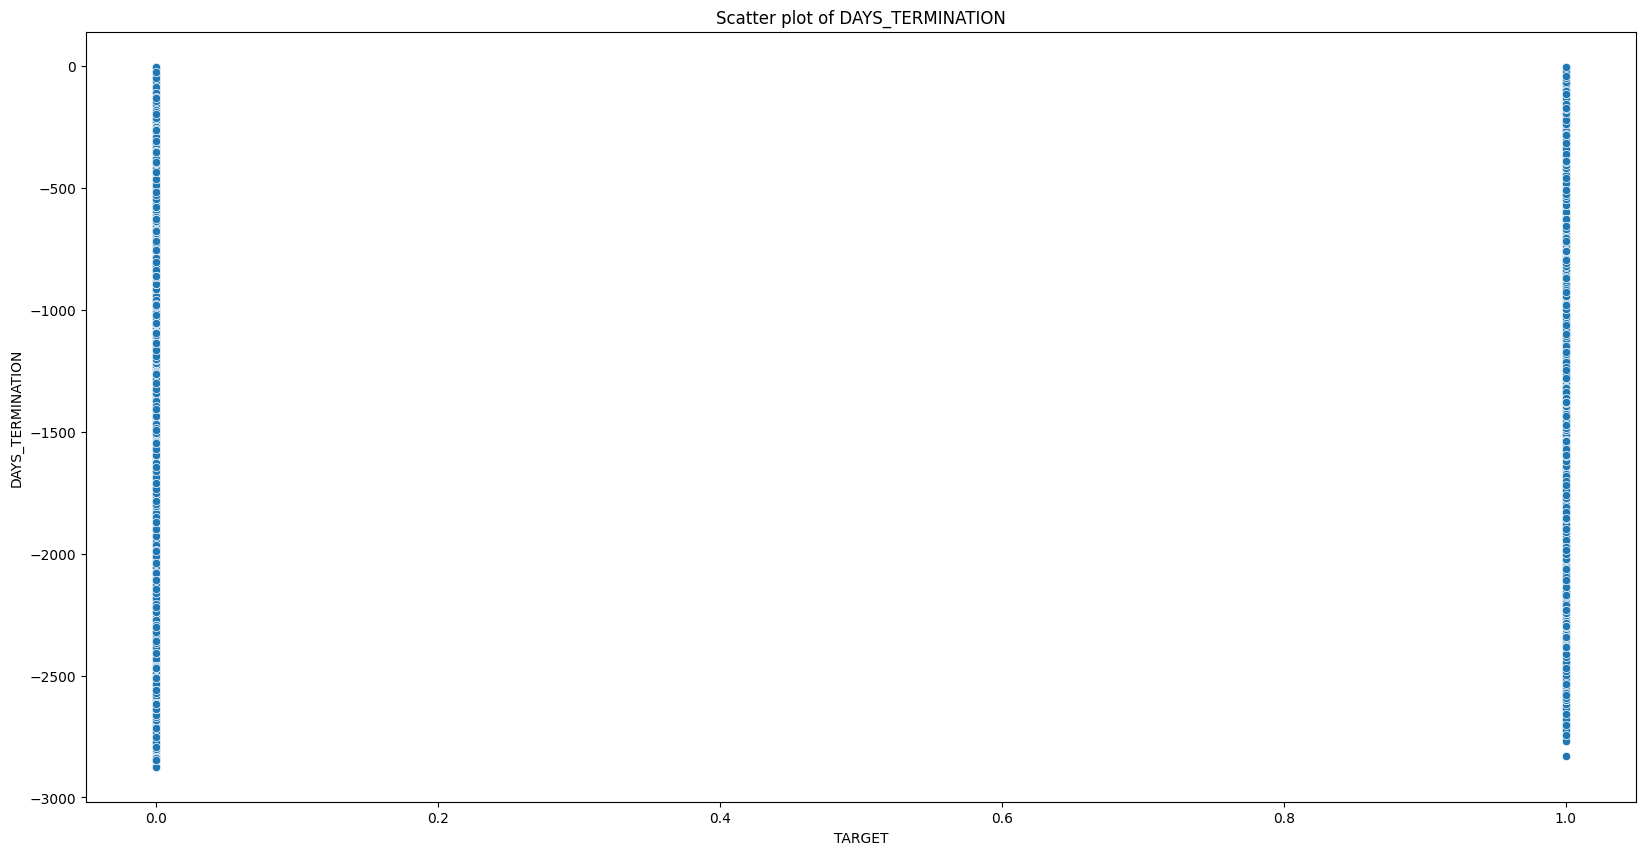

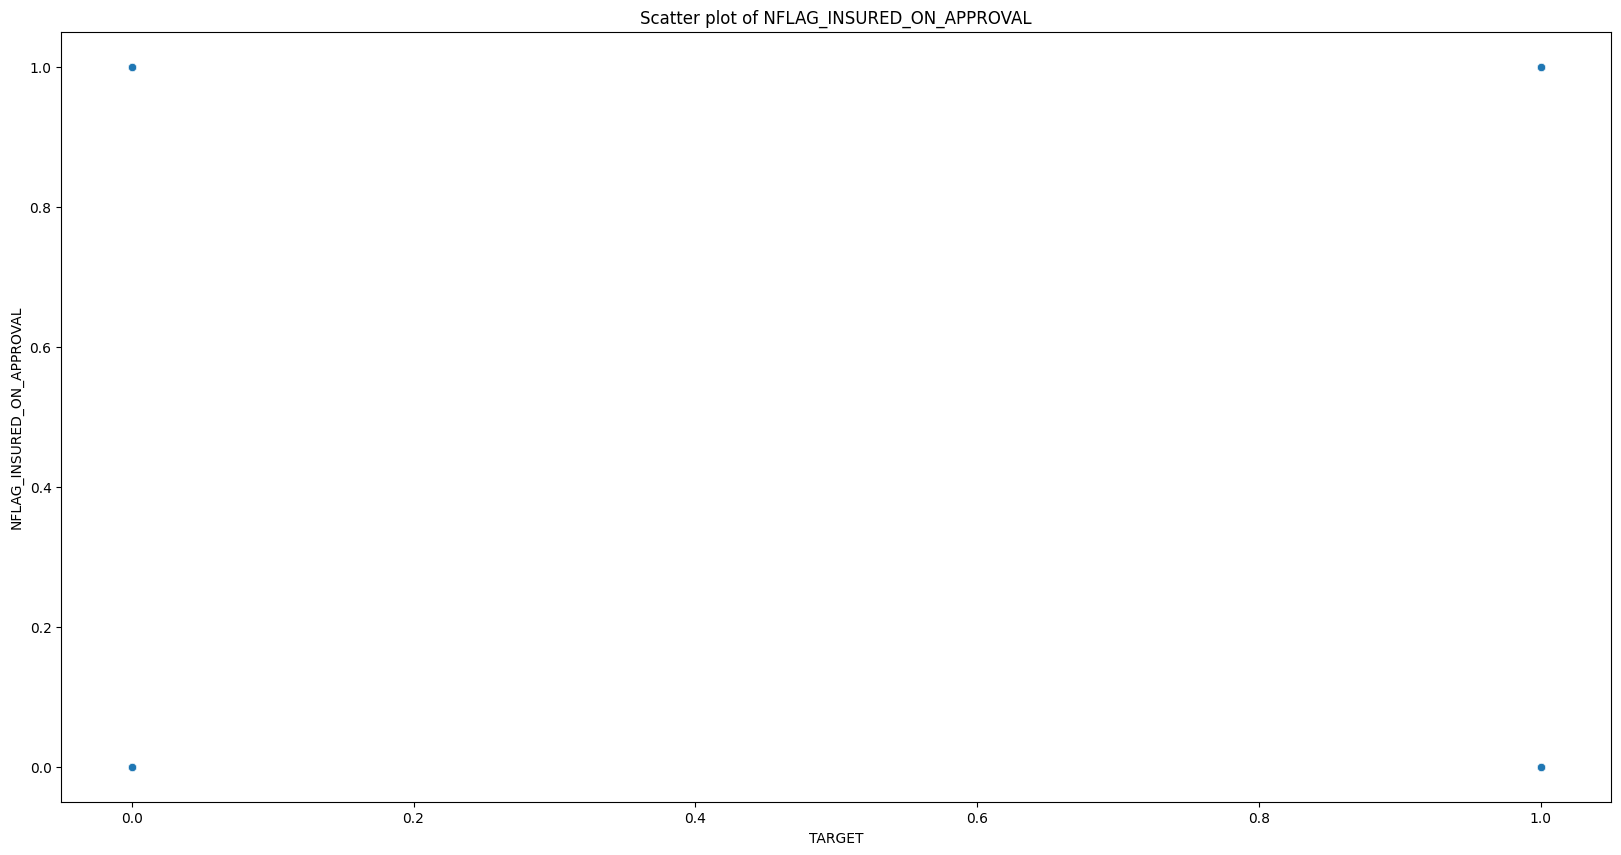

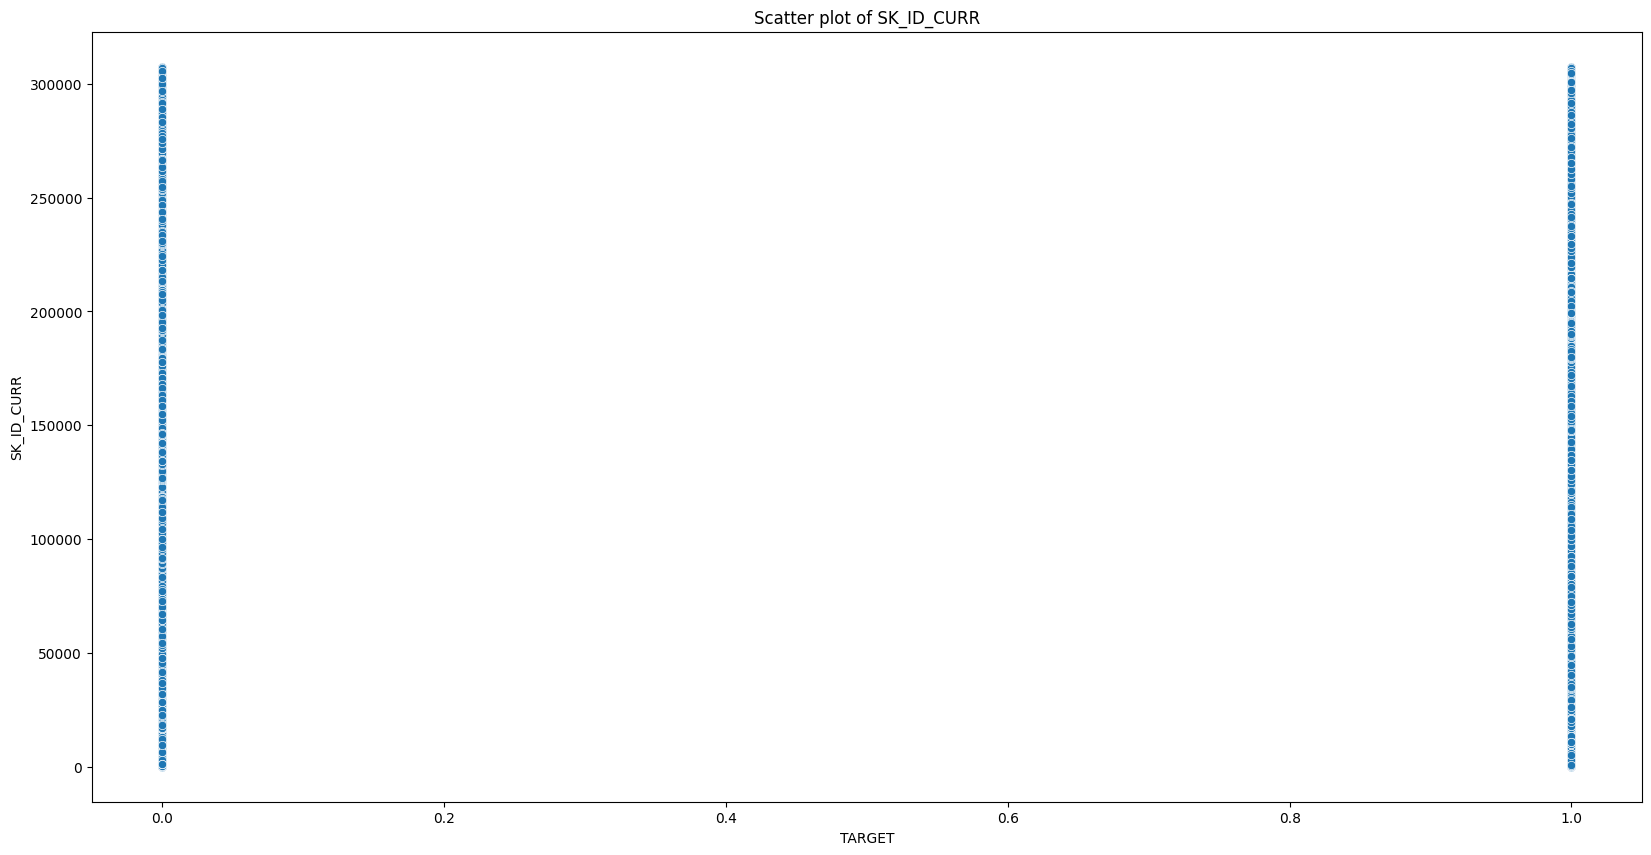

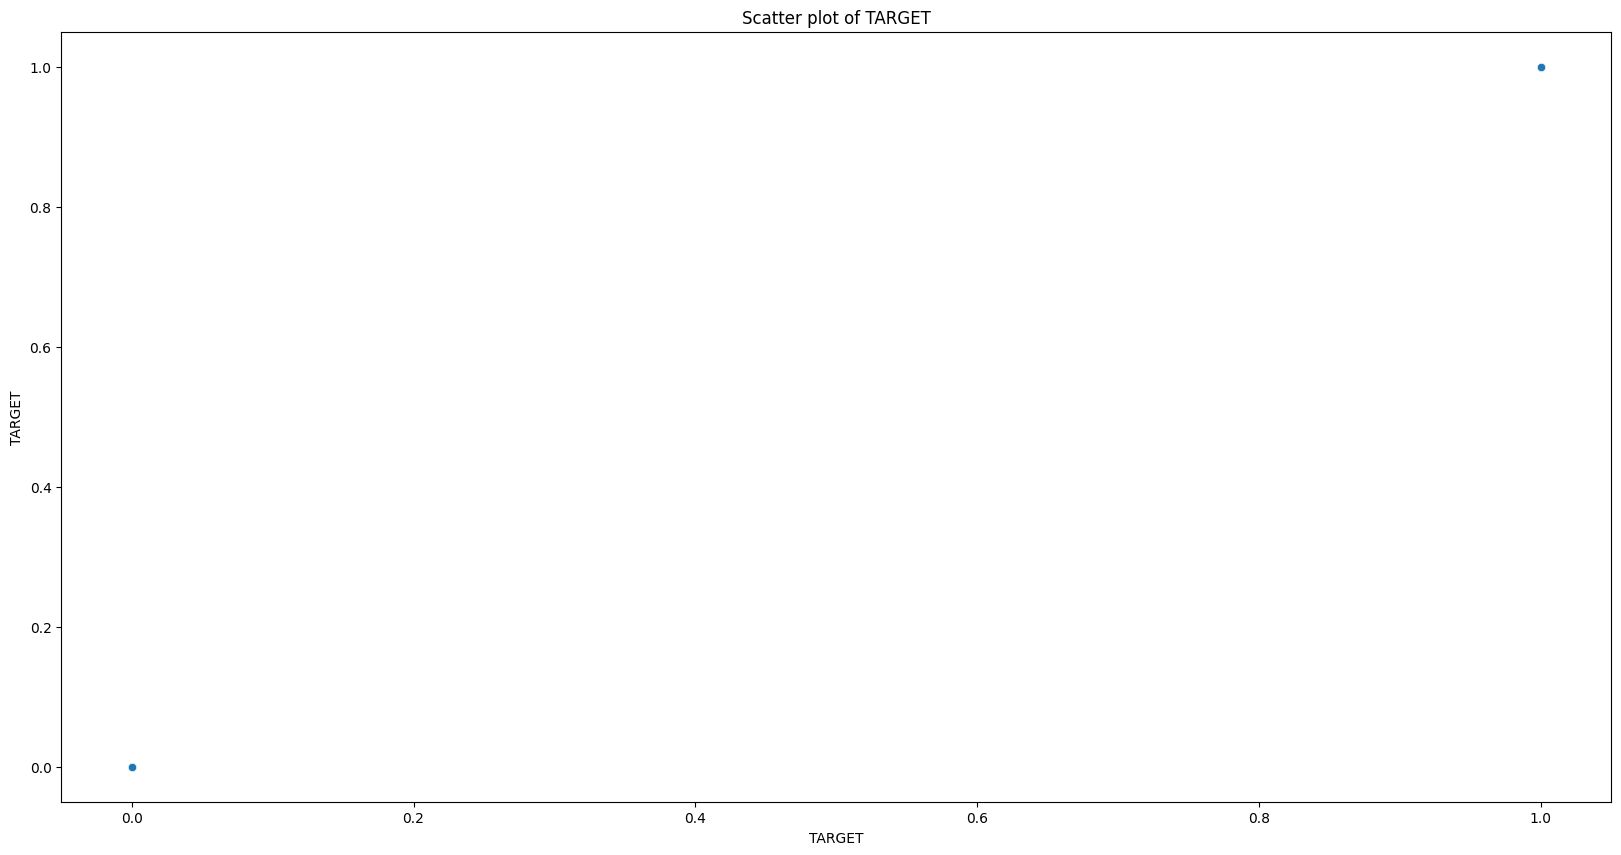

In [79]:
# Scatter plot của các biến numeric so với biến TARGET
def plot_scatter(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        plt.figure(figsize=(20,10))
        sns.scatterplot(y = df[col], x = df['TARGET'])
        plt.title('Scatter plot of {}'.format(col))
        plt.show()
plot_scatter(prev_merge)

1. NAME_CONTRACT_TYPE:
- Với khách hàng có khả năng vỡ nợ thì họ có xu hướng vay nhiều tiền nhiều hơn, ngược lại khách hàng có khả năng trả nợ thành công thì vay tiêu dùng
2. WEEKDAY_APPR_PROCESS_START:
- Các khoản vay trong các ngày trong tuần của cả 2 loại khách hàng gần như giống nhau, không có tính quyết định đến dự đoán
3. NAME_CLIENT_TYPE:
- Cả 2 loại khách hàng đều là khách hàng 'trung thành': thường là vay lại, đã qua sử dụng dịch vụ vay ở home credit
4. NAME_PAYMENT_TYPE:
- Cả 2 loại khách hàng đều là khách hàng đã từng vay ở home credit, là khách hàng trung thành.
5. CODE_REJECT_REASON:
- HC, LIMIT, SCO là 3 lý do bị reject khoản vay nhiều nhất ở cả 2 loại khách hàng
6. 

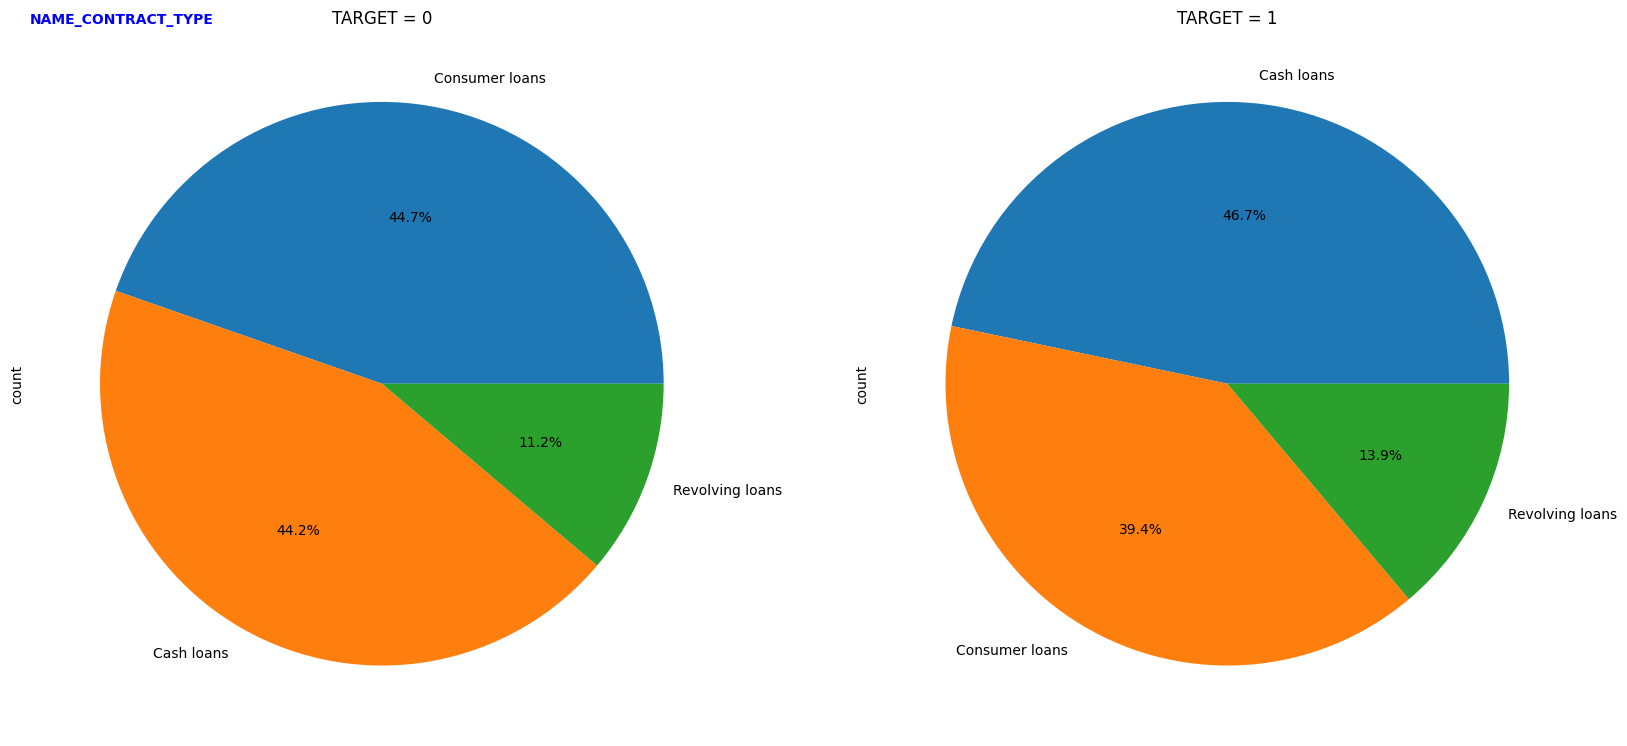

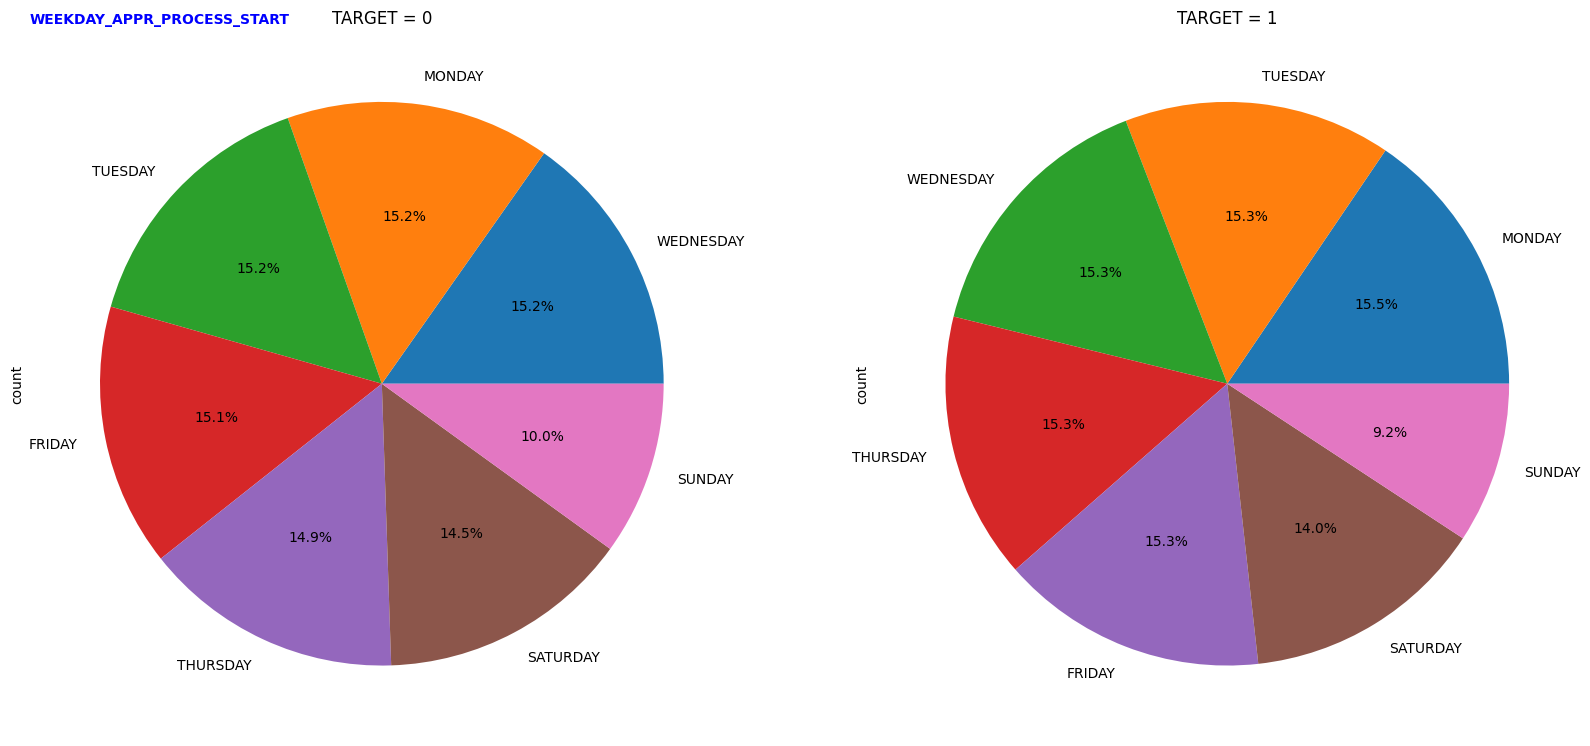

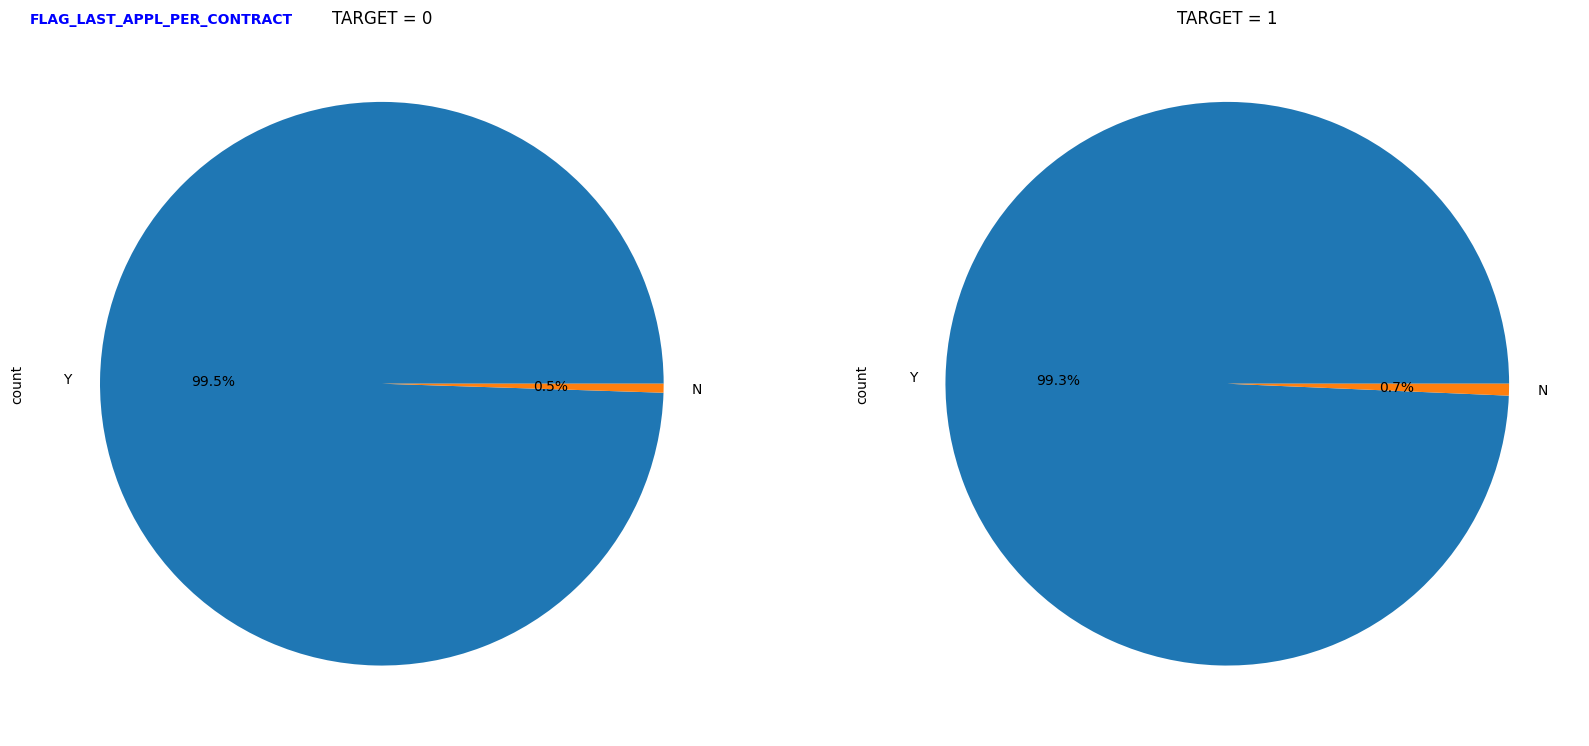

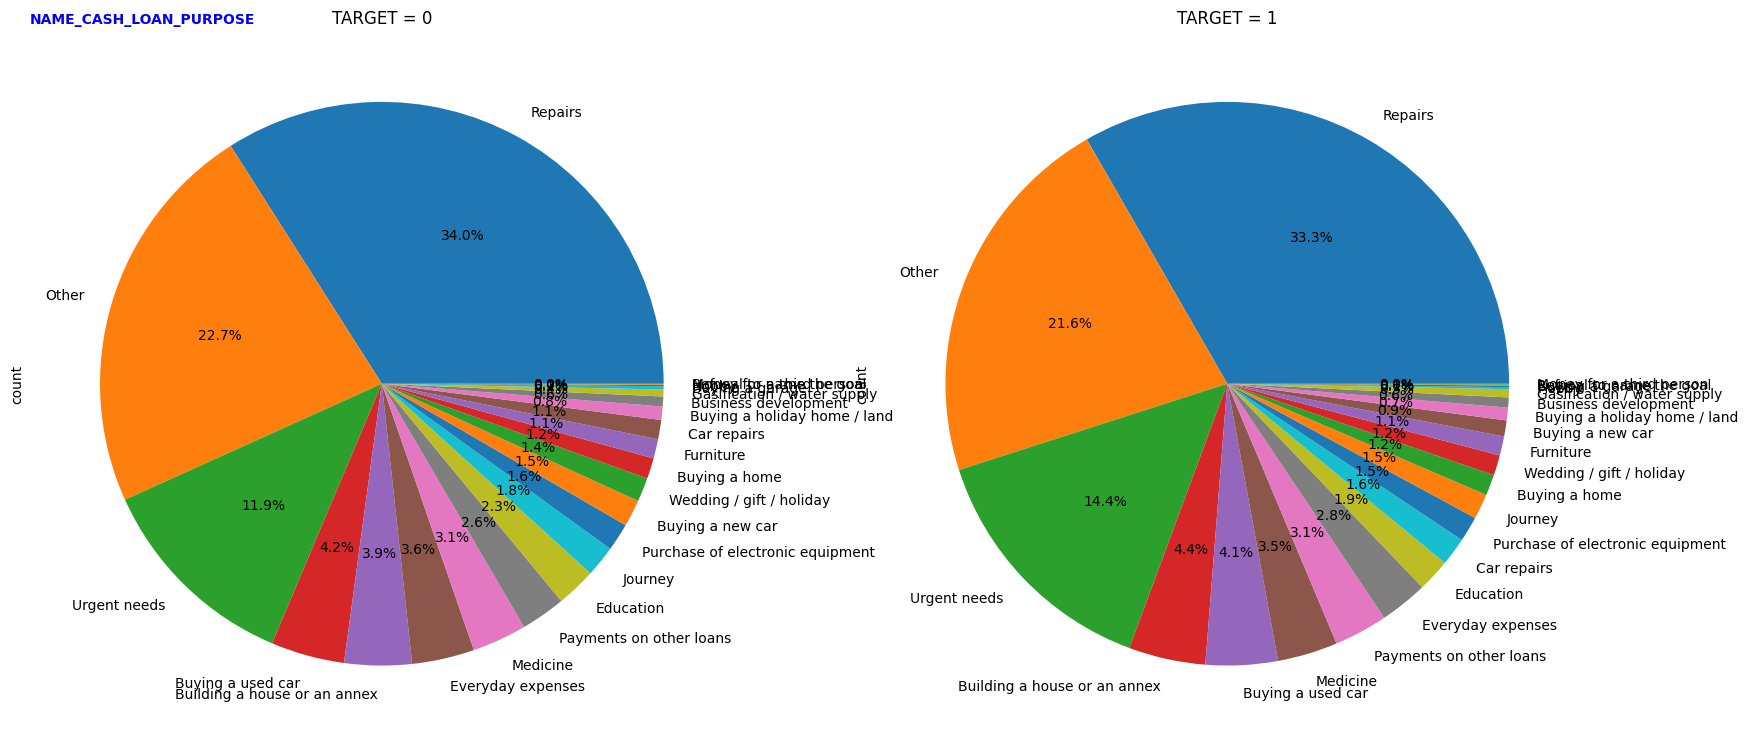

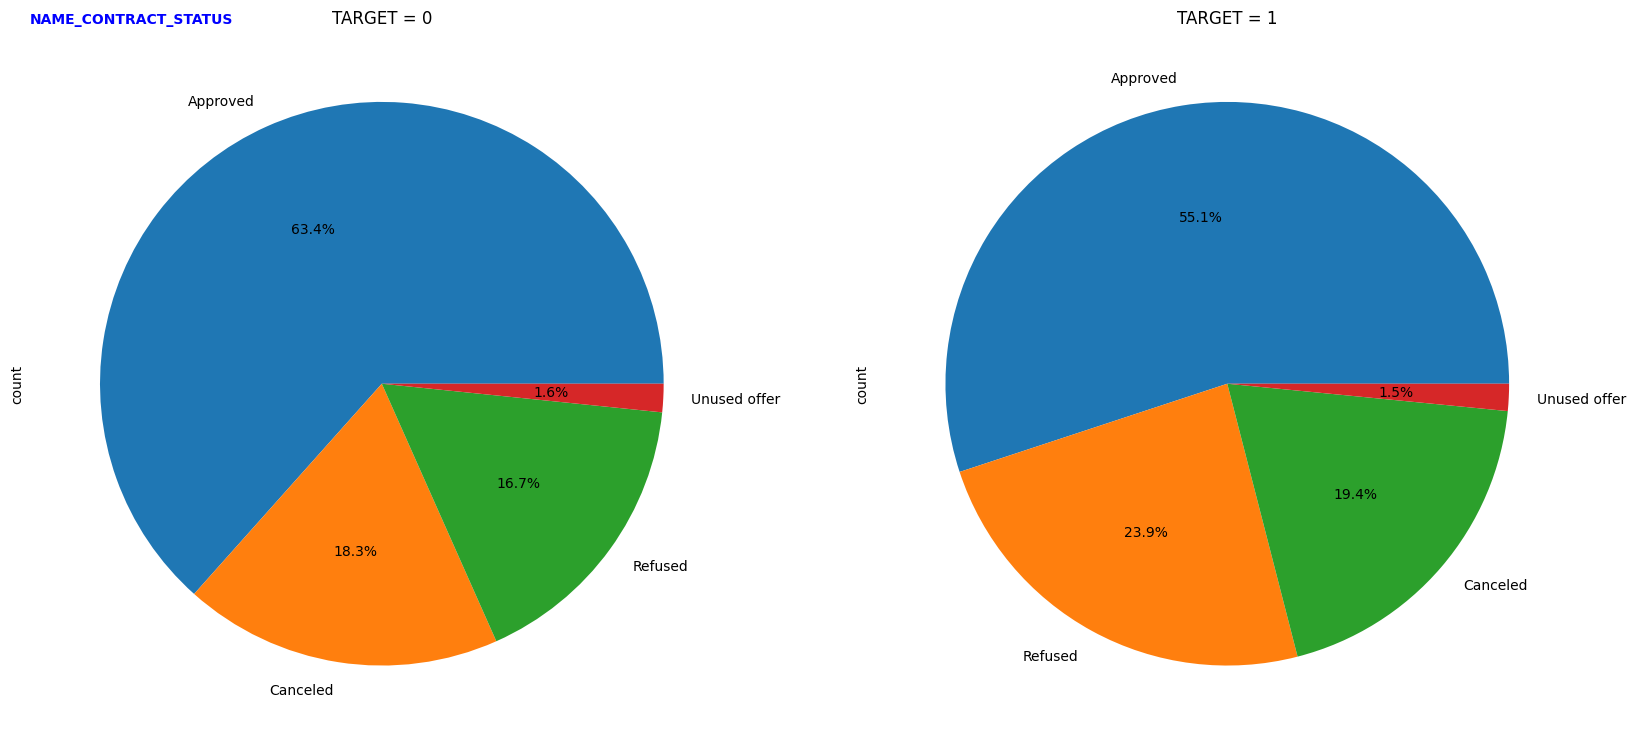

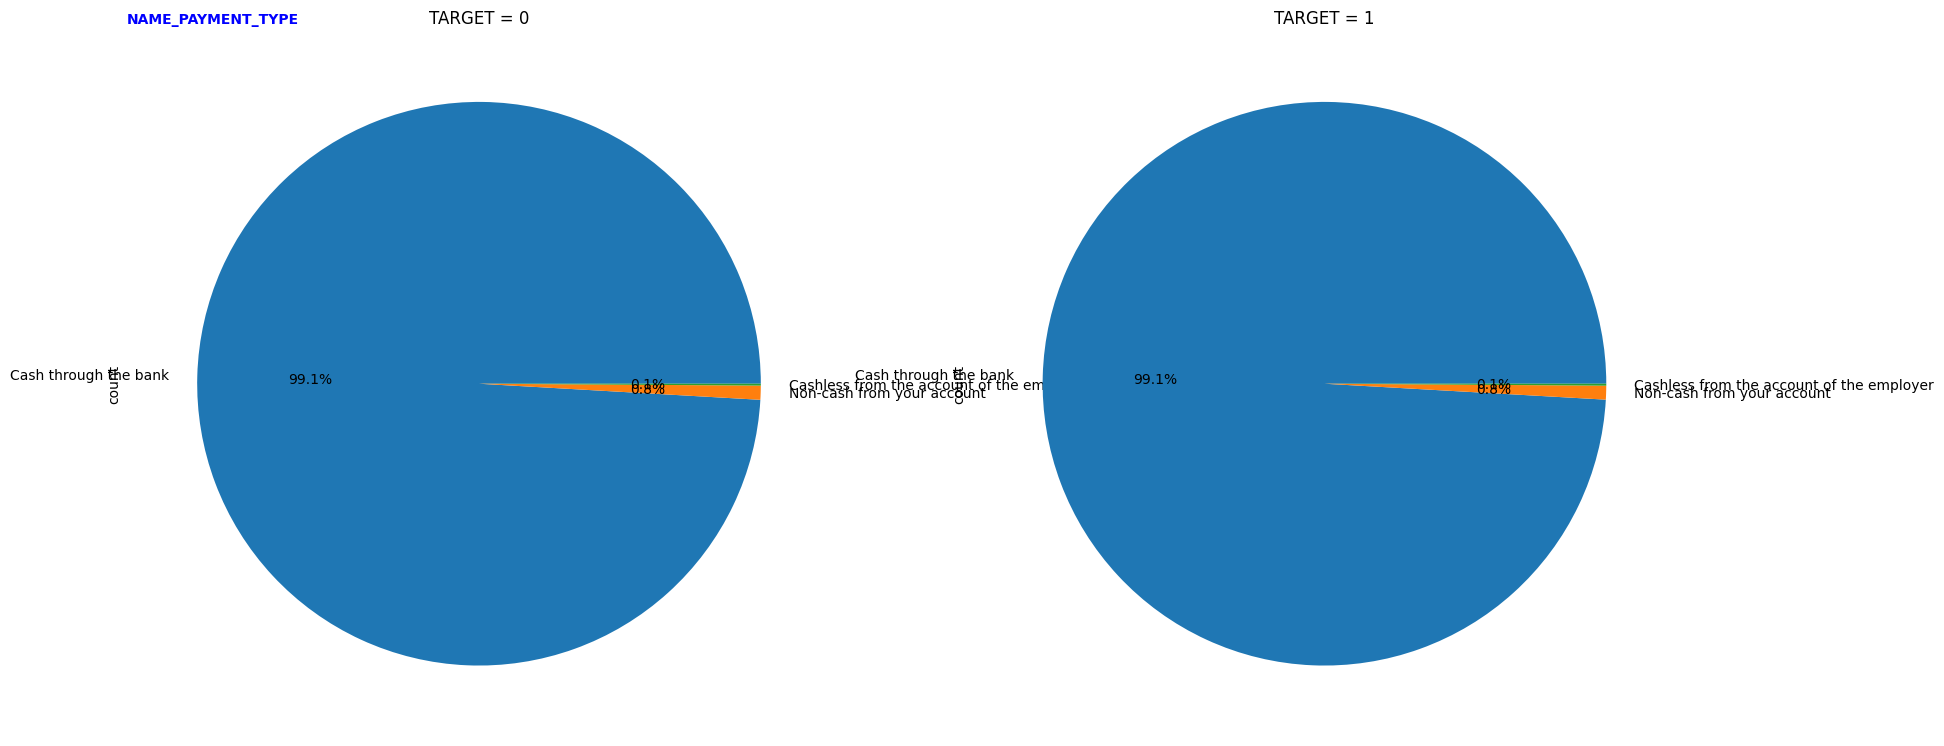

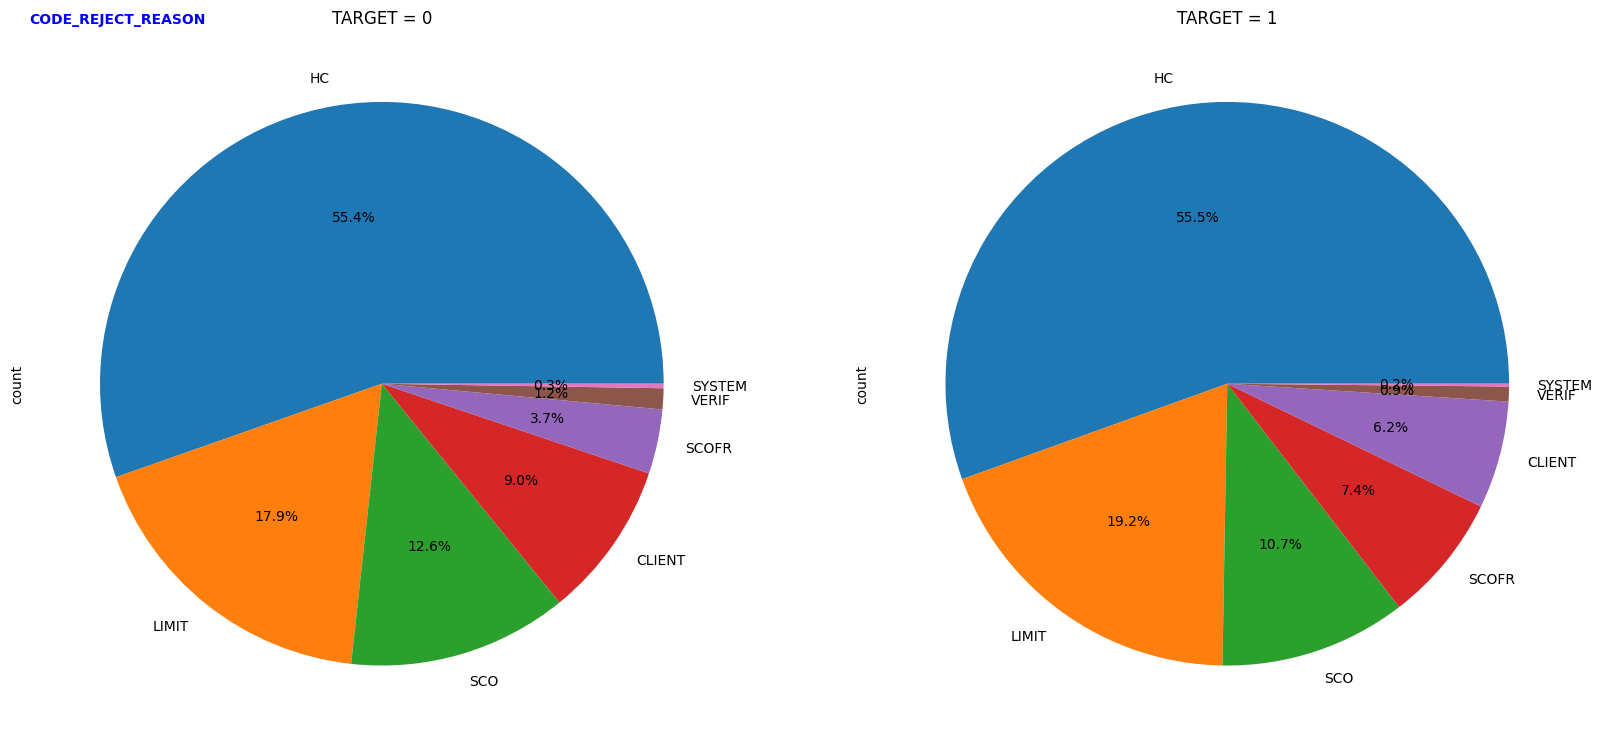

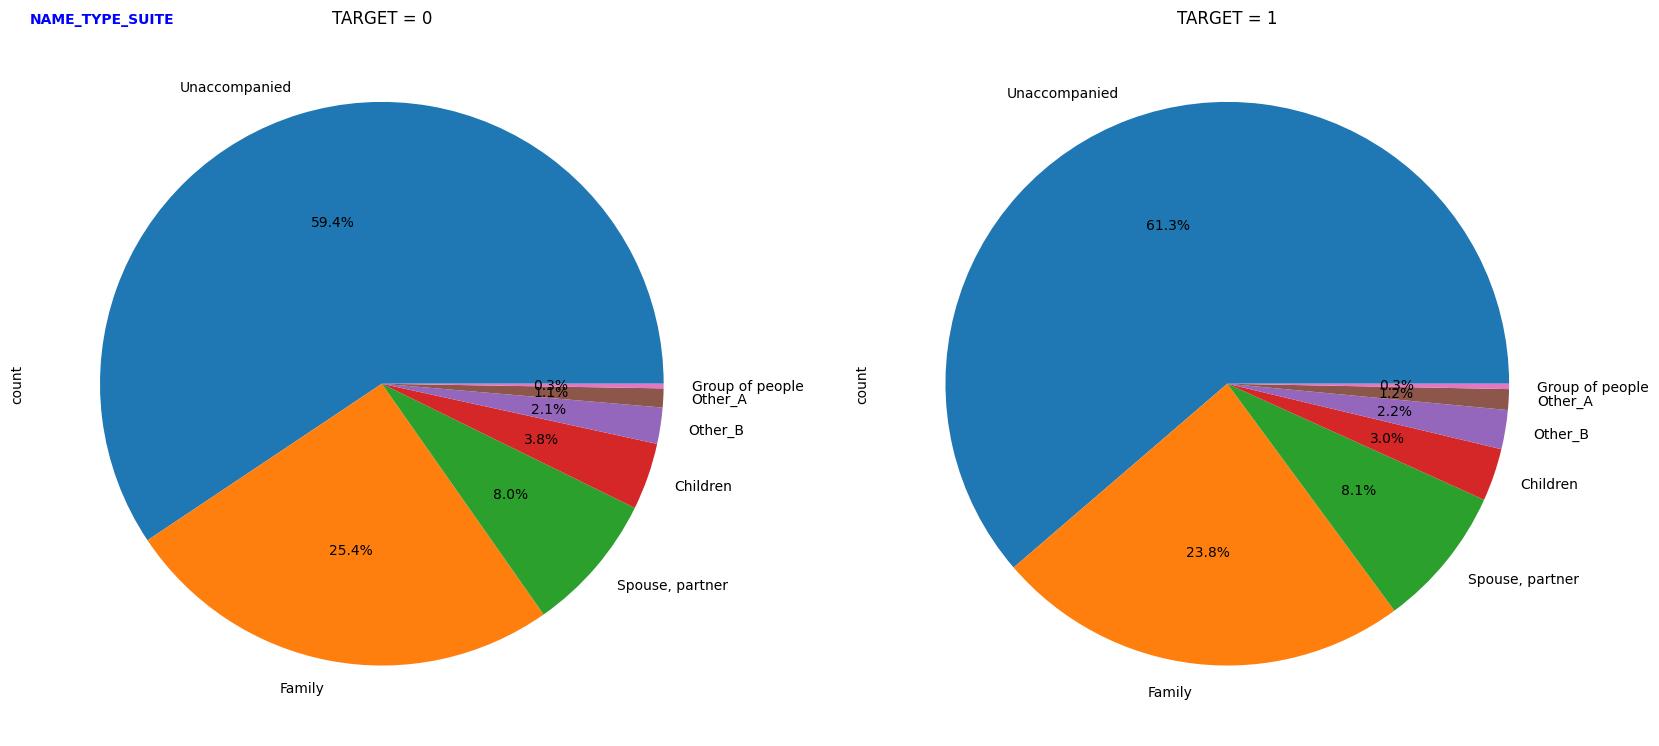

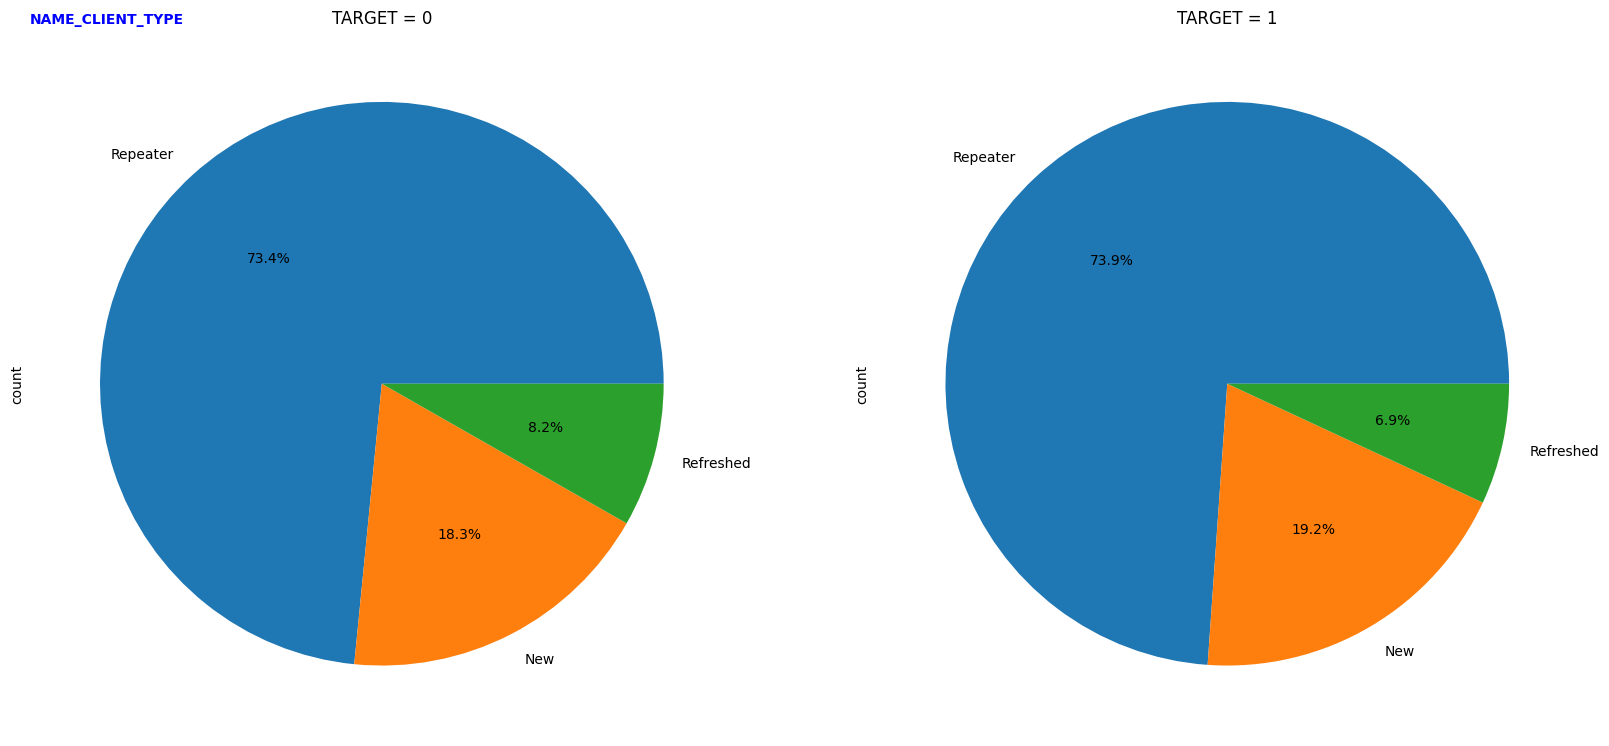

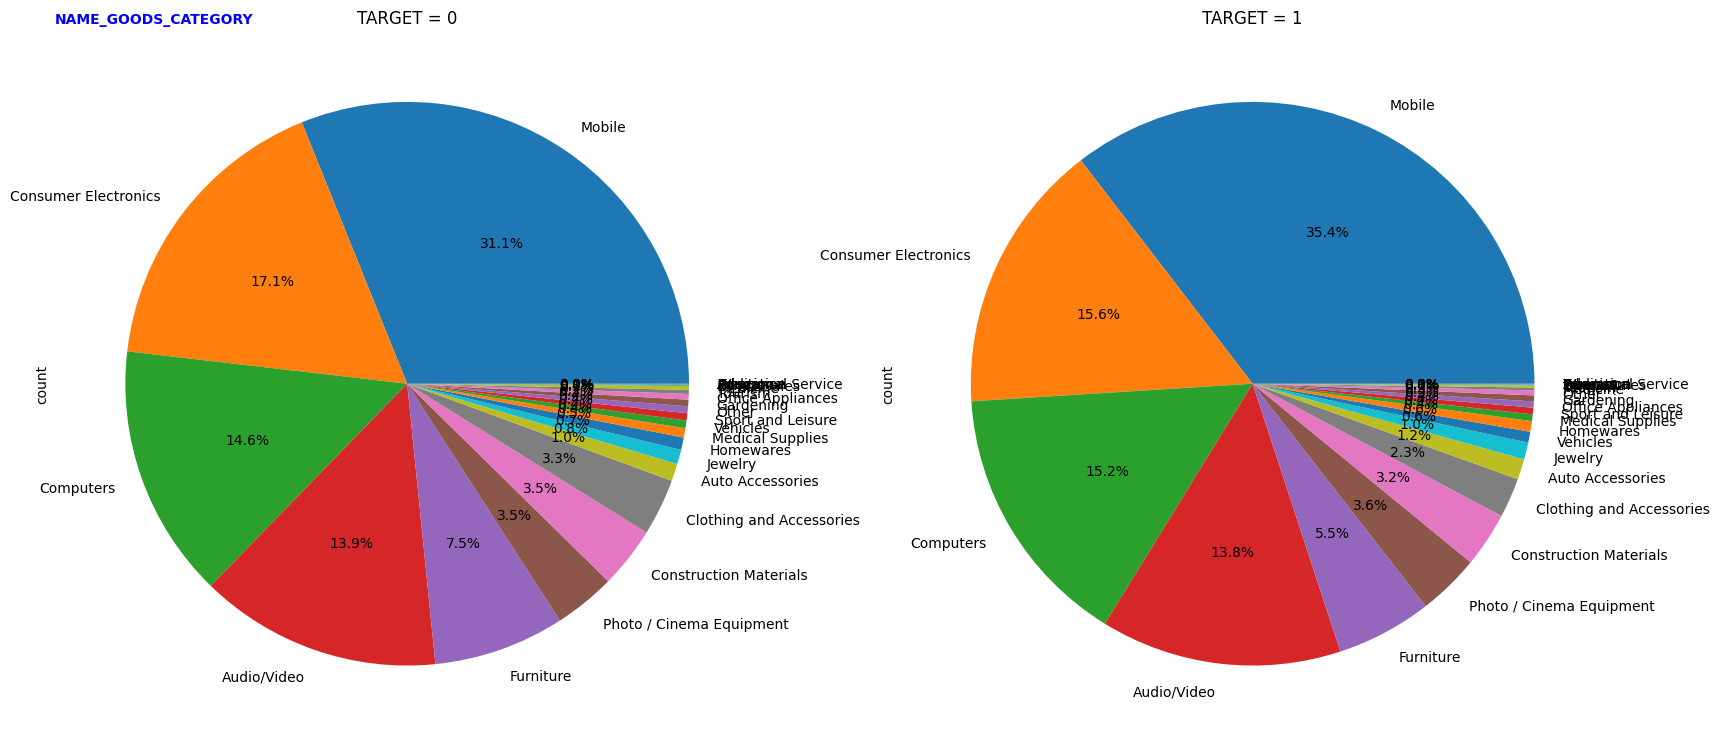

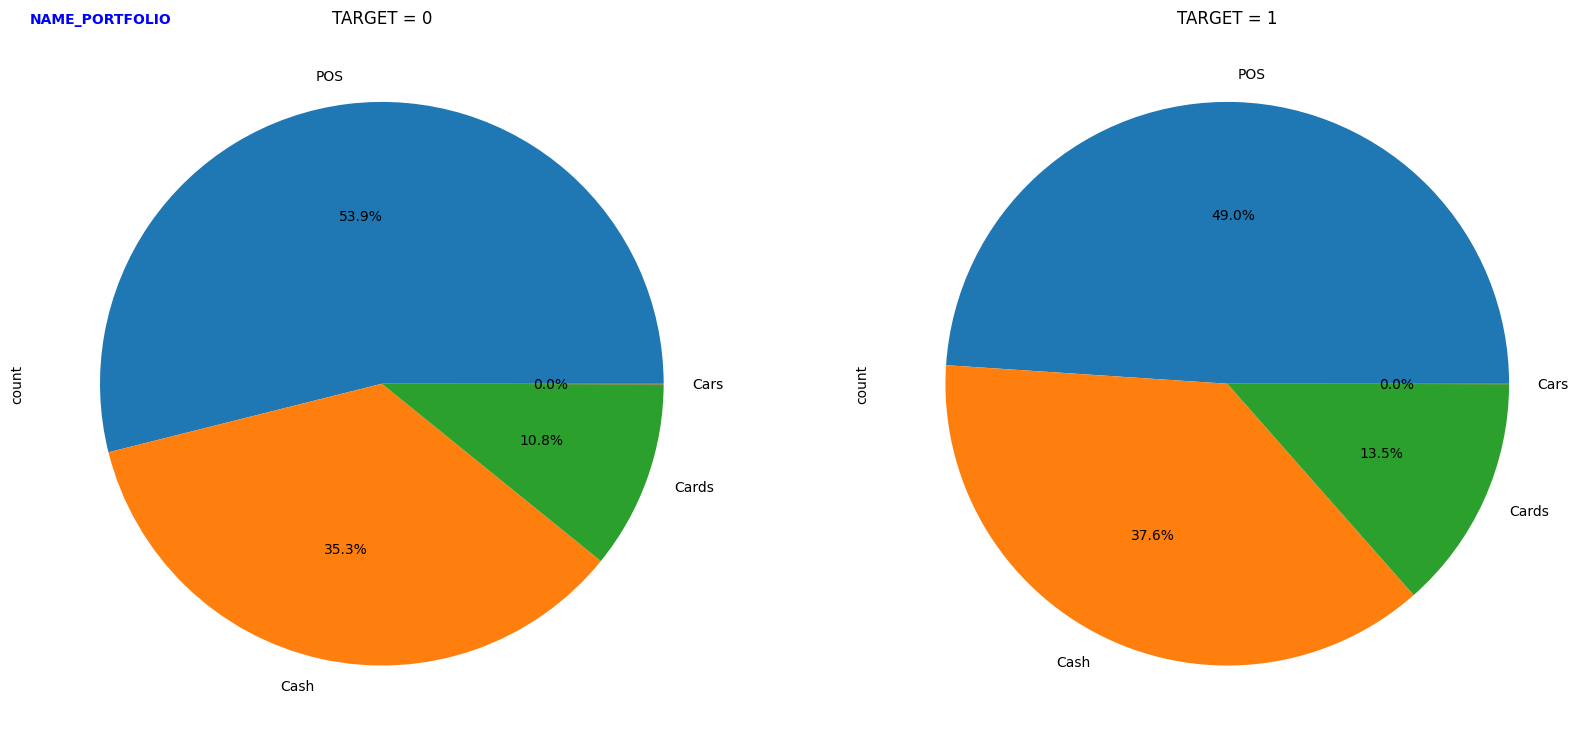

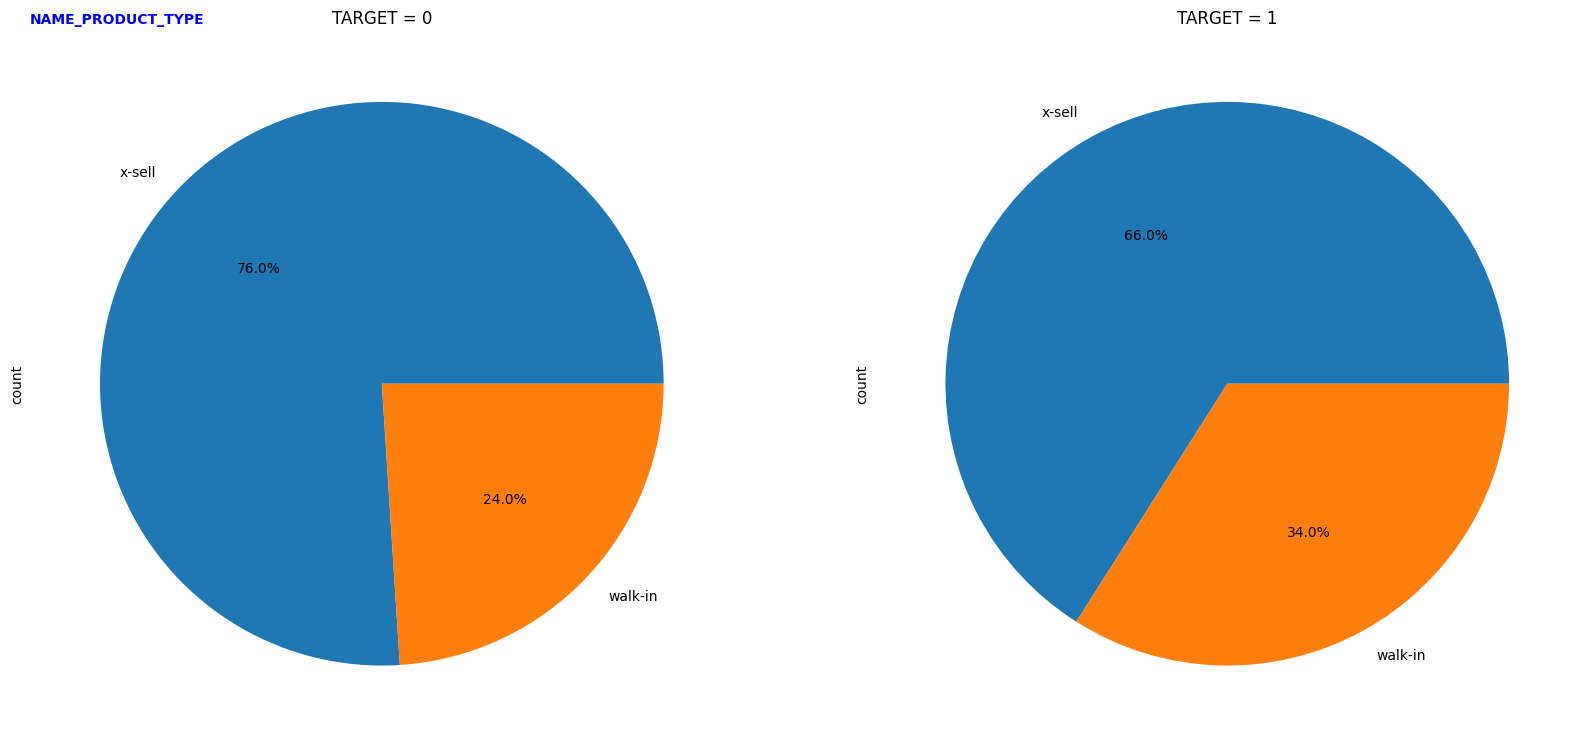

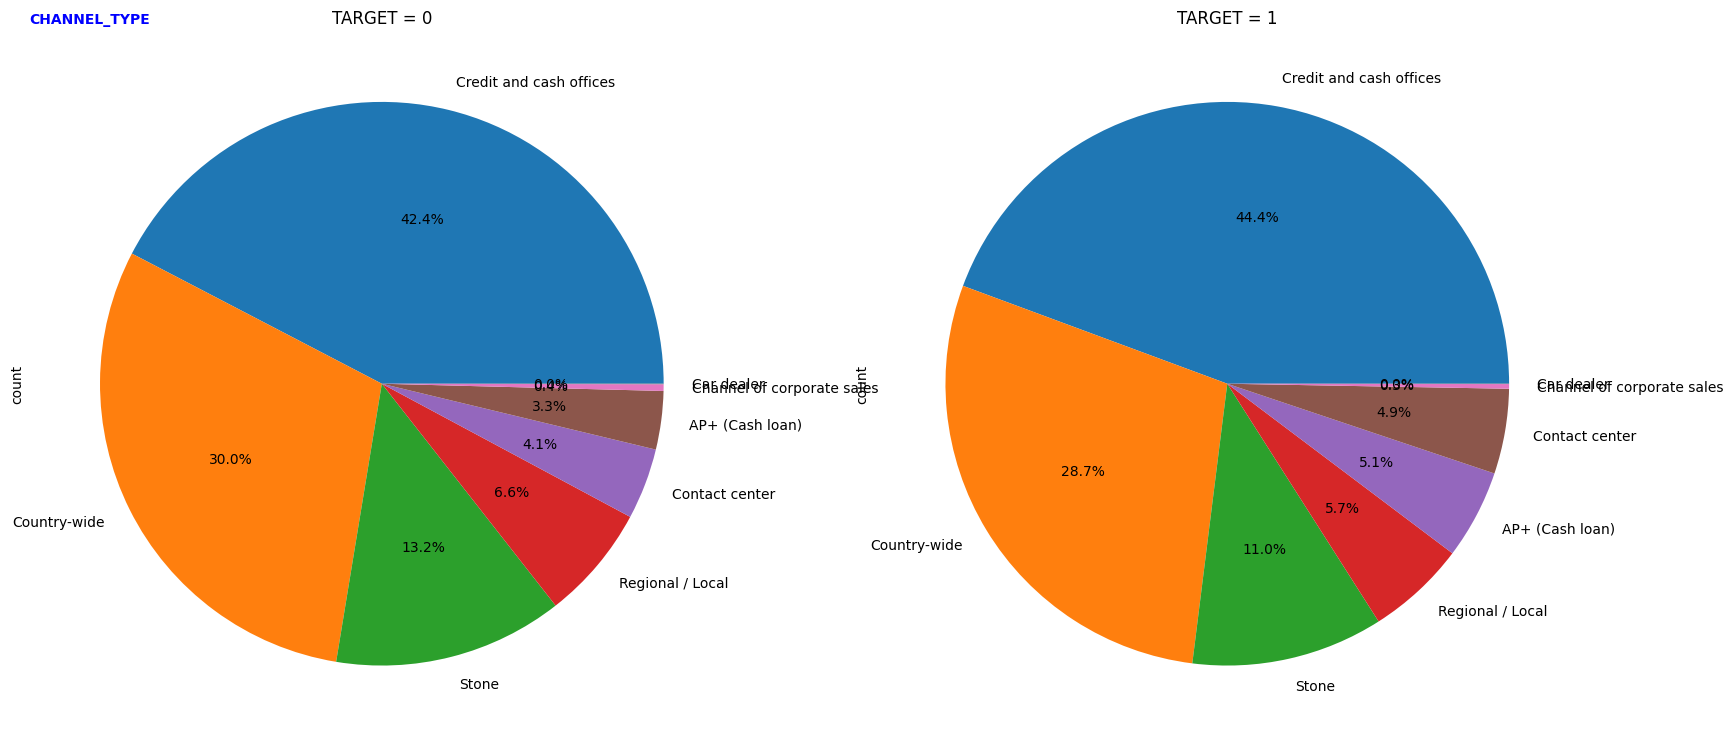

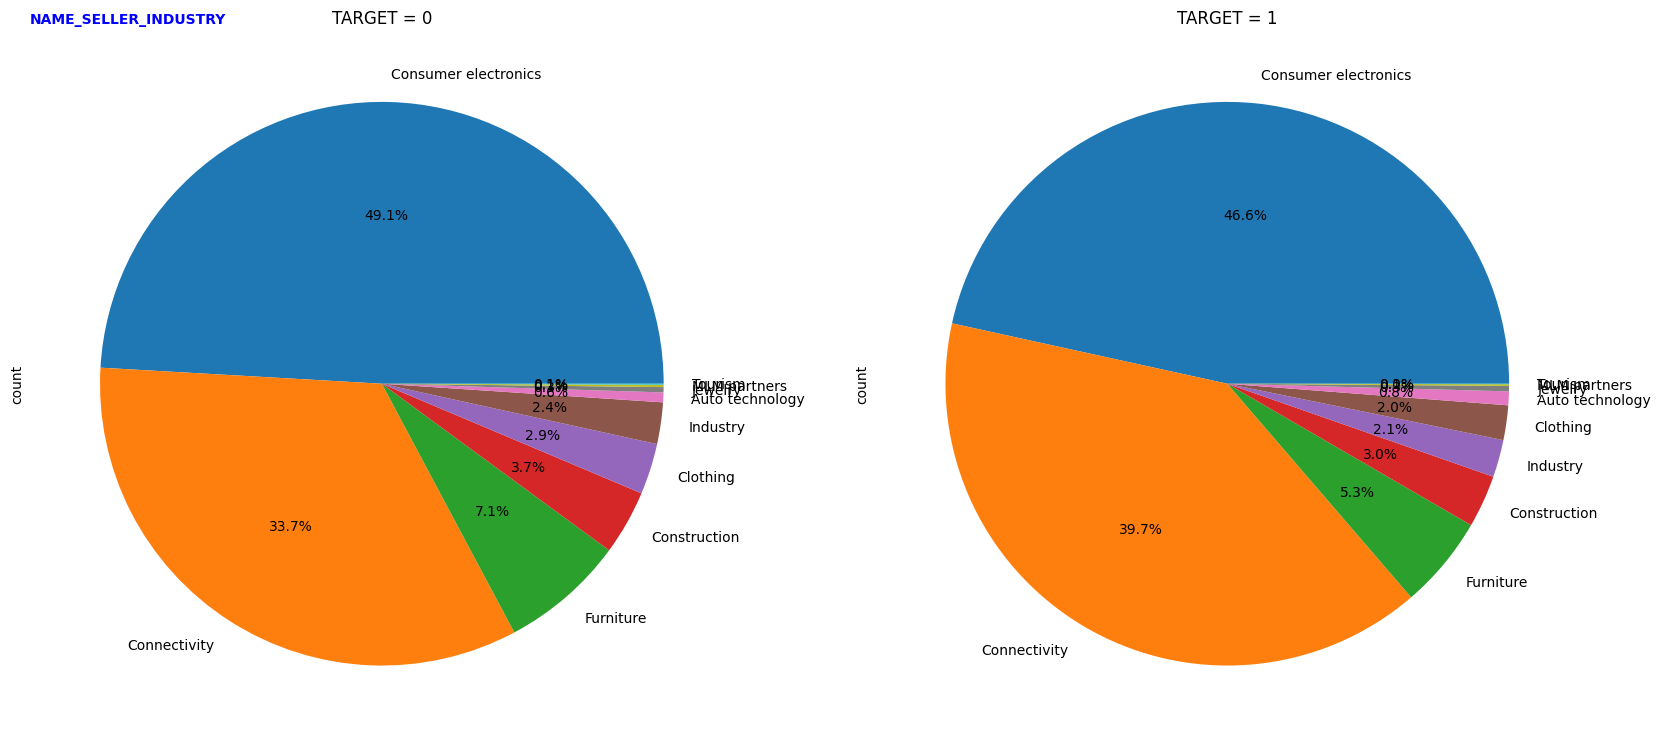

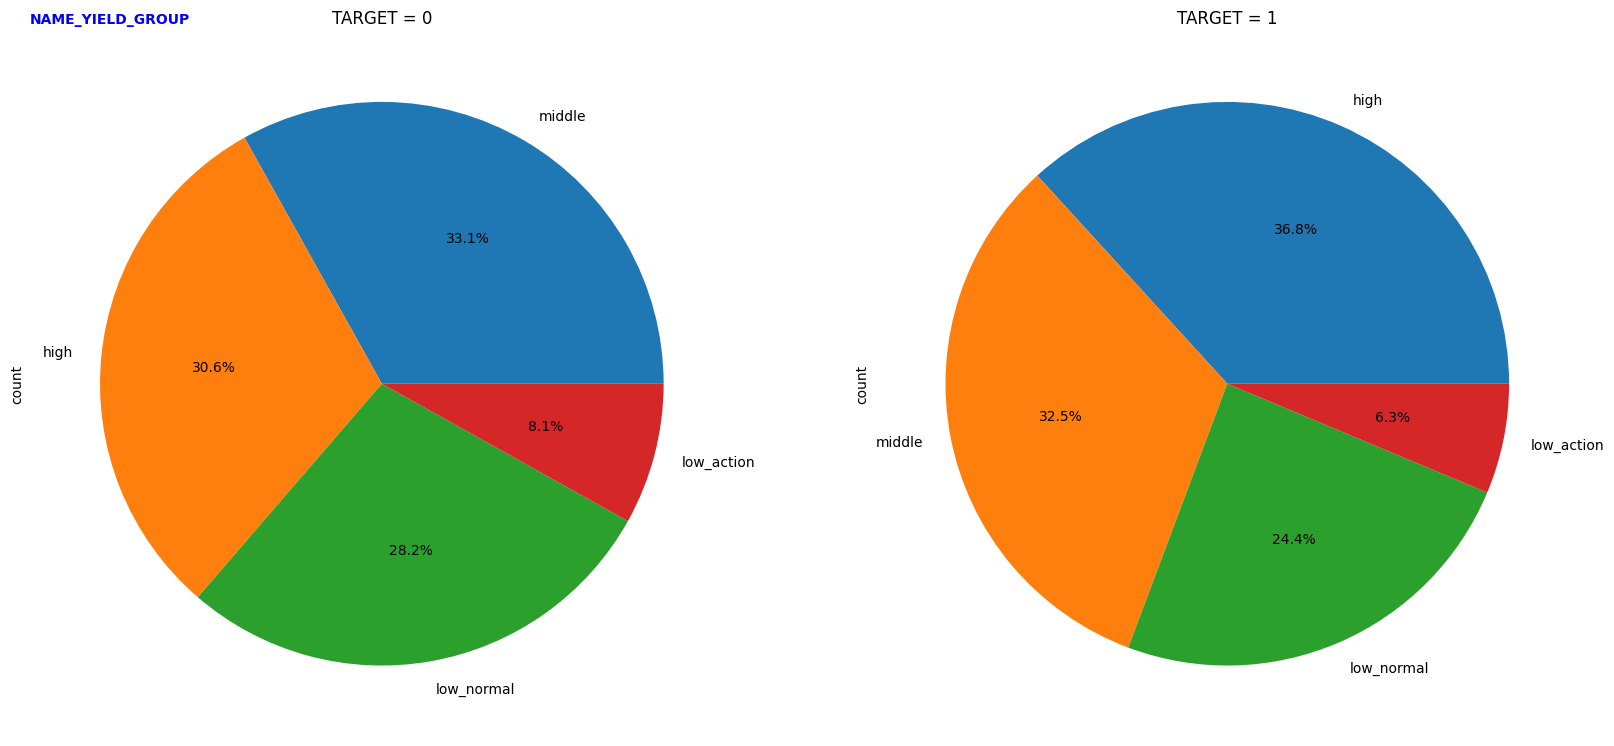

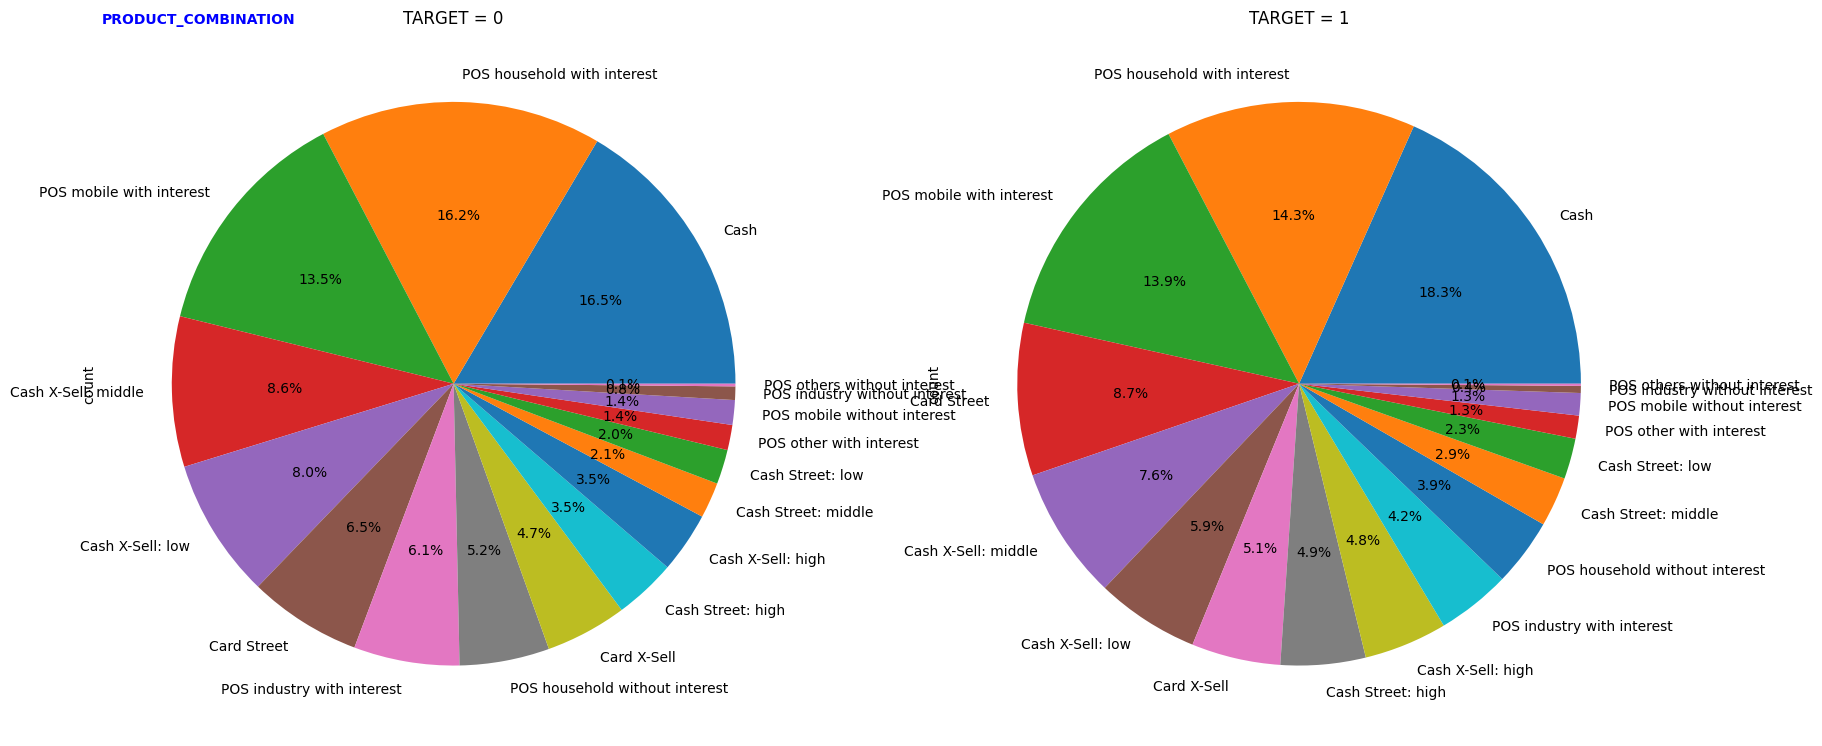

In [86]:
# plot  2 pie chart của các biến categorical ở 2 biến TARGET = 0 và TARGET = 1
def plot_pie(df):
    for col in df.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,1)
        plt.title('TARGET = 0')
        df[df['TARGET'] == 0][col].value_counts().plot.pie(autopct = '%1.1f%%')
        plt.title(col, fontsize = 10, fontweight = 'bold', color = 'blue', loc ='left')
        plt.subplot(1,2,2)
        plt.title('TARGET = 1')
        df[df['TARGET'] == 1][col].value_counts().plot.pie(autopct = '%1.1f%%')
        plt.show()
plot_pie(prev_merge)


In [91]:
# def hàm vẽ barplot tỉ lệ phần trăm target = 1 theo từng biến categorical
def plot_percent(df, col):
    percent_df = []
    for category in df[col].unique():
        if df[df[col] == category].shape[0] == 0:
            pass
        else:
            percent = (df[(df[col] == category) & (df['TARGET'] == 1)].shape[0] / df[df[col] == category].shape[0]) * 100
            percent_df.append([category, percent])
    percent_df = pd.DataFrame(percent_df, columns = [col, 'Percent'])
    percent_df.sort_values(by = 'Percent', ascending = False, inplace = True)
    plt.figure(figsize=(20,10))
    sns.barplot(y = percent_df[col], x = percent_df['Percent'])
    plt.title('Percent of target = 1 in {}'.format(col))
    plt.show()


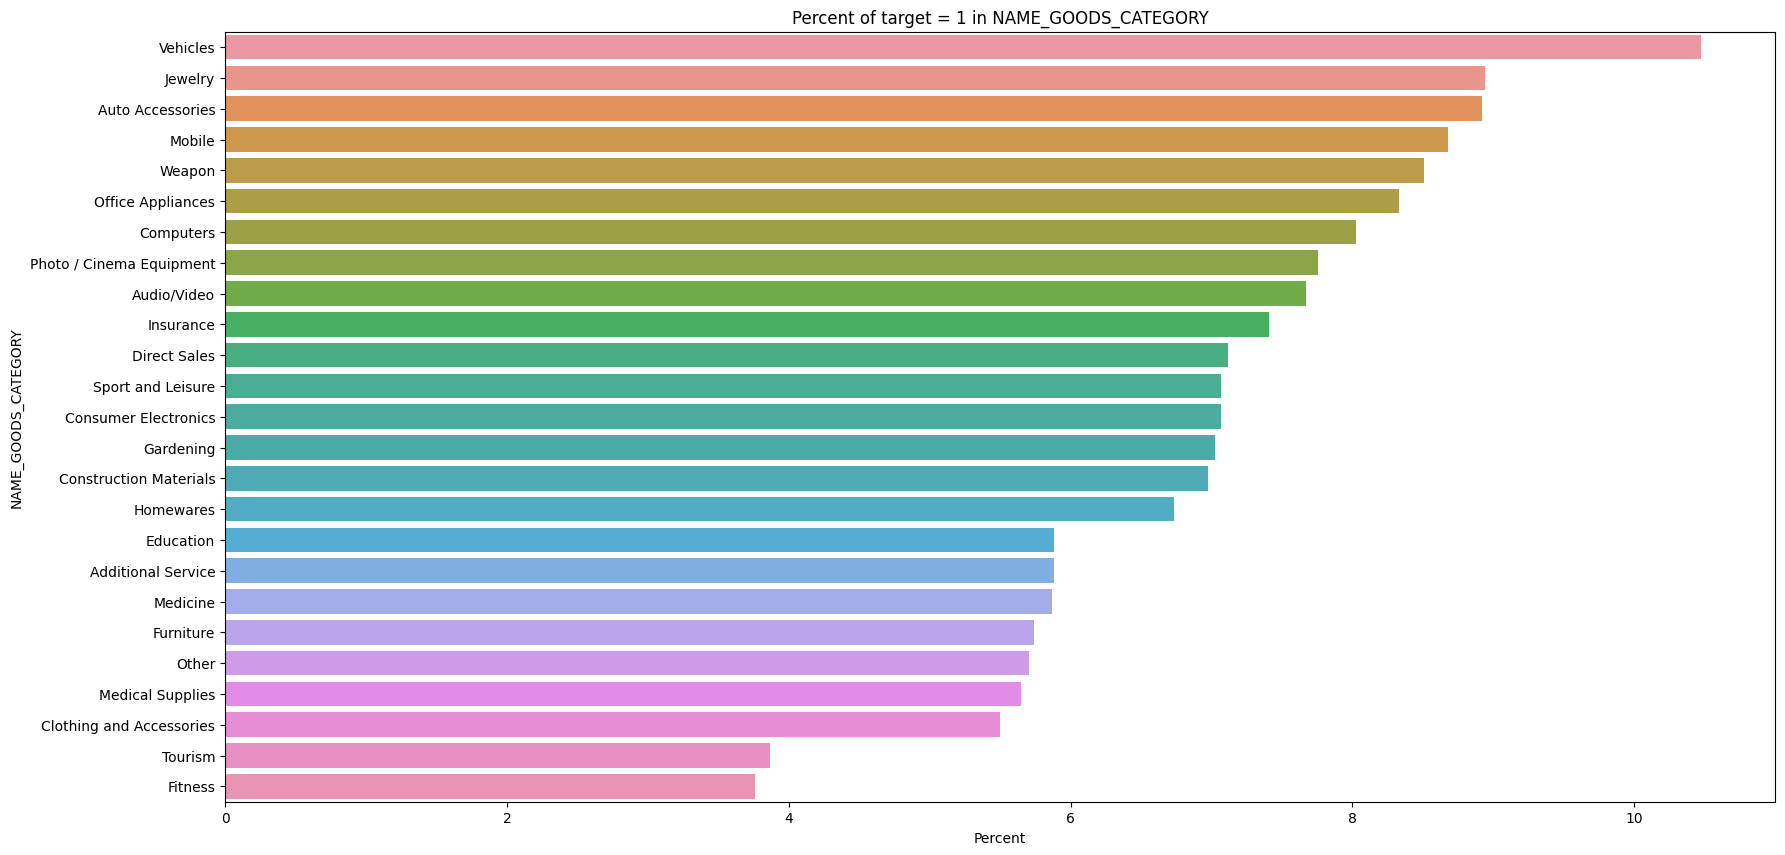

In [92]:
# Sản phẩm vay để mua
plot_percent(prev_merge, 'NAME_GOODS_CATEGORY')

- Khách hàng mua phương tiện đi lại(xe máy, ô tô,...) có tỉ lệ vỡ nợ cao nhất

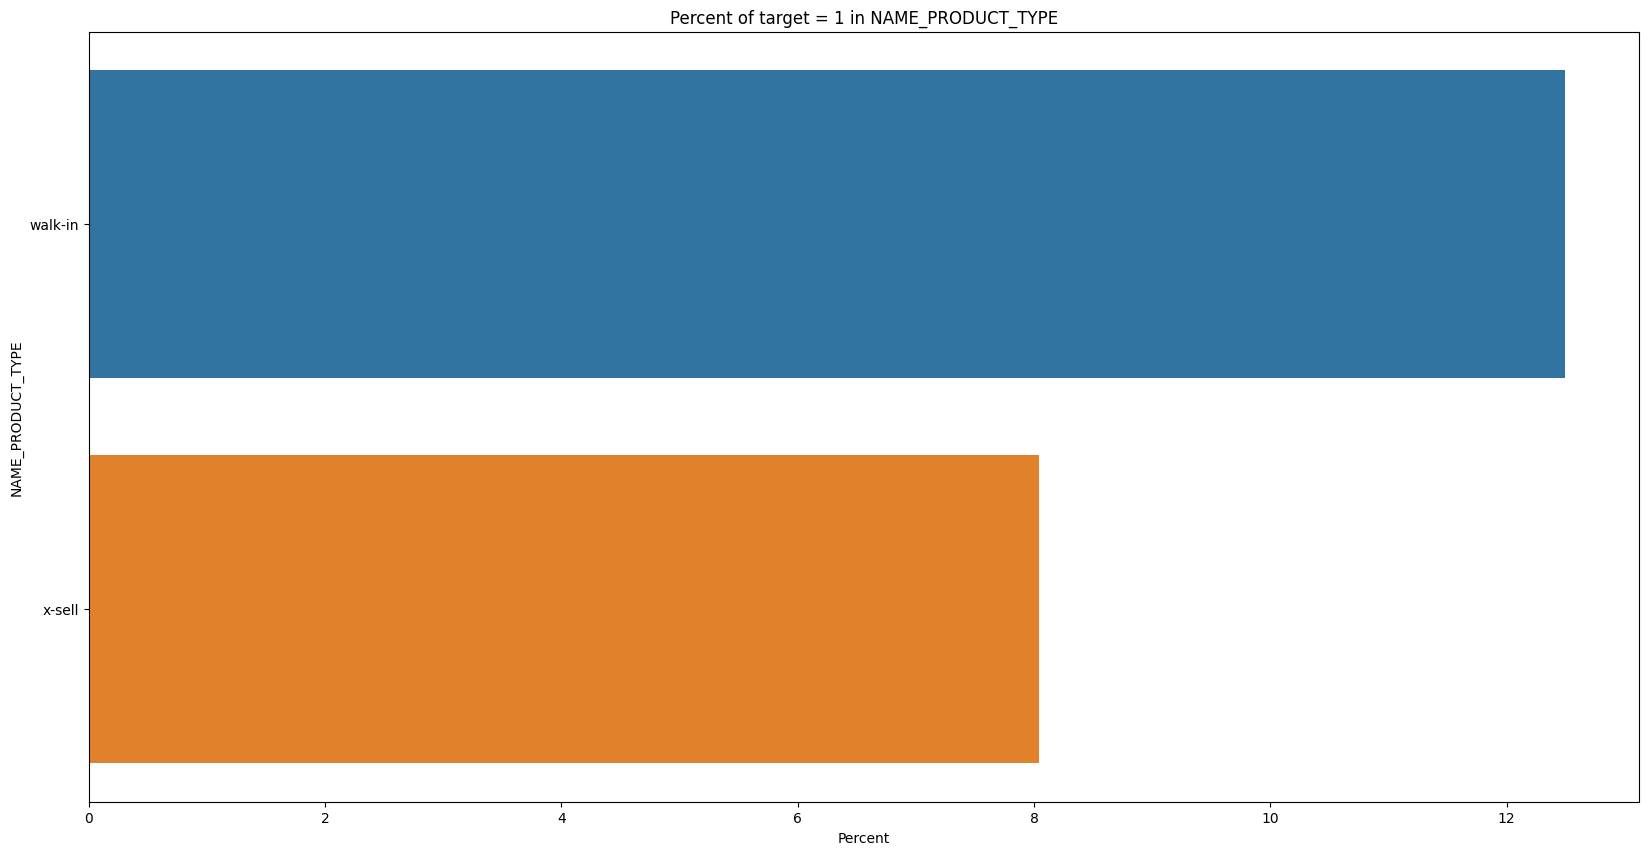

In [93]:
# NAME_PRODUCT_TYPE
plot_percent(prev_merge, 'NAME_PRODUCT_TYPE')

- Có cả giá trị XNA nhưng đã được thay thế bằng np.nan
- tỉ lệ vỡ nợ của khách hàng tự nhiên bước vào cửa hàng rồi vay tiền cao hơn là khách hàng đã từng có giao dịch với homecredit


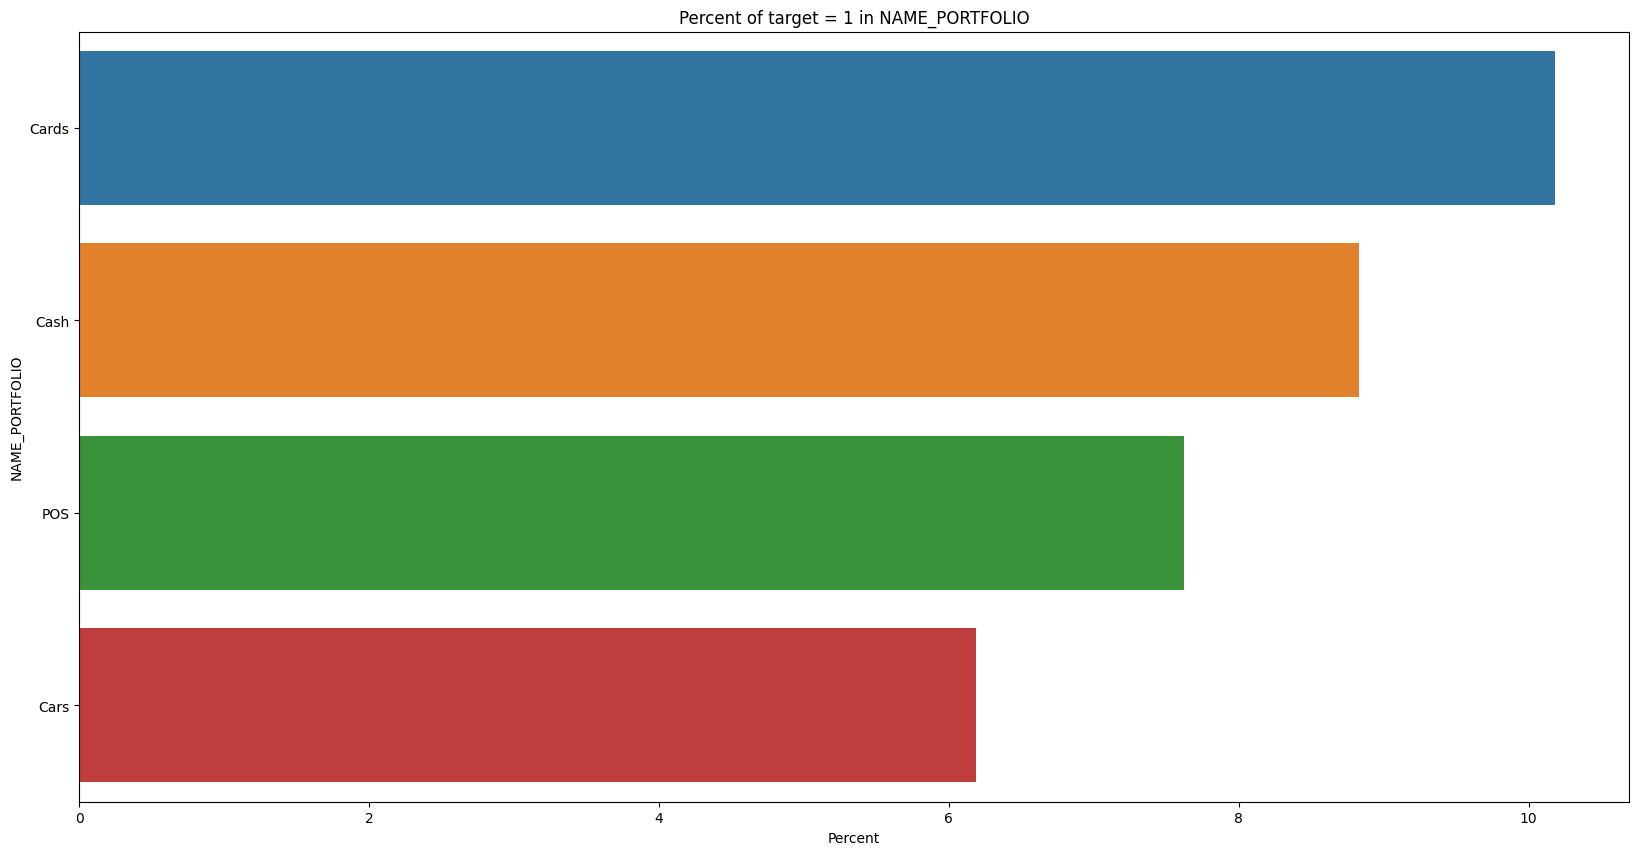

In [94]:
# NAME_PORTFOLIO
plot_percent(prev_merge, 'NAME_PORTFOLIO')

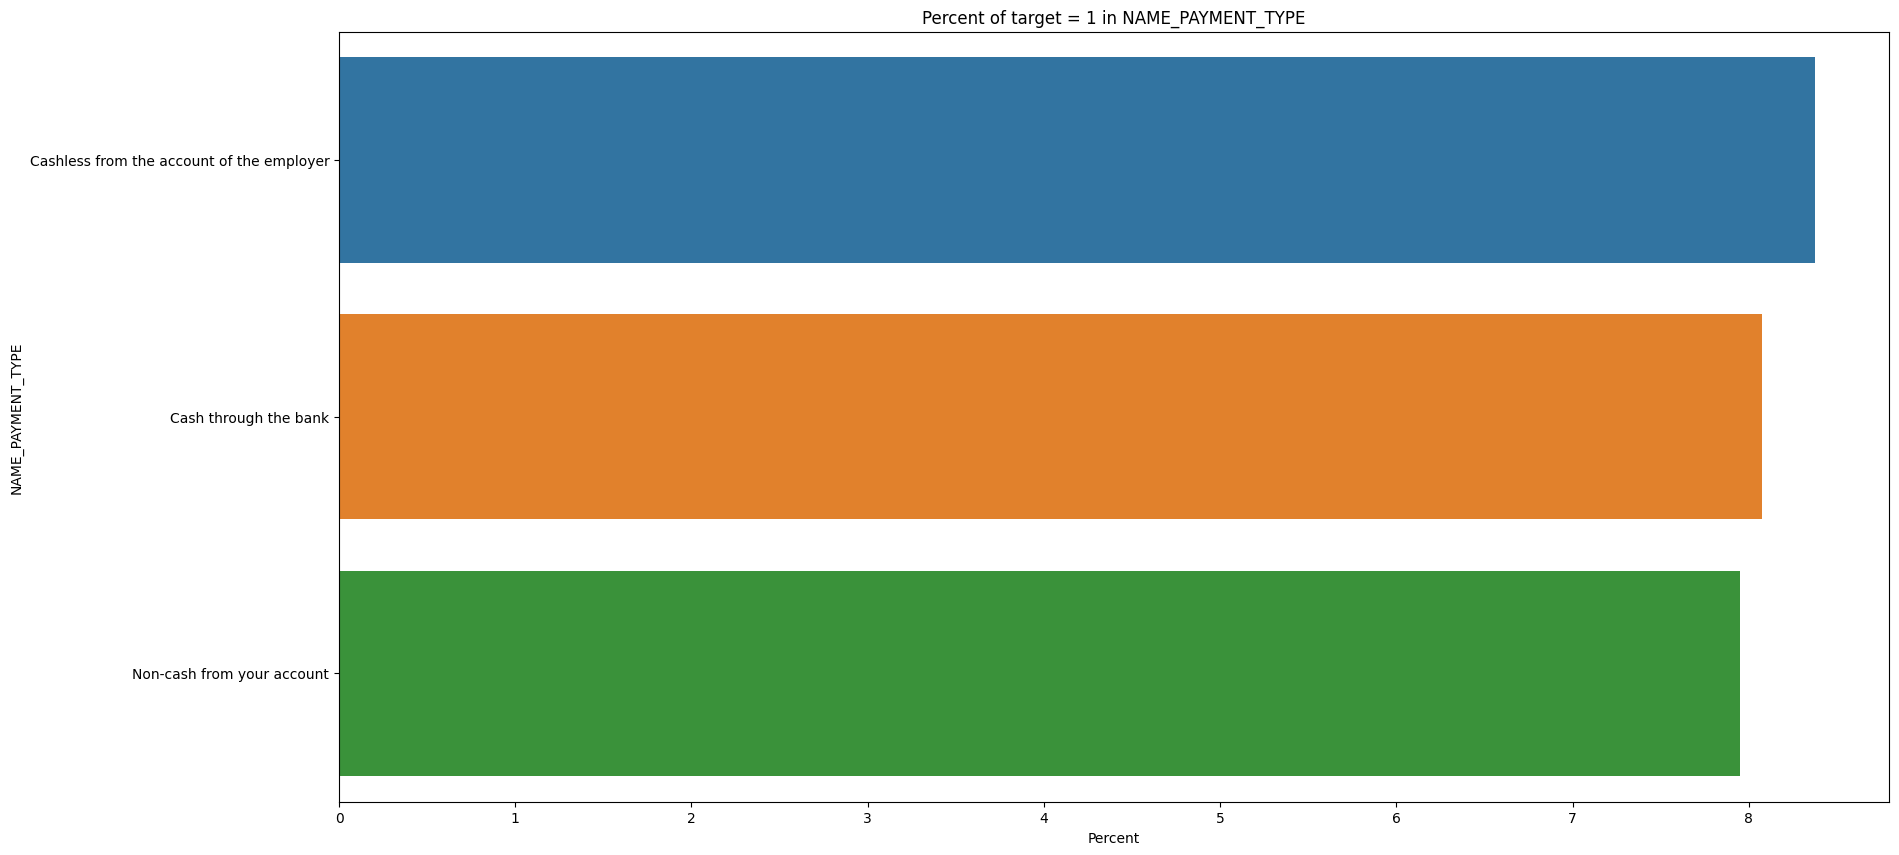

In [95]:
# NAME_PAYMENT_TYPE
plot_percent(prev_merge, 'NAME_PAYMENT_TYPE')

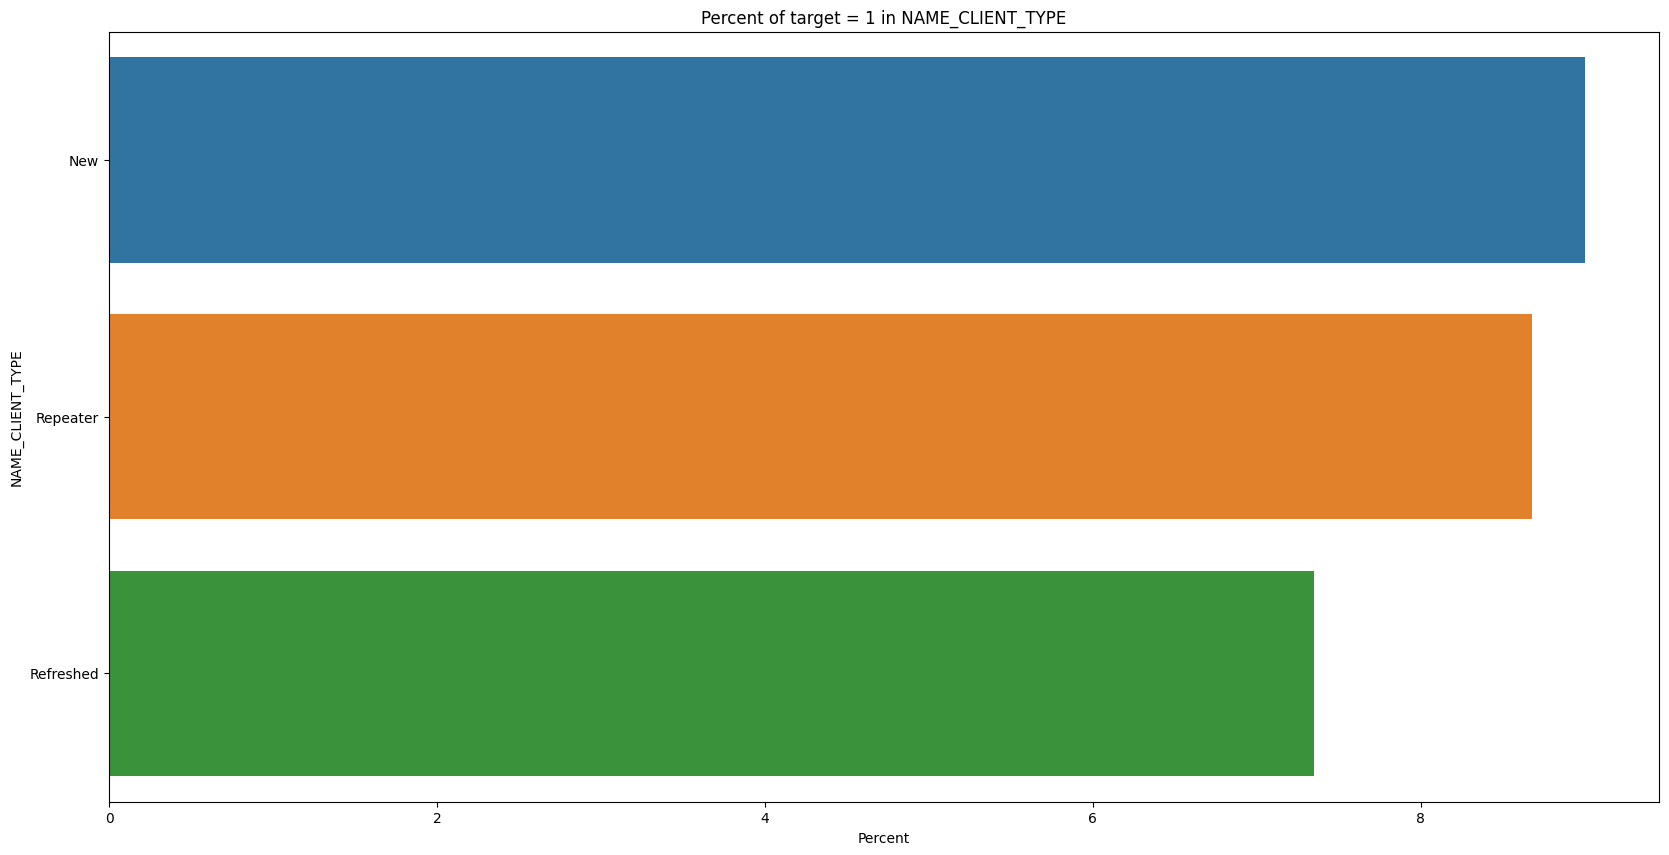

In [96]:
# NAME_CLIENT_TYPE
plot_percent(prev_merge, 'NAME_CLIENT_TYPE')

- Khách hàng mới chiếm tỉ lệ cao nhất trong số khách hàng bị vỡ nợ

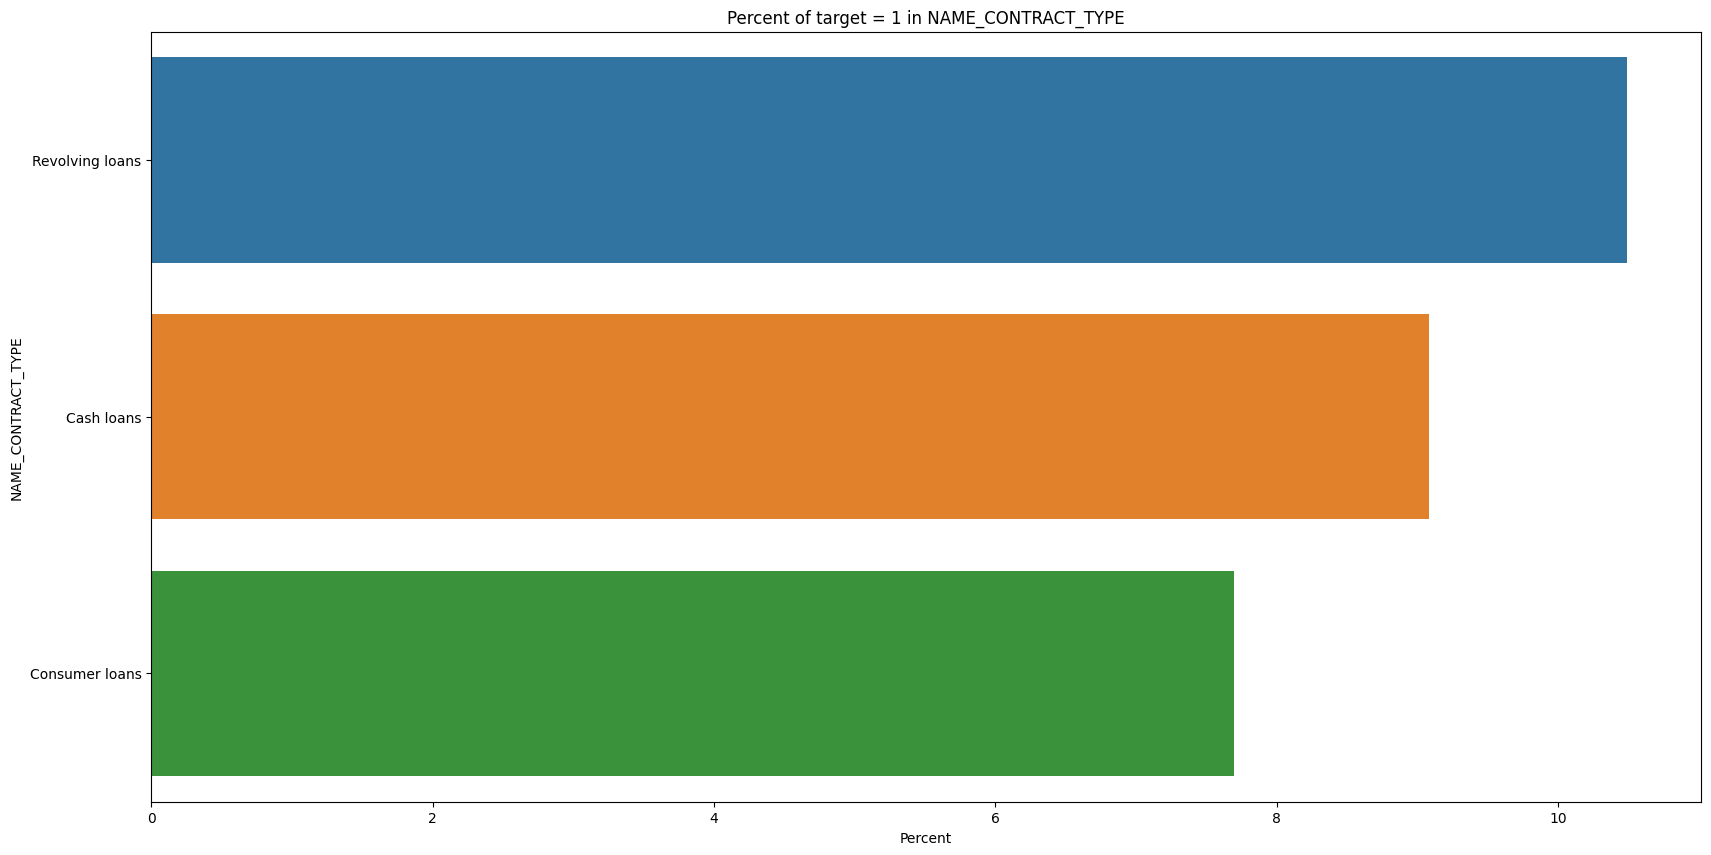

In [99]:
# NAME_CONTRACT_TYPE
plot_percent(prev_merge, 'NAME_CONTRACT_TYPE')

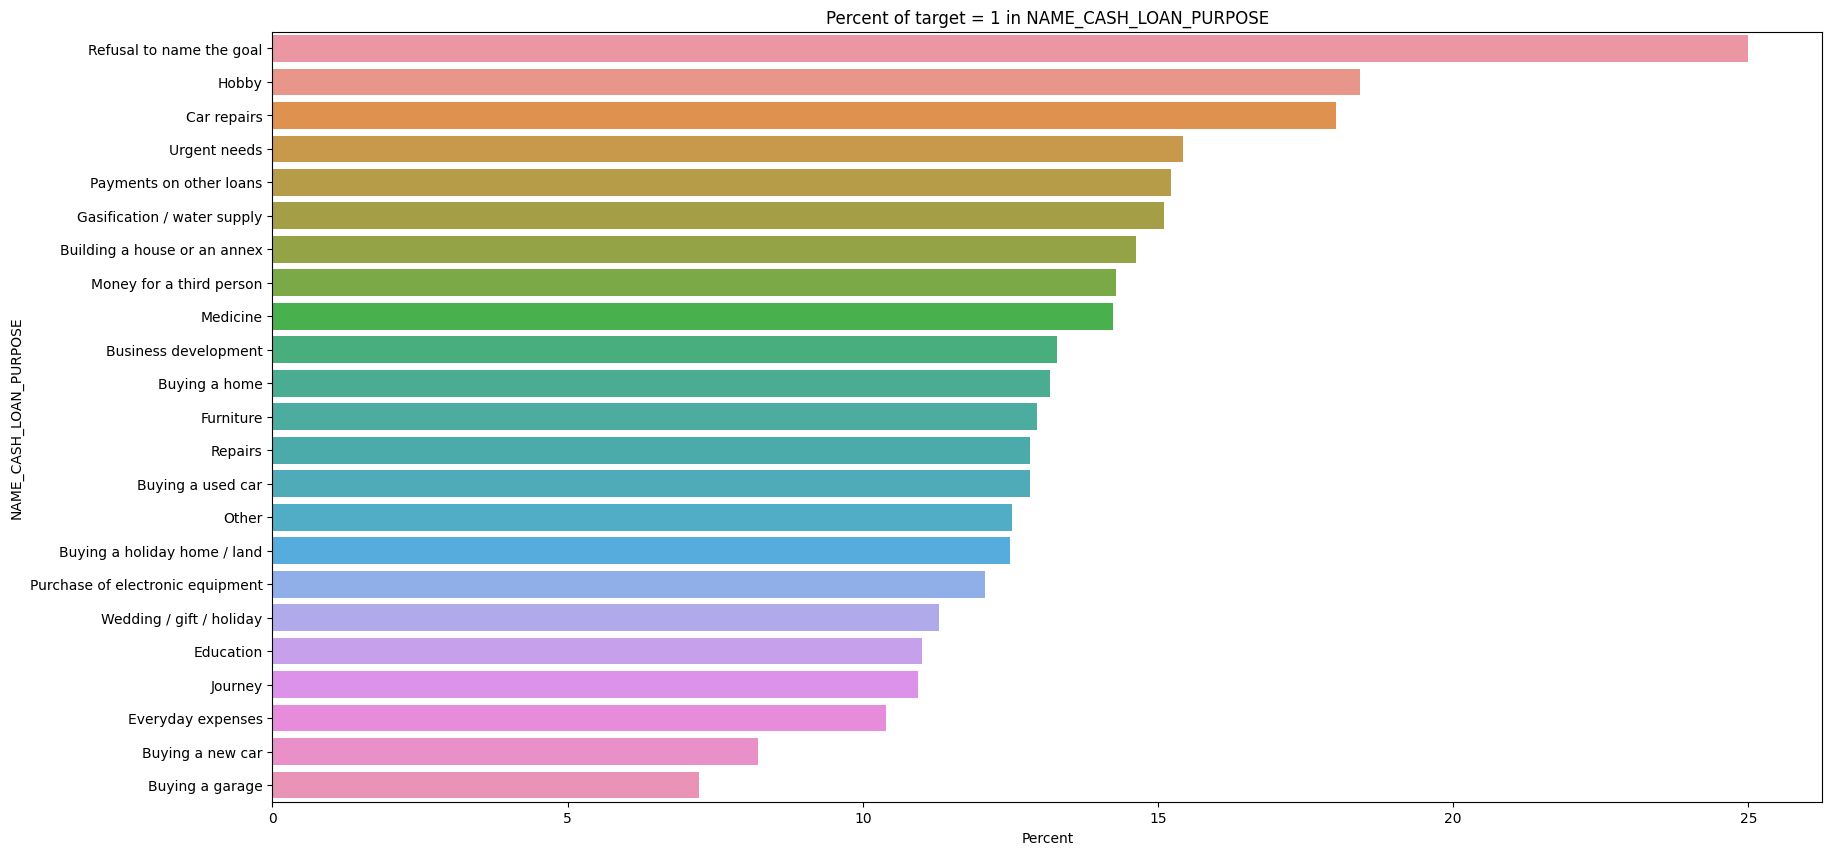

In [101]:
# NAME_CASH_LOAN_PURPOSE
plot_percent(prev_merge, 'NAME_CASH_LOAN_PURPOSE')

- Khách hàng từ chối cung cấp mục đích cho vay có tỉ lệ vỡ nợ cao nhất

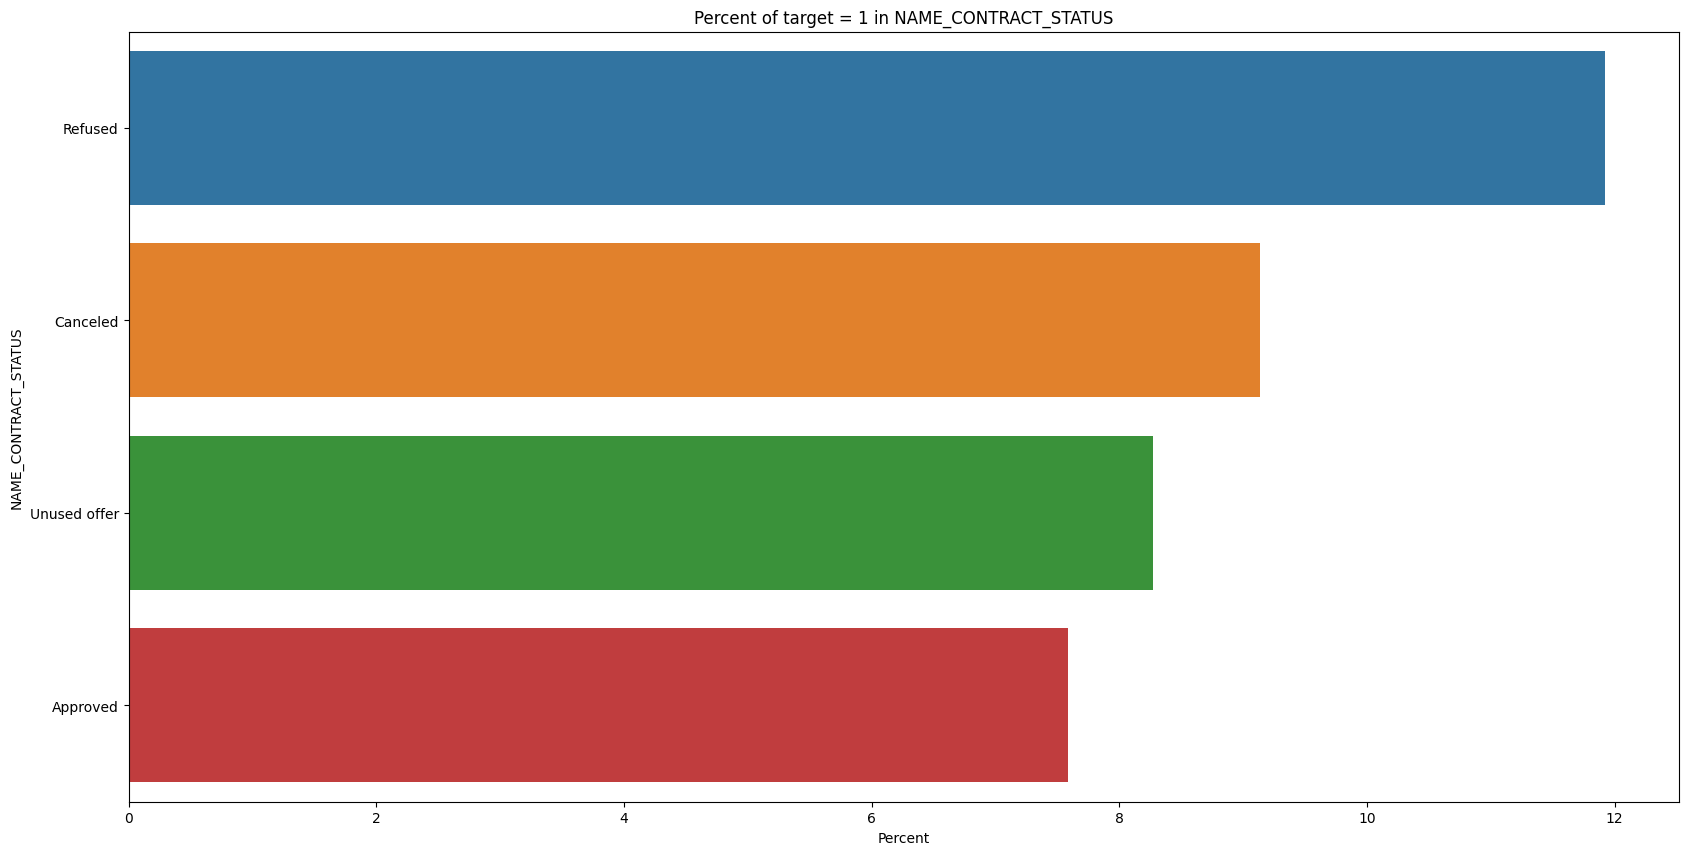

In [102]:
# NAME_CONTRACT_STATUS
plot_percent(prev_merge, 'NAME_CONTRACT_STATUS')

- Khách hàng đã bị từ chối ở khoản vay trước có tỉ lệ vỡ nợ cao nhất

In [ ]:
prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
prev['APP_CREDIT_RATIO'] = prev.apply(lambda x: x['AMT_APPLICATION'] / x['AMT_CREDIT'] if x['AMT_CREDIT'] != 0 else np.nan, axis=1)
prev['ANNUITY_PAYMENT_PRODUCT'] = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
    # Time-based Features
prev['DAYS_DECISION_YEAR'] = prev['DAYS_DECISION'] // 365
    # Categorical Combinations
prev['CONTRACT_CLIENT_TYPE'] = prev['NAME_CONTRACT_TYPE'] + "_" + prev['NAME_CLIENT_TYPE']
    # Binary Indicators
prev['HIGH_DOWN_PAYMENT'] = (prev['AMT_DOWN_PAYMENT'] > 10000).astype(int)
    # Missing Value Indicators
prev['MISSING_AMT_GOODS_PRICE'] = prev['AMT_GOODS_PRICE'].isnull().astype(int)

In [ ]:
# lấy ra các giá trị null của feature AMT_ANNUITY
sns.countplot(x = pre['AMT_ANNUITY'], hue = pre['TARGET'])

In [ ]:
# vẽ histogram các giá trị null các feature theo target
def plot_null(df):
    for col in df.columns:
        sns.countplot(x = df[df[col].isnull()][col], hue = df['TARGET'])
plot_null(prev_df_merge)

In [ ]:
prev_df['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

In [ ]:
prev_df['FLAG_LAST_APPL_PER_CONTRACT']

In [ ]:
prev_df['FLAG_LAST_APPL_PER_CONTRACT'] = prev_df['FLAG_LAST_APPL_PER_CONTRACT'].map({'Y': 1, 'N': 0})


In [ ]:
prev_df['NAME_CONTRACT_STATUS'].value_counts()

In [ ]:
prev_df['NAME_CONTRACT_TYPE'].value_counts()

In [ ]:
# Tạo flag cho contract type
prev_df['FLAG_IS_CONSUMER_LOANS'] = prev_df['NAME_CONTRACT_TYPE'].apply(lambda x: 1 if x == 'Consumer loans' else 0)
prev_df['FLAG_IS_CASH_LOANS'] = prev_df['NAME_CONTRACT_TYPE'].apply(lambda x: 1 if x == 'Cash loans' else 0)
prev_df['FLAG_IS_REVOLVING_LOANS'] = prev_df['NAME_CONTRACT_TYPE'].apply(lambda x: 1 if x == 'Revolving loans' else 0)

# Tạo flag cho contract status
prev_df['FLAG_IS_APPROVED'] = prev_df['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if x == 'Approved' else 0)
prev_df['FLAG_IS_REFUSED'] = prev_df['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if x == 'Refused' else 0)
prev_df['FLAG_IS_CANCELED'] = prev_df['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if x == 'Canceled' else 0)
prev_df['FLAG_IS_UNUSED_OFFER'] = prev_df['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if x == 'Unused offer' else 0)

# Tao flag cho portfolio
prev_df['FLAG_IS_POS'] = prev_df['NAME_PORTFOLIO'].apply(lambda x: 1 if x == 'POS' else 0)
prev_df['FLAG_IS_CARDS'] = prev_df['NAME_PORTFOLIO'].apply(lambda x: 1 if x == 'Cards' else 0)
prev_df['FLAG_IS_CASH'] = prev_df['NAME_PORTFOLIO'].apply(lambda x: 1 if x == 'Cash' else 0)
prev_df['FLAG_IS_X_SELL'] = prev_df['NAME_PORTFOLIO'].apply(lambda x: 1 if x == 'XNA' else 0)
prev_df['FLAG_IS_MOBILE'] = prev_df['NAME_PORTFOLIO'].apply(lambda x: 1 if x == 'Mobile' else 0)


In [ ]:
prev_df['FLAG_IS_POS'].value_counts()

In [ ]:
prev_df.columns

In [ ]:
# Tạo feature mới có thể đóng vai trò là feature quan trọng
prev_df['AMT_CREDIT_GOODS_RATIO'] = prev_df['AMT_CREDIT'] / prev_df['AMT_GOODS_PRICE']
prev_df['AMT_ANNUITY_GOODS_PRICE_RATIO'] = prev_df['AMT_ANNUITY'] / prev_df['AMT_GOODS_PRICE']
prev_df['AMT_DOWN_PAYMENT_GOODS_PRICE_RATIO'] = prev_df['AMT_DOWN_PAYMENT'] / prev_df['AMT_GOODS_PRICE']
prev_df['CREDIT_DOWN_PAYMENT'] = prev_df['AMT_GOODS_PRICE'] - prev_df['AMT_CREDIT']

In [ ]:
#prev_df = pd.get_dummies(prev_df, columns = ['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'], drop_first = True)
prev_df = pd.get_dummies(prev_df, columns = prev_app_df.columns[prev_df.dtypes == 'object'], drop_first=True)
prev_df

In [ ]:
# Add new column 'PREV_APP_COUNT' to count number of previous application of each customer
prev_df['PREV_APP_COUNT'] = prev_df.groupby('SK_ID_CURR')['SK_ID_PREV'].transform('count')
prev_df

In [ ]:
prev_df.columns.to_list()

In [ ]:
prev_df['NAME_PORTFOLIO_Cash'].value_counts()

In [ ]:
prev_df.drop(['SK_ID_PREV'], axis = 1, inplace = True)
prev_app_agg = prev_app_df.groupby('SK_ID_CURR').agg({
        'AMT_ANNUITY': ['sum','mean','min','max'],
        'AMT_APPLICATION': ['min', 'max', 'mean','sum'],
        'AMT_CREDIT': ['min', 'max', 'mean','sum'],
        'AMT_GOODS_PRICE': ['min', 'max','mean','sum'],
        'CNT_PAYMENT': [ 'mean','sum'],
        'FLAG_IS_CONSUMER_LOANS': ['count'],
        'FLAG_IS_CASH_LOANS': ['count'], 
        'FLAG_IS_REVOLVING_LOANS': ['count'], 
        'FLAG_IS_APPROVED': ['count'],
        'FLAG_IS_REFUSED': ['count'], 
        'FLAG_IS_POS': ['count'], 
        'FLAG_IS_CASH': ['count'],
        'AMT_CREDIT_GOODS_RATIO': ['mean'],
        'AMT_ANNUITY_GOODS_PRICE_RATIO': ['mean'],
        'AMT_DOWN_PAYMENT_GOODS_PRICE_RATIO': ['mean'],
        'CREDIT_DOWN_PAYMENT': ['sum']
})

In [ ]:
prev_app_agg.columns = ['_'.join(col).strip() for col in prev_app_agg.columns.values]
prev_app_agg.reset_index(inplace = True)
prev_app_agg

In [ ]:
# Round to 2 decimal places for all float columns
prev_app_agg = prev_app_agg.round(2)


In [ ]:
prev_app_agg.to_csv('C:/Users/admin/Downloads/dseb-63-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_previous_application_agg.csv', index = True)

In [ ]:
print('Happy birthday minh thư')